In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

On this notebook the best pipeline for this classifier on dataset MIT-BIHArrhythmiaDatabase.csv has been applied on the entire dataset (merge of the four datasets)

In [2]:
df_cardio=pd.read_csv("C:/Users/matte/DataMiningJupyter/projectDM/datasets/preprocessed_dataset/dataset_Normalized.csv")

In [3]:
columns = df_cardio.columns.tolist()
columns.remove(columns[0])
df_cardio=df_cardio[columns]

In [4]:
df_cardio

patient  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0           133   0.0 -0.137054  -0.079354  0.069610 -0.083281  0.614133   
1           133   0.0 -0.079249  -0.050451 -0.097030  0.597254 -0.078704   
2           133   0.0 -0.050346  -1.900223  0.109399  0.680528 -0.010649   
3           133   2.0 -1.900120   1.828223  0.176376  0.256431 -0.101098   
4           133   0.0  1.828330  -0.079354  0.585577  0.607461 -0.083499   
...         ...   ...       ...        ...       ...       ...       ...   
711419       54   0.0 -4.460816  -0.429158 -0.345439  1.086720 -0.213846   
711420       54   0.0 -0.438464  -2.857743  0.095040  0.804837  0.211167   
711421       54   0.0 -6.918920  -7.383744  1.603278 -0.518048 -0.531231   
711422       54   0.0 -5.578136  -4.072036 -0.942216 -1.074539 -0.955163   
711423       54   0.0 -5.354672  -5.065549  1.085070 -0.027911  0.284400   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.392761  0.047159            15.0  ... -0.023370            14.0   
1      -0.078704 -0.137781             3.0  ...  0.081637            15.0   
2      -0.010649 -0.720620             6.0  ... -0.148539            33.0   
3      -0.707525 -0.101098             4.0  ...  0.046898            21.0   
4      -0.083499 -0.167858             3.0  ... -0.112552            32.0   
...          ...       ...             ...  ...       ...             ...   
711419 -0.213846 -0.699650            24.0  ... -0.443458             1.0   
711420  0.211167  0.008211             4.0  ... -0.224660            50.0   
711421 -0.531231 -1.296207            16.0  ...  0.521029             8.0   
711422 -1.249941 -0.955163             7.0  ...  0.940757            73.0   
711423 -0.402152  0.284400            70.0  ...  0.229242            21.0   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                 3.0           23.0            6.0     -0.023370   
1                 5.0           27.0            7.0      0.081637   
2                13.0           52.0            6.0     -0.148539   
3                 9.0           34.0            4.0      0.046898   
4                 5.0           43.0            6.0     -0.112552   
...               ...            ...            ...           ...   
711419            8.0           29.0           20.0     -0.443458   
711420            9.0           67.0            8.0     -0.224660   
711421            6.0           39.0           25.0      0.521029   
711422            6.0          115.0           36.0      0.940757   
711423           14.0           39.0            4.0      0.229242   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          -0.011650      0.082608      0.101373     -0.183387  
1           0.102992      0.191225      0.217544     -0.068248  
2          -0.060620      0.081080      0.204400      0.335172  
3           0.083728      0.279512      0.526785      0.450969  
4           0.012989      0.091491      0.134004      0.265232  
...              ...           ...           ...           ...  
711419     -0.443458     -0.443458     -0.443458     -0.443458  
711420     -0.120400     -0.016600      0.028074      0.123550  
711421      0.490847      0.369275      0.281510      0.121812  
711422      1.275964      0.376596     -0.212226     -0.621249  
711423      0.190114      0.158866      0.128646      0.057560  

[711424 rows x 34 columns]

In [5]:
from utils import handle_warning,cross_valid,print_plot,compare_plots,preprocessed_dataset,retrieve_fscore_avg

In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier


pipe_normal = Pipeline([
        ('classification', AdaBoostClassifier())
    ])
pipe_normal

Pipeline(steps=[('classification', AdaBoostClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2238
         1.0       1.00      0.15      0.26        33
         2.0       1.00      1.00      1.00         1

    accuracy                           0.99      2272
   macro avg       1.00      0.72      0.75      2272
weighted avg       0.99      0.99      0.98      2272

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.987643   1.000000  1.0  0.987676     0.995881      0.987828
recall        1.000000   0.151515  1.0  0.987676     0.717172      0.987676
f1-score      0.993783   0.263158  1.0  0.987676     0.752314      0.983174
support    2238.000000  33.000000  1.0  0.987676  2272.000000   2272.000000


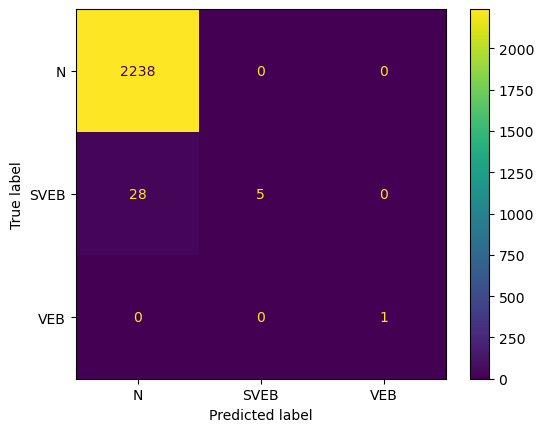

Fold 2:
  Test:  patient=1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1859
         1.0       1.00      0.33      0.50         3

    accuracy                           1.00      1862
   macro avg       1.00      0.67      0.75      1862
weighted avg       1.00      1.00      1.00      1862

                   0.0       1.0  accuracy    macro avg  weighted avg
precision     0.998925  1.000000  0.998926     0.999463      0.998927
recall        1.000000  0.333333  0.998926     0.666667      0.998926
f1-score      0.999462  0.500000  0.998926     0.749731      0.998658
support    1859.000000  3.000000  0.998926  1862.000000   1862.000000


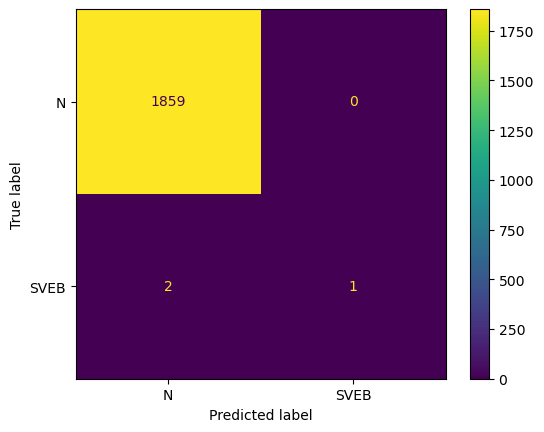

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999519  NaN  0.0  0.996639     0.333173      0.998559
recall        0.997597  0.0  NaN  0.996639     0.332532      0.996639
f1-score      0.998557  NaN  NaN  0.996639     0.332852      0.997598
support    2081.000000  2.0  0.0  0.996639  2083.000000   2083.000000


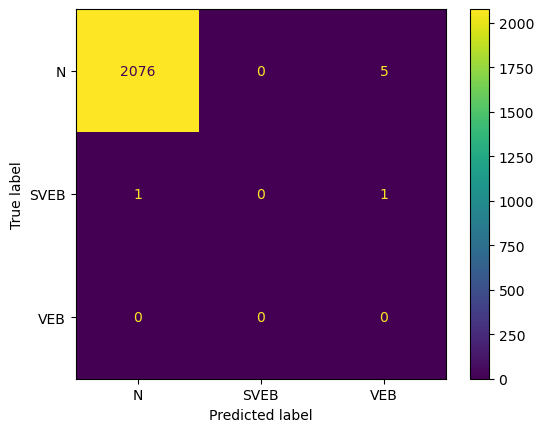

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.75      0.98      0.85        41

    accuracy                           0.99      2566
   macro avg       0.58      0.66      0.62      2566
weighted avg       1.00      0.99      0.99      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999602  0.0   0.754717  0.994154     0.584773      0.995689
recall        0.994455  NaN   0.975610  0.994154     0.656688      0.994154
f1-score      0.997022  NaN   0.851064  0.994154     0.616029      0.994690
support    2525.000000  0.0  41.000000  0.994154  2566.000000   2566.000000


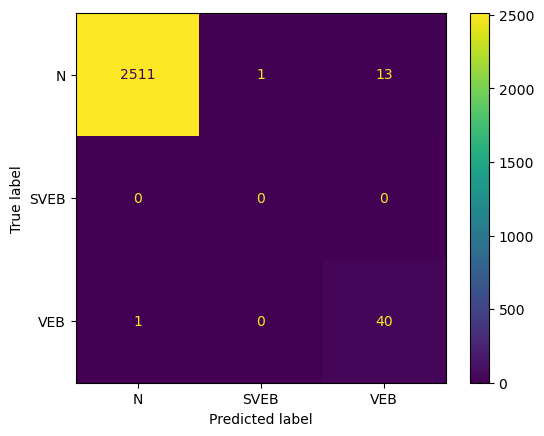

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.39      0.56       520

    accuracy                           0.84      2026
   macro avg       0.61      0.46      0.49      2026
weighted avg       0.87      0.84      0.82      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.826564  0.0    1.000000   0.84304     0.608855      0.871079
recall        1.000000  NaN    0.388462   0.84304     0.462821      0.843040
f1-score      0.905048  NaN    0.559557   0.84304     0.488202      0.816373
support    1506.000000  0.0  520.000000   0.84304  2026.000000   2026.000000


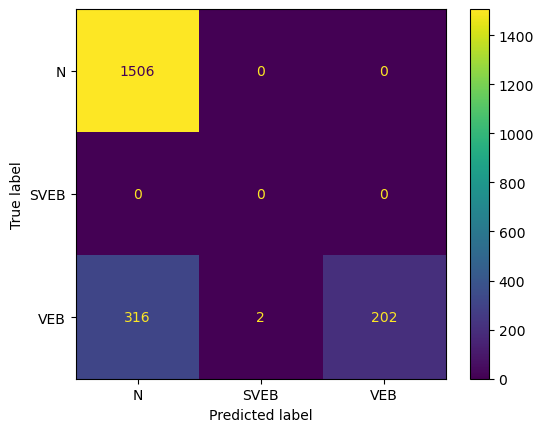

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.11      0.29      0.16        17

    accuracy                           0.97      1760
   macro avg       0.37      0.42      0.38      1760
weighted avg       0.98      0.97      0.98      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.993575  0.0   0.106383  0.969318     0.366653      0.982747
recall        0.978148  0.0   0.294118  0.969318     0.424089      0.969318
f1-score      0.985801  0.0   0.156250  0.969318     0.380684      0.975548
support    1739.000000  4.0  17.000000  0.969318  1760.000000   1760.000000


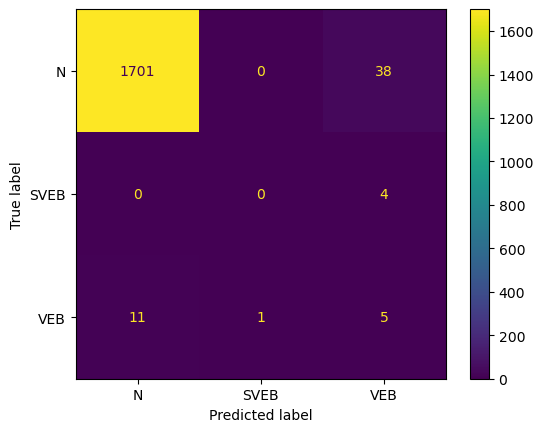

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2491
         2.0       0.51      0.89      0.65        38

    accuracy                           0.99      2529
   macro avg       0.75      0.94      0.82      2529
weighted avg       0.99      0.99      0.99      2529

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.998375   0.507463   0.98537     0.752919      0.990999
recall        0.986752   0.894737   0.98537     0.940745      0.985370
f1-score      0.992530   0.647619   0.98537     0.820074      0.987347
support    2491.000000  38.000000   0.98537  2529.000000   2529.000000


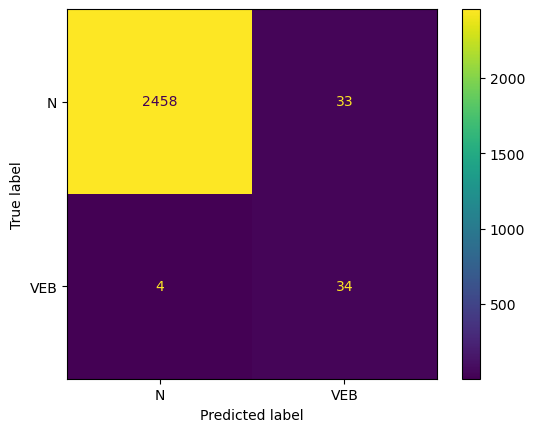

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2122
         2.0       0.05      1.00      0.10         1

    accuracy                           0.99      2123
   macro avg       0.53      1.00      0.55      2123
weighted avg       1.00      0.99      1.00      2123

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.050000   0.99105     0.525000      0.999553
recall        0.991046  1.000000   0.99105     0.995523      0.991050
f1-score      0.995503  0.095238   0.99105     0.545371      0.995079
support    2122.000000  1.000000   0.99105  2123.000000   2123.000000


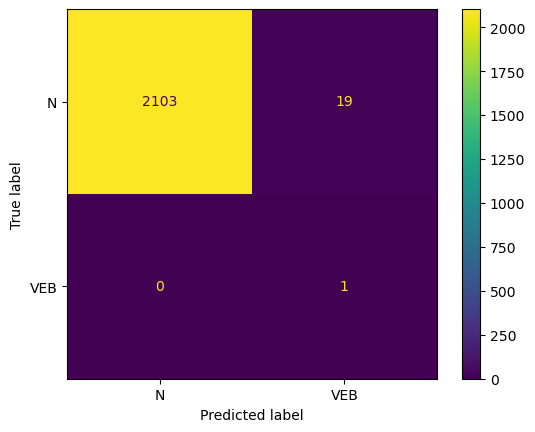

Fold 9:
  Test:  patient=8
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2536
         1.0       1.00      0.50      0.67         2

    accuracy                           1.00      2538
   macro avg       1.00      0.75      0.83      2538
weighted avg       1.00      1.00      1.00      2538

                   0.0       1.0  accuracy    macro avg  weighted avg
precision     0.999606  1.000000  0.999606     0.999803      0.999606
recall        1.000000  0.500000  0.999606     0.750000      0.999606
f1-score      0.999803  0.666667  0.999606     0.833235      0.999540
support    2536.000000  2.000000  0.999606  2538.000000   2538.000000


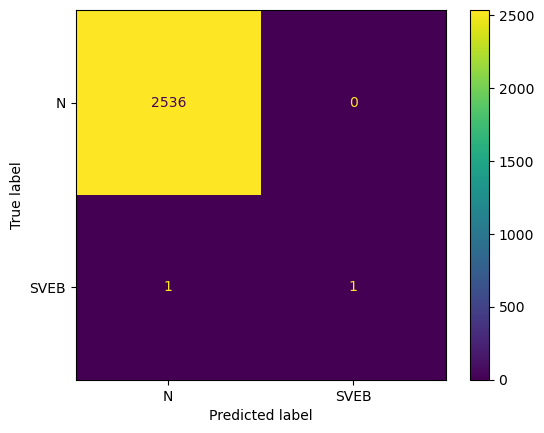

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       0.99      0.99      0.99      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998312  0.0  0.0  0.988852     0.332771      0.994973
recall        0.992170  0.0  NaN  0.988852     0.330723      0.988852
f1-score      0.995231  0.0  NaN  0.988852     0.331744      0.991903
support    1788.000000  6.0  0.0  0.988852  1794.000000   1794.000000


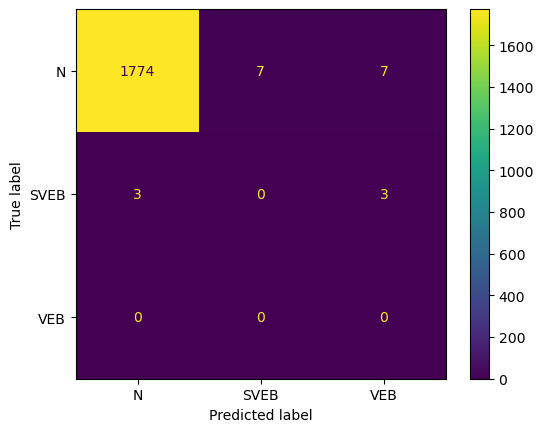

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.87      0.77      0.81        43

    accuracy                           0.99      1874
   macro avg       0.62      0.59      0.60      1874
weighted avg       0.98      0.99      0.98      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.989107   NaN   0.868421   0.98666     0.619176      0.980004
recall        0.998351   0.0   0.767442   0.98666     0.588598      0.986660
f1-score      0.993707   NaN   0.814815   0.98666     0.602841      0.983239
support    1819.000000  12.0  43.000000   0.98666  1874.000000   1874.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

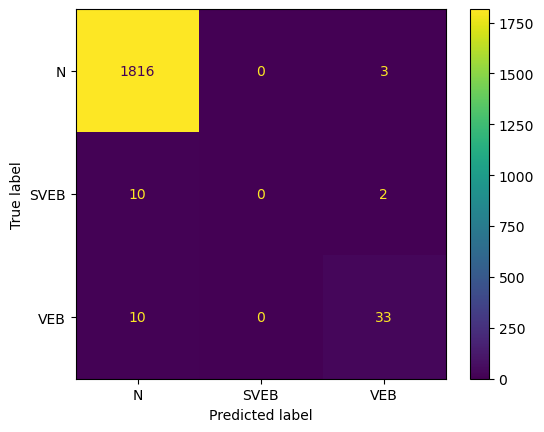

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      1.00      1.00      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.998463     0.333333      1.000000
recall        0.998463  NaN  NaN  0.998463     0.332821      0.998463
f1-score      0.999231  NaN  NaN  0.998463     0.333077      0.999231
support    1952.000000  0.0  0.0  0.998463  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

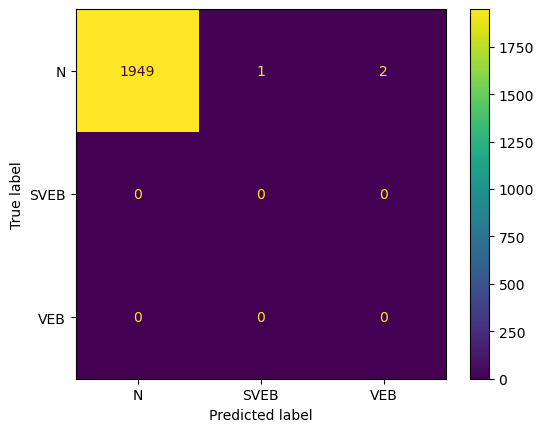

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.94      0.87      0.90       109

    accuracy                           0.99      2411
   macro avg       0.64      0.62      0.63      2411
weighted avg       0.99      0.99      0.99      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.994370  0.0    0.940594  0.991705     0.644988      0.991526
recall        0.997827  0.0    0.871560  0.991705     0.623129      0.991705
f1-score      0.996095  0.0    0.904762  0.991705     0.633619      0.991553
support    2301.000000  1.0  109.000000  0.991705  2411.000000   2411.000000


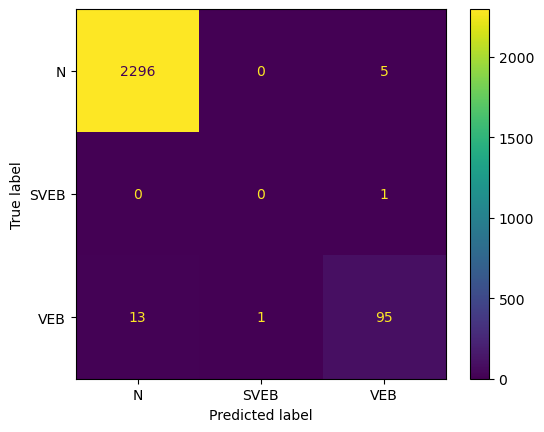

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1533
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1534
   macro avg       0.50      0.50      0.50      1534
weighted avg       1.00      1.00      1.00      1534

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     0.999348  NaN  0.999348     0.499674      0.998697
recall        1.000000  0.0  0.999348     0.500000      0.999348
f1-score      0.999674  NaN  0.999348     0.499837      0.999022
support    1533.000000  1.0  0.999348  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

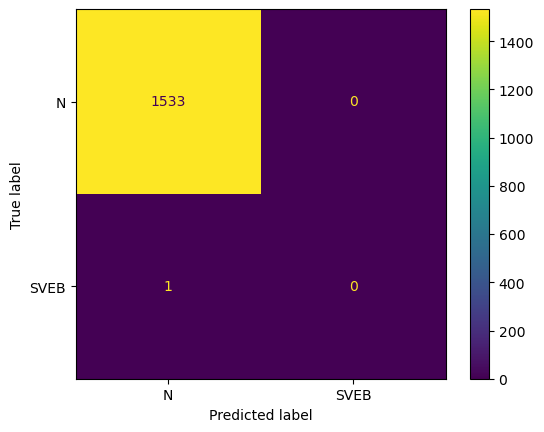

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2165
         1.0       0.00      0.00      0.00        96
         2.0       0.43      0.62      0.51        16

    accuracy                           0.95      2277
   macro avg       0.46      0.54      0.50      2277
weighted avg       0.92      0.95      0.93      2277

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.959627   NaN   0.434783  0.954326     0.464803      0.915481
recall        0.999076   0.0   0.625000  0.954326     0.541359      0.954326
f1-score      0.978955   NaN   0.512821  0.954326     0.497258      0.934406
support    2165.000000  96.0  16.000000  0.954326  2277.000000   2277.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

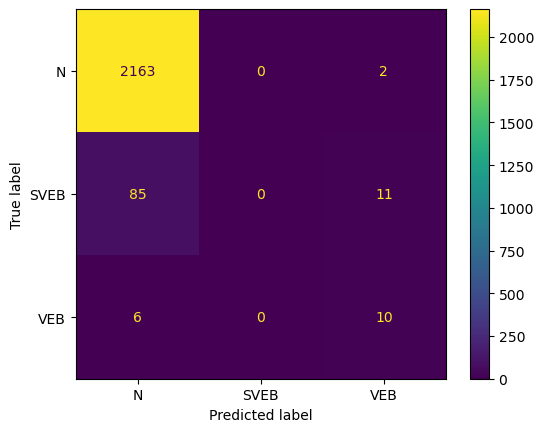

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1542
         2.0       1.00      0.89      0.94       444

    accuracy                           0.98      1986
   macro avg       0.98      0.95      0.96      1986
weighted avg       0.98      0.98      0.98      1986

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.969811    1.000000  0.975831     0.984906      0.976560
recall        1.000000    0.891892  0.975831     0.945946      0.975831
f1-score      0.984674    0.942857  0.975831     0.963766      0.975325
support    1542.000000  444.000000  0.975831  1986.000000   1986.000000


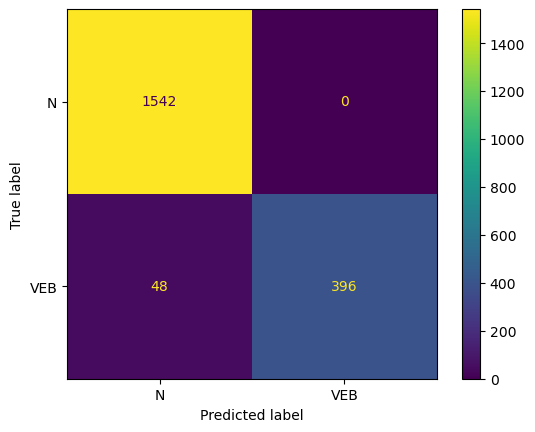

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1860
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00      1862
   macro avg       0.67      0.67      0.67      1862
weighted avg       1.00      1.00      1.00      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999463  NaN  1.0  0.999463     0.666488      0.998926
recall        1.000000  0.0  1.0  0.999463     0.666667      0.999463
f1-score      0.999731  NaN  1.0  0.999463     0.666577      0.999194
support    1860.000000  1.0  1.0  0.999463  1862.000000   1862.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

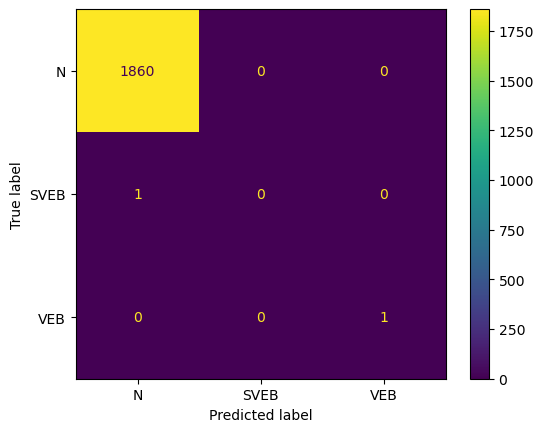

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.50      0.50      0.50      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.999596     0.500000      1.000000
recall        0.999596  NaN  0.999596     0.499798      0.999596
f1-score      0.999798  NaN  0.999596     0.499899      0.999798
support    2475.000000  0.0  0.999596  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

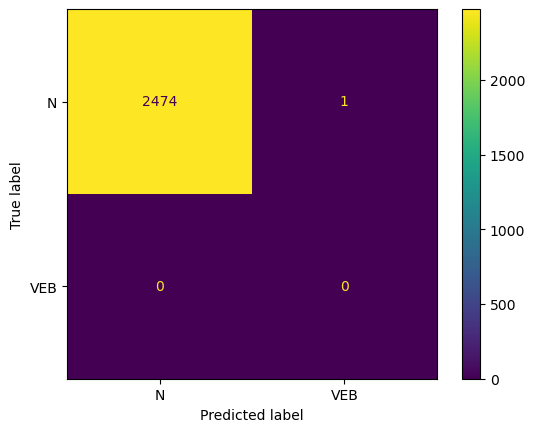

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1514
         2.0       0.00      0.00      0.00         3

    accuracy                           0.99      1517
   macro avg       0.50      0.50      0.50      1517
weighted avg       1.00      0.99      1.00      1517

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     0.998016  0.0  0.994726     0.499008      0.996042
recall        0.996697  0.0  0.994726     0.498349      0.994726
f1-score      0.997356  0.0  0.994726     0.498678      0.995384
support    1514.000000  3.0  0.994726  1517.000000   1517.000000


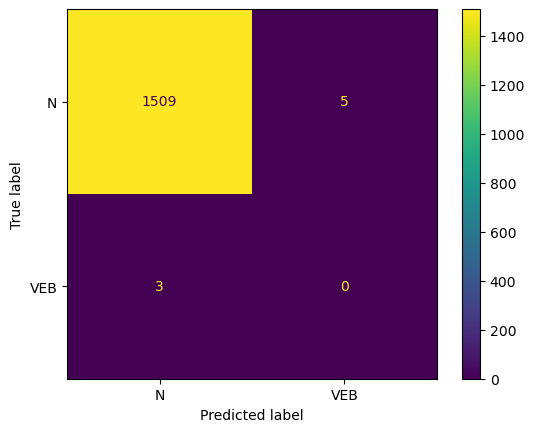

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.62      0.32      0.42        47

    accuracy                           0.96      1613
   macro avg       0.53      0.44      0.47      1613
weighted avg       0.93      0.96      0.94      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.962240   NaN   0.625000  0.957223     0.529080      0.933921
recall        0.996091   0.0   0.319149  0.957223     0.438413      0.957223
f1-score      0.978873   NaN   0.422535  0.957223     0.467136      0.943850
support    1535.000000  31.0  47.000000  0.957223  1613.000000   1613.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

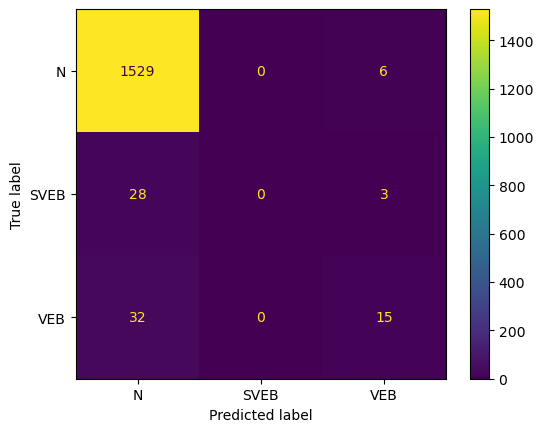

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1742
         1.0       0.11      0.07      0.08        30
         2.0       0.96      0.81      0.88       826

    accuracy                           0.91      2598
   macro avg       0.66      0.62      0.63      2598
weighted avg       0.91      0.91      0.91      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.904131   0.111111    0.963873   0.91455     0.659705   
recall        0.979908   0.066667    0.807506   0.91455     0.618027   
f1-score      0.940496   0.083333    0.878788   0.91455     0.634206   
support    1742.000000  30.000000  826.000000   0.91455  2598.000000   

           weighted avg  
precision      0.913968  
recall         0.914550  
f1-score       0.910979  
support     2598.000000  


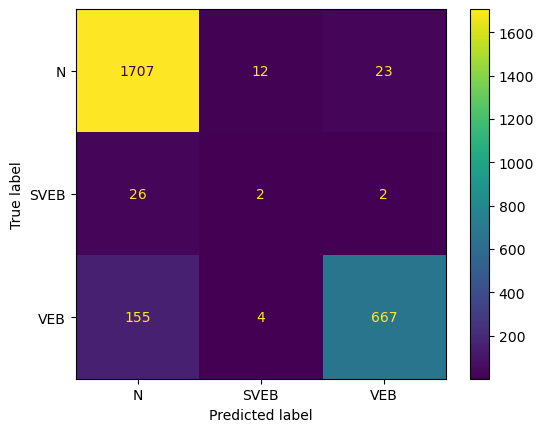

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1634
         1.0       0.58      0.41      0.48       128
         2.0       0.00      0.00      0.00       198

    accuracy                           0.84      1960
   macro avg       0.48      0.46      0.47      1960
weighted avg       0.76      0.84      0.80      1960

                   0.0         1.0    2.0  accuracy    macro avg  weighted avg
precision     0.868364    0.577778    0.0  0.844388     0.482047      0.761664
recall        0.981028    0.406250    0.0  0.844388     0.462426      0.844388
f1-score      0.921264    0.477064    0.0  0.844388     0.466110      0.799189
support    1634.000000  128.000000  198.0  0.844388  1960.000000   1960.000000


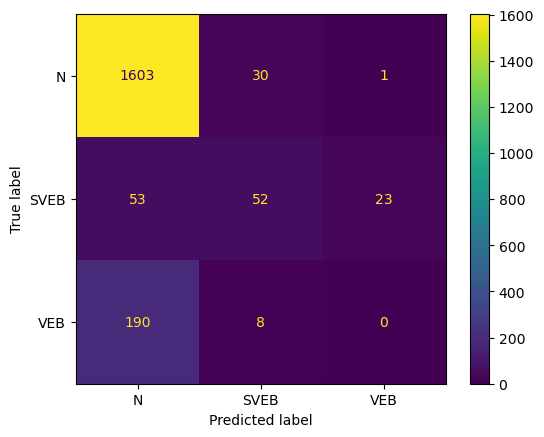

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2060
         1.0       0.45      0.25      0.33        55
         2.0       0.11      0.42      0.18        19

    accuracy                           0.95      2134
   macro avg       0.52      0.55      0.49      2134
weighted avg       0.97      0.95      0.96      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.987198   0.451613   0.111111  0.949859     0.516641   
recall        0.973301   0.254545   0.421053  0.949859     0.549633   
f1-score      0.980200   0.325581   0.175824  0.949859     0.493869   
support    2060.000000  55.000000  19.000000  0.949859  2134.000000   

           weighted avg  
precision      0.965594  
recall         0.949859  
f1-score       0.956167  
support     2134.000000  


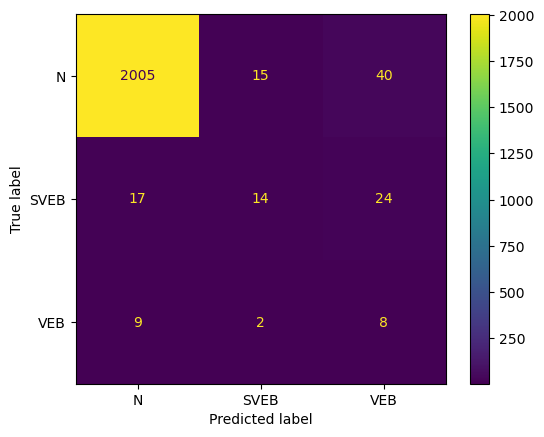

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.63      0.80      0.70       444

    accuracy                           0.89      2974
   macro avg       0.53      0.57      0.55      2974
weighted avg       0.91      0.89      0.90      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.962839  0.0    0.627660  0.894418     0.530166      0.912151
recall        0.912184  0.0    0.797297  0.894418     0.569827      0.894418
f1-score      0.936827  0.0    0.702381  0.894418     0.546403      0.901196
support    2528.000000  2.0  444.000000  0.894418  2974.000000   2974.000000


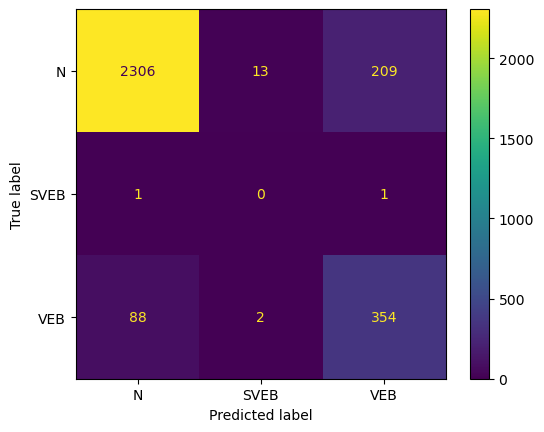

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2570
         1.0       0.50      0.67      0.57         3
         2.0       0.98      0.82      0.89        71

    accuracy                           0.99      2644
   macro avg       0.83      0.83      0.82      2644
weighted avg       0.99      0.99      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.994576  0.500000   0.983051   0.99357     0.825876   
recall        0.998833  0.666667   0.816901   0.99357     0.827467   
f1-score      0.996700  0.571429   0.892308   0.99357     0.820145   
support    2570.000000  3.000000  71.000000   0.99357  2644.000000   

           weighted avg  
precision      0.993705  
recall         0.993570  
f1-score       0.993414  
support     2644.000000  


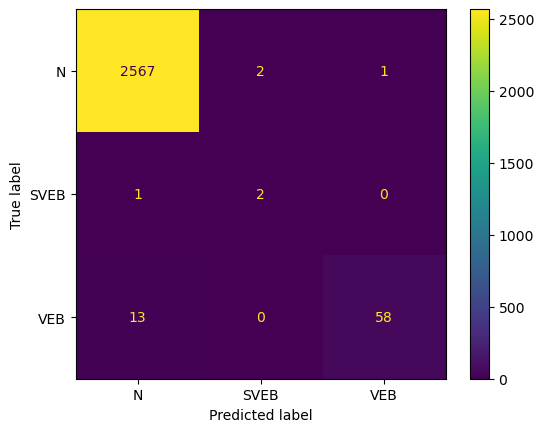

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.42      0.42      0.42       210

    accuracy                           0.86      1859
   macro avg       0.45      0.47      0.46      1859
weighted avg       0.82      0.86      0.84      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.930190    0.0    0.415094  0.864443     0.448428      0.818963
recall        0.984446    0.0    0.419048  0.864443     0.467831      0.864443
f1-score      0.956549    0.0    0.417062  0.864443     0.457870      0.841064
support    1543.000000  106.0  210.000000  0.864443  1859.000000   1859.000000


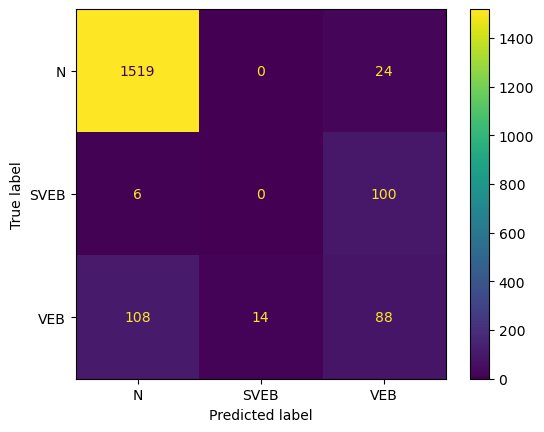

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.99      0.48      0.65       992

    accuracy                           0.79      2579
   macro avg       0.59      0.49      0.51      2579
weighted avg       0.87      0.79      0.79      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.791709  0.0    0.991736  0.793331     0.594481      0.868034
recall        0.988013  0.0    0.483871  0.793331     0.490628      0.793331
f1-score      0.879035  0.0    0.650407  0.793331     0.509814      0.790412
support    1585.000000  2.0  992.000000  0.793331  2579.000000   2579.000000


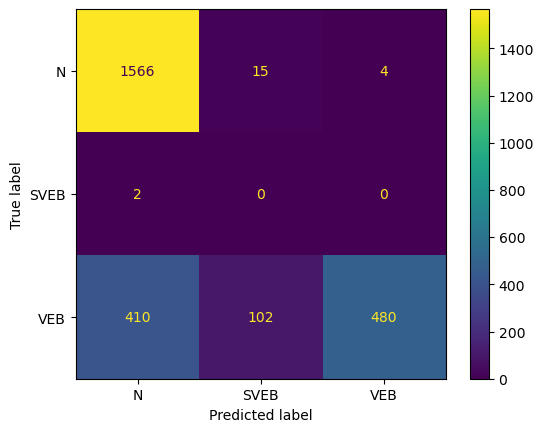

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2620
         1.0       1.00      0.07      0.14       383
         2.0       0.01      1.00      0.02         1

    accuracy                           0.88      3004
   macro avg       0.64      0.69      0.37      3004
weighted avg       0.92      0.88      0.85      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.913576    1.000000  0.008475  0.878828     0.640684   
recall        0.996565    0.073107  1.000000  0.878828     0.689891   
f1-score      0.953268    0.136253  0.016807  0.878828     0.368776   
support    2620.000000  383.000000  1.000000  0.878828  3004.000000   

           weighted avg  
precision      0.924293  
recall         0.878828  
f1-score       0.848789  
support     3004.000000  


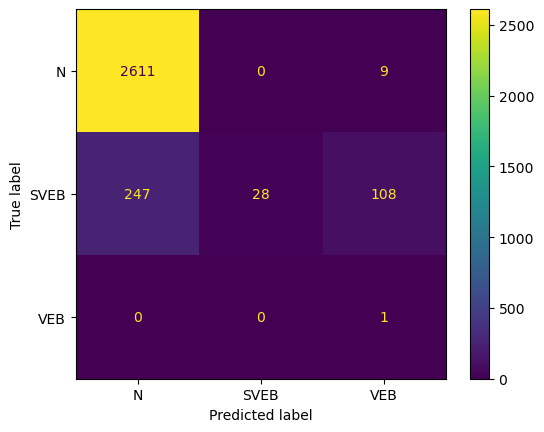

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2422
         1.0       0.23      0.23      0.23        22
         2.0       0.83      0.64      0.72       195

    accuracy                           0.95      2639
   macro avg       0.68      0.62      0.64      2639
weighted avg       0.95      0.95      0.95      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.967990   0.227273    0.832215  0.954149     0.675826   
recall        0.986375   0.227273    0.635897  0.954149     0.616515   
f1-score      0.977096   0.227273    0.720930  0.954149     0.641766   
support    2422.000000  22.000000  195.000000  0.954149  2639.000000   

           weighted avg  
precision      0.951783  
recall         0.954149  
f1-score       0.951917  
support     2639.000000  


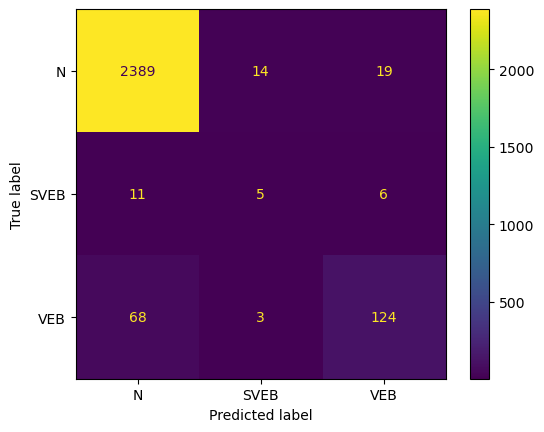

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2747
   macro avg       0.33      0.33      0.33      2747
weighted avg       1.00      1.00      1.00      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.995996     0.333333      1.000000
recall        0.995996  NaN  NaN  0.995996     0.331999      0.995996
f1-score      0.997994  NaN  NaN  0.995996     0.332665      0.997994
support    2747.000000  0.0  0.0  0.995996  2747.000000   2747.000000


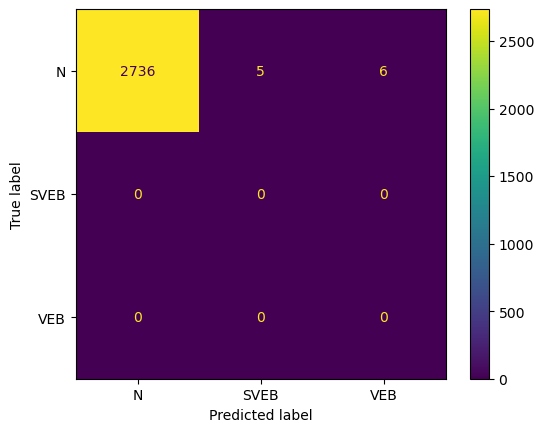

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2640
         1.0       0.50      0.07      0.12        28
         2.0       0.76      0.60      0.67       220

    accuracy                           0.95      2888
   macro avg       0.74      0.56      0.59      2888
weighted avg       0.95      0.95      0.95      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.968254   0.500000    0.760000  0.954986     0.742751   
recall        0.993561   0.071429    0.604545  0.954986     0.556512   
f1-score      0.980744   0.125000    0.673418  0.954986     0.593054   
support    2640.000000  28.000000  220.000000  0.954986  2888.000000   

           weighted avg  
precision      0.947850  
recall         0.954986  
f1-score       0.949036  
support     2888.000000  


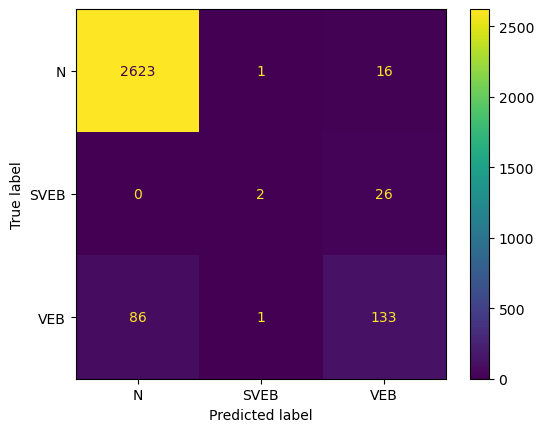

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.90      0.98      0.94       256

    accuracy                           0.99      2258
   macro avg       0.63      0.66      0.64      2258
weighted avg       0.99      0.99      0.99      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998482  0.0    0.896797  0.985385     0.631760      0.986953
recall        0.985514  NaN    0.984375  0.985385     0.656630      0.985385
f1-score      0.991956  NaN    0.938547  0.985385     0.643501      0.985901
support    2002.000000  0.0  256.000000  0.985385  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

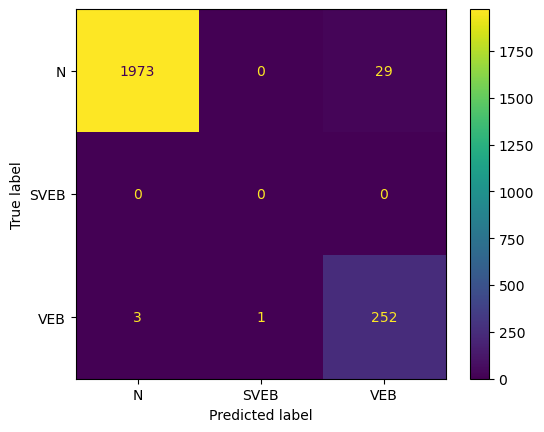

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3194
         1.0       0.11      0.67      0.19         3
         2.0       0.99      0.90      0.94       164

    accuracy                           0.99      3361
   macro avg       0.70      0.85      0.71      3361
weighted avg       0.99      0.99      0.99      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.995304  0.111111    0.986577  0.990181     0.697664   
recall        0.995304  0.666667    0.896341  0.990181     0.852771   
f1-score      0.995304  0.190476    0.939297  0.990181     0.708359   
support    3194.000000  3.000000  164.000000  0.990181  3361.000000   

           weighted avg  
precision      0.994089  
recall         0.990181  
f1-score       0.991852  
support     3361.000000  


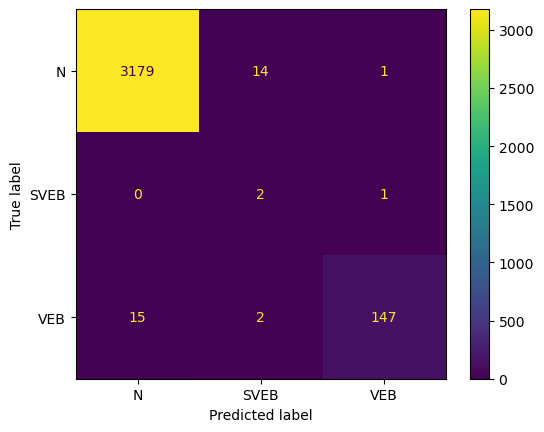

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2081
         1.0       0.00      0.00      0.00         7
         2.0       0.14      0.64      0.23        64

    accuracy                           0.87      2152
   macro avg       0.38      0.51      0.39      2152
weighted avg       0.96      0.87      0.90      2152

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.986465  0.0   0.139456  0.865706     0.375307      0.958066
recall        0.875541  0.0   0.640625  0.865706     0.505389      0.865706
f1-score      0.927699  0.0   0.229050  0.865706     0.385583      0.903903
support    2081.000000  7.0  64.000000  0.865706  2152.000000   2152.000000


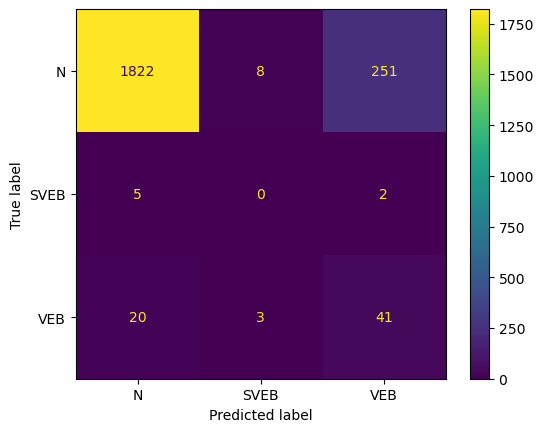

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1953
         1.0       1.00      0.30      0.46        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2047
   macro avg       0.66      0.43      0.48      2047
weighted avg       0.99      0.96      0.97      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.992853   1.000000  0.0   0.96385     0.664284      0.993182
recall        0.995904   0.297872  NaN   0.96385     0.431259      0.963850
f1-score      0.994376   0.459016  NaN   0.96385     0.484464      0.969792
support    1953.000000  94.000000  0.0   0.96385  2047.000000   2047.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

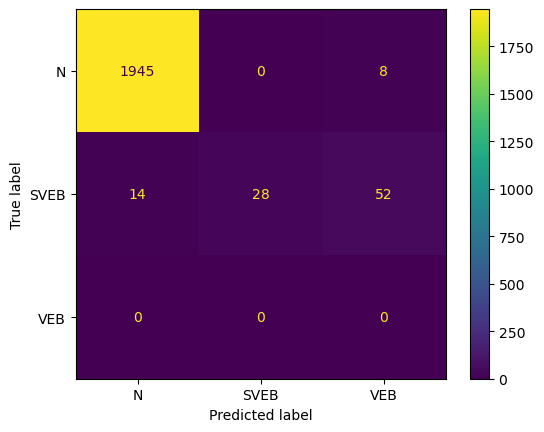

Fold 36:
  Test:  patient=35


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2030
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.97      0.98       396

    accuracy                           0.99      2426
   macro avg       0.67      0.66      0.66      2426
weighted avg       1.00      0.99      0.99      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.995575  0.0    1.000000  0.992993     0.665192      0.996297
recall        0.997537  NaN    0.969697  0.992993     0.655745      0.992993
f1-score      0.996555  NaN    0.984615  0.992993     0.660390      0.994606
support    2030.000000  0.0  396.000000  0.992993  2426.000000   2426.000000


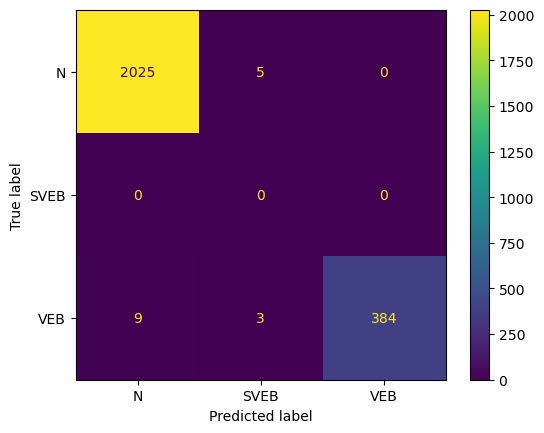

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2273
         1.0       0.63      0.46      0.54       209

    accuracy                           0.93      2482
   macro avg       0.79      0.72      0.75      2482
weighted avg       0.93      0.93      0.93      2482

                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.951911    0.633987  0.932313     0.792949      0.925140
recall        0.975363    0.464115  0.932313     0.719739      0.932313
f1-score      0.963494    0.535912  0.932313     0.749703      0.927489
support    2273.000000  209.000000  0.932313  2482.000000   2482.000000


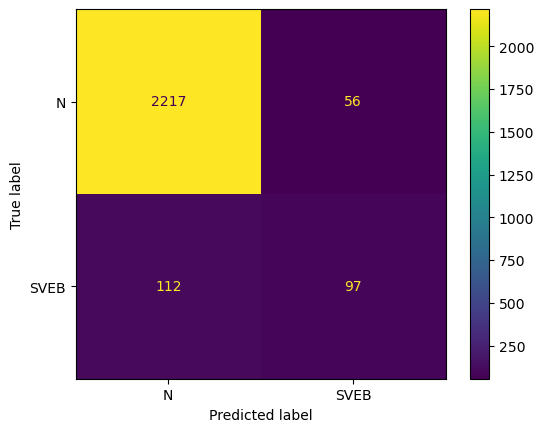

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2044
         1.0       0.89      0.22      0.35        73
         2.0       0.90      0.64      0.75       473

    accuracy                           0.91      2590
   macro avg       0.90      0.62      0.68      2590
weighted avg       0.91      0.91      0.90      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.908725   0.888889    0.899110  0.907336     0.898908   
recall        0.993640   0.219178    0.640592  0.907336     0.617803   
f1-score      0.949287   0.351648    0.748148  0.907336     0.683028   
support    2044.000000  73.000000  473.000000  0.907336  2590.000000   

           weighted avg  
precision      0.906410  
recall         0.907336  
f1-score       0.895709  
support     2590.000000  


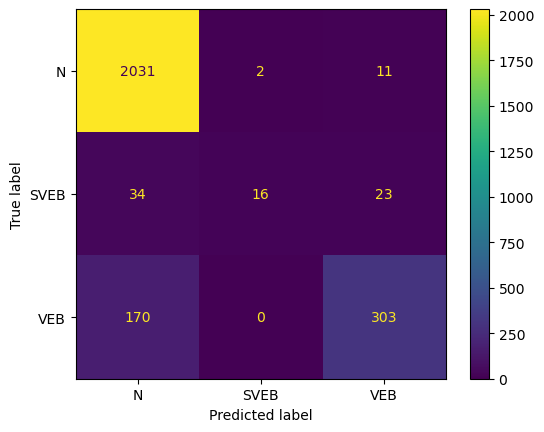

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1687
         1.0       0.50      0.33      0.40         3
         2.0       1.00      0.98      0.99       362

    accuracy                           0.99      2052
   macro avg       0.83      0.77      0.79      2052
weighted avg       0.99      0.99      0.99      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.993518  0.500000    1.000000  0.994152     0.831173   
recall        0.999407  0.333333    0.975138  0.994152     0.769293   
f1-score      0.996454  0.400000    0.987413  0.994152     0.794622   
support    1687.000000  3.000000  362.000000  0.994152  2052.000000   

           weighted avg  
precision      0.993940  
recall         0.994152  
f1-score       0.993987  
support     2052.000000  


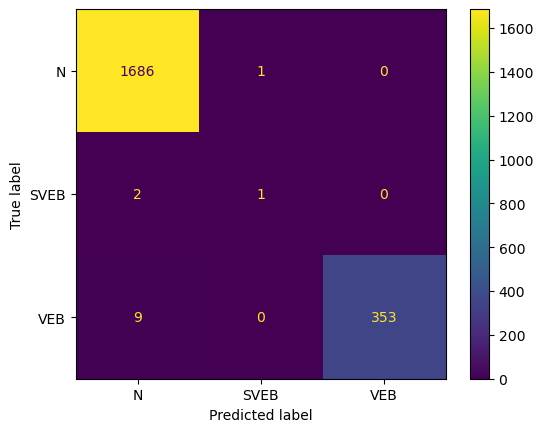

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.90      2255
   macro avg       0.33      0.63      0.32      2255
weighted avg       1.00      0.90      0.94      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.004831  0.896231     0.334944      0.999559
recall        0.896185  NaN  1.000000  0.896231     0.632062      0.896231
f1-score      0.945250  NaN  0.009615  0.896231     0.318289      0.944835
support    2254.000000  0.0  1.000000  0.896231  2255.000000   2255.000000


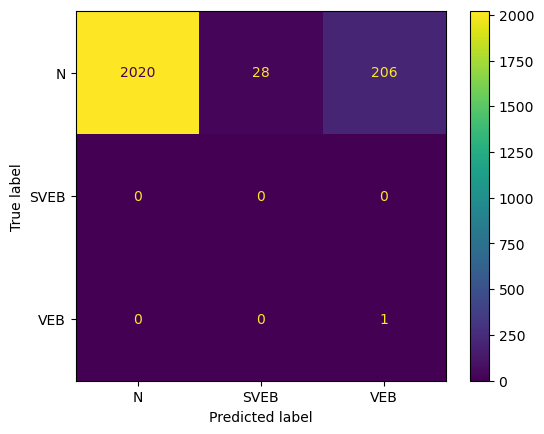

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1567
         1.0       0.03      1.00      0.07         1
         2.0       1.00      1.00      1.00         2

    accuracy                           0.98      1570
   macro avg       0.68      0.99      0.69      1570
weighted avg       1.00      0.98      0.99      1570

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.034483  1.0  0.982166     0.678161      0.999385
recall        0.982131  1.000000  1.0  0.982166     0.994044      0.982166
f1-score      0.990985  0.066667  1.0  0.982166     0.685884      0.990408
support    1567.000000  1.000000  2.0  0.982166  1570.000000   1570.000000


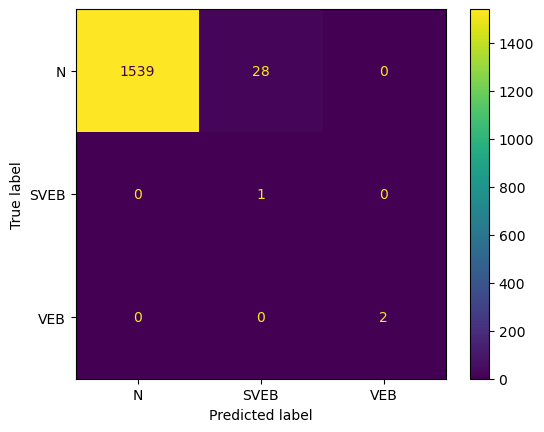

Fold 42:
  Test:  patient=41


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.22      1.00      0.37       398
         1.0       1.00      0.00      0.00      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.22      1779
   macro avg       0.41      0.33      0.12      1779
weighted avg       0.83      0.22      0.08      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.224605     1.000000  0.0  0.224845     0.408202      0.826528
recall       1.000000     0.001448  NaN  0.224845     0.333816      0.224845
f1-score     0.366820     0.002892  NaN  0.224845     0.123238      0.084311
support    398.000000  1381.000000  0.0  0.224845  1779.000000   1779.000000


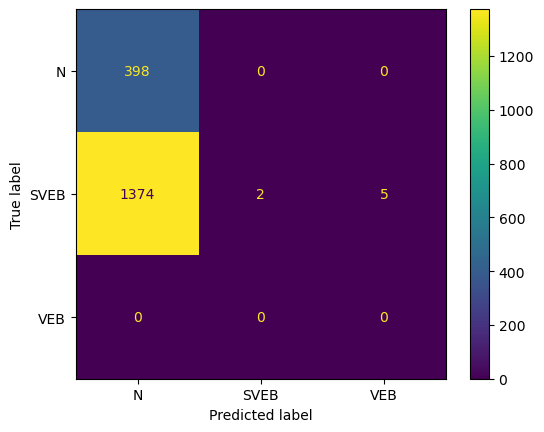

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2229
         1.0       0.00      0.00      0.00         7
         2.0       0.98      0.91      0.94       831

    accuracy                           0.97      3067
   macro avg       0.65      0.63      0.64      3067
weighted avg       0.97      0.97      0.97      3067

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.965547  0.0    0.975420  0.967721     0.646989      0.966019
recall        0.993271  0.0    0.907341  0.967721     0.633537      0.967721
f1-score      0.979213  0.0    0.940150  0.967721     0.639787      0.966394
support    2229.000000  7.0  831.000000  0.967721  3067.000000   3067.000000


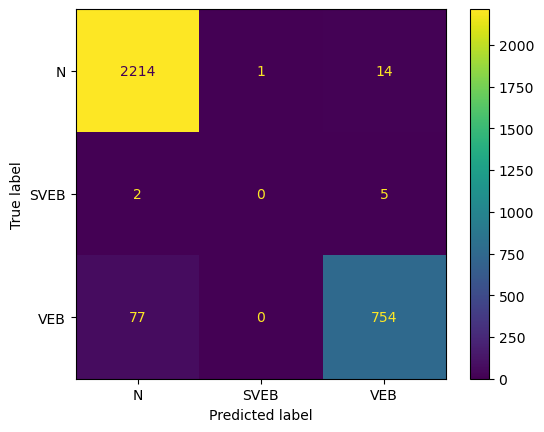

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2699
         1.0       0.60      0.30      0.40        50
         2.0       0.13      1.00      0.23         3

    accuracy                           0.98      2752
   macro avg       0.57      0.76      0.54      2752
weighted avg       0.98      0.98      0.98      2752

                   0.0   1.0       2.0  accuracy    macro avg  weighted avg
precision     0.991494   0.6  0.130435  0.980741     0.573976      0.983443
recall        0.993331   0.3  1.000000  0.980741     0.764444      0.980741
f1-score      0.992412   0.4  0.230769  0.980741     0.541060      0.980818
support    2699.000000  50.0  3.000000  0.980741  2752.000000   2752.000000


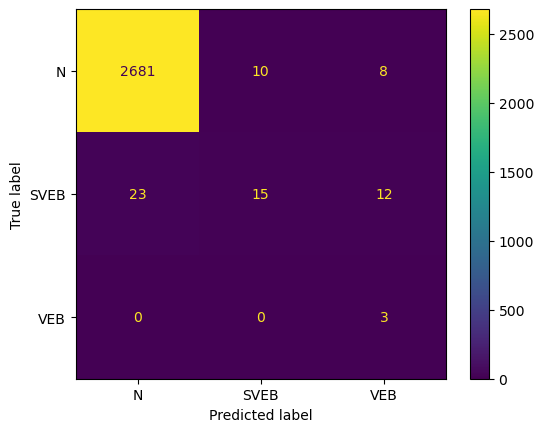

Fold 45:
  Test:  patient=44
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       210
         2.0       0.20      0.67      0.31         3

    accuracy                           0.96       213
   macro avg       0.60      0.81      0.64       213
weighted avg       0.98      0.96      0.97       213

                  0.0       2.0  accuracy   macro avg  weighted avg
precision    0.995074  0.200000  0.957746    0.597537      0.983876
recall       0.961905  0.666667  0.957746    0.814286      0.957746
f1-score     0.978208  0.307692  0.957746    0.642950      0.968764
support    210.000000  3.000000  0.957746  213.000000    213.000000


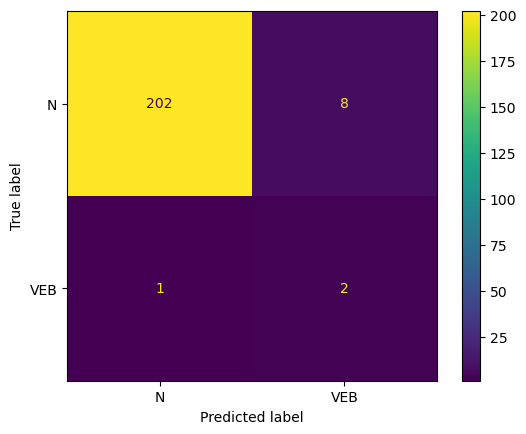

Fold 46:
  Test:  patient=45
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     56792
         1.0       0.00      0.00      0.00      1530
         2.0       0.93      0.56      0.70      4060

    accuracy                           0.94     62382
   macro avg       0.63      0.52      0.56     62382
weighted avg       0.93      0.94      0.93     62382

                    0.0          1.0          2.0  accuracy     macro avg  \
precision      0.949811     0.003185     0.930289  0.944279      0.627762   
recall         0.997024     0.000654     0.562069  0.944279      0.519916   
f1-score       0.972845     0.001085     0.700752  0.944279      0.558227   
support    56792.000000  1530.000000  4060.000000  0.944279  62382.000000   

           weighted avg  
precision      0.925323  
recall         0.944279  
f1-score       0.931303  
support    62382.000000  


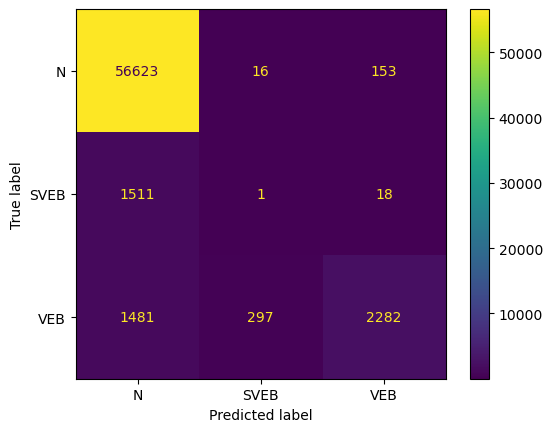

Fold 47:
  Test:  patient=46
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18041
         1.0       0.36      0.80      0.50         5
         2.0       0.87      0.83      0.85        24

    accuracy                           1.00     18070
   macro avg       0.74      0.88      0.78     18070
weighted avg       1.00      1.00      1.00     18070

                    0.0       1.0        2.0  accuracy     macro avg  \
precision      0.999834  0.363636   0.869565  0.999281      0.744345   
recall         0.999557  0.800000   0.833333  0.999281      0.877630   
f1-score       0.999695  0.500000   0.851064  0.999281      0.783586   
support    18041.000000  5.000000  24.000000  0.999281  18070.000000   

           weighted avg  
precision      0.999485  
recall         0.999281  
f1-score       0.999359  
support    18070.000000  


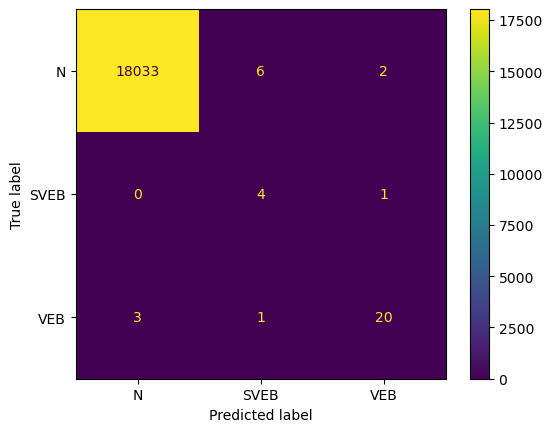

Fold 48:
  Test:  patient=47


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     25232
         1.0       0.00      0.00      0.00         0
         2.0       0.05      0.42      0.10        33

    accuracy                           0.99     25265
   macro avg       0.35      0.47      0.36     25265
weighted avg       1.00      0.99      0.99     25265

                    0.0  1.0        2.0  accuracy     macro avg  weighted avg
precision      0.999320  0.0   0.054475  0.988957      0.351265      0.998086
recall         0.989696  NaN   0.424242  0.988957      0.471313      0.988957
f1-score       0.994484  NaN   0.096552  0.988957      0.363679      0.993312
support    25232.000000  0.0  33.000000  0.988957  25265.000000  25265.000000


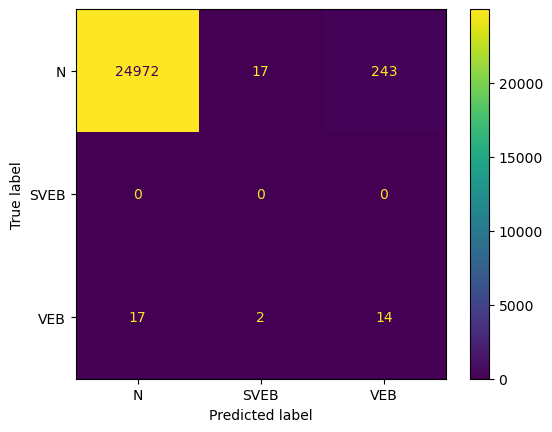

Fold 49:
  Test:  patient=48
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        66
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89        66
   macro avg       0.50      0.45      0.47        66
weighted avg       1.00      0.89      0.94        66

                 0.0  2.0  accuracy  macro avg  weighted avg
precision   1.000000  0.0  0.893939    0.50000      1.000000
recall      0.893939  NaN  0.893939    0.44697      0.893939
f1-score    0.944000  NaN  0.893939    0.47200      0.944000
support    66.000000  0.0  0.893939   66.00000     66.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

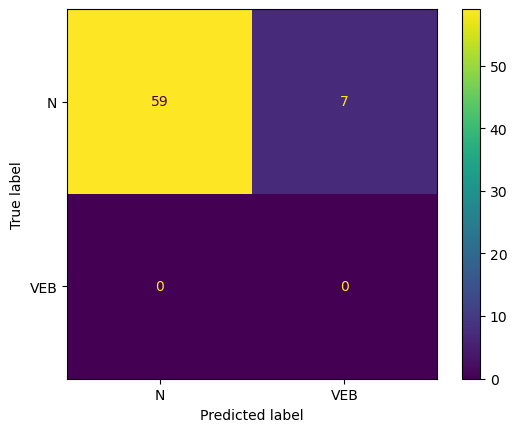

Fold 50:
  Test:  patient=49


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     20894
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.89      0.94      1538

    accuracy                           0.99     22432
   macro avg       0.66      0.63      0.64     22432
weighted avg       0.99      0.99      0.99     22432

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.992264  0.0     0.985591  0.987295      0.659285   
recall         0.994496  NaN     0.889467  0.987295      0.627988   
f1-score       0.993379  NaN     0.935065  0.987295      0.642815   
support    20894.000000  0.0  1538.000000  0.987295  22432.000000   

           weighted avg  
precision      0.991806  
recall         0.987295  
f1-score       0.989381  
support    22432.000000  


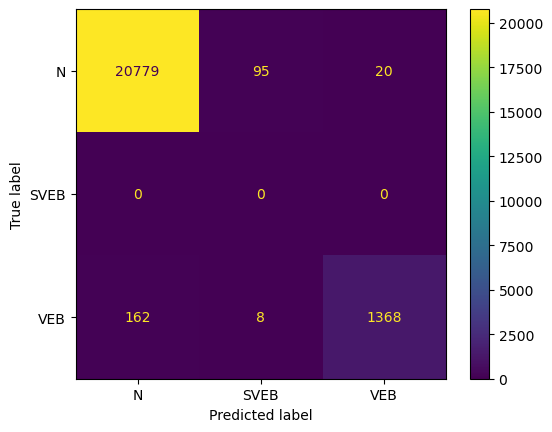

Fold 51:
  Test:  patient=50


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14088
         1.0       0.00      0.00      0.00         0
         2.0       0.93      0.26      0.41       658

    accuracy                           0.97     14746
   macro avg       0.63      0.42      0.46     14746
weighted avg       0.97      0.97      0.96     14746

                    0.0  1.0         2.0  accuracy     macro avg  weighted avg
precision      0.967354  0.0    0.930108  0.966228      0.632487      0.965692
recall         0.999077  NaN    0.262918  0.966228      0.420665      0.966228
f1-score       0.982960  NaN    0.409953  0.966228      0.464304      0.957391
support    14088.000000  0.0  658.000000  0.966228  14746.000000  14746.000000


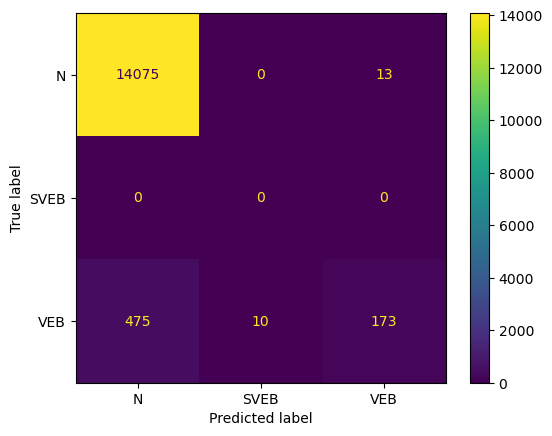

Fold 52:
  Test:  patient=51
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3548
         1.0       0.50      0.09      0.15        11
         2.0       0.96      0.98      0.97       361

    accuracy                           0.99      3920
   macro avg       0.82      0.69      0.71      3920
weighted avg       0.99      0.99      0.99      3920

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.995773   0.500000    0.959350  0.992092     0.818374   
recall        0.996054   0.090909    0.980609  0.992092     0.689191   
f1-score      0.995914   0.153846    0.969863  0.992092     0.706541   
support    3548.000000  11.000000  361.000000  0.992092  3920.000000   

           weighted avg  
precision      0.991028  
recall         0.992092  
f1-score       0.991152  
support     3920.000000  


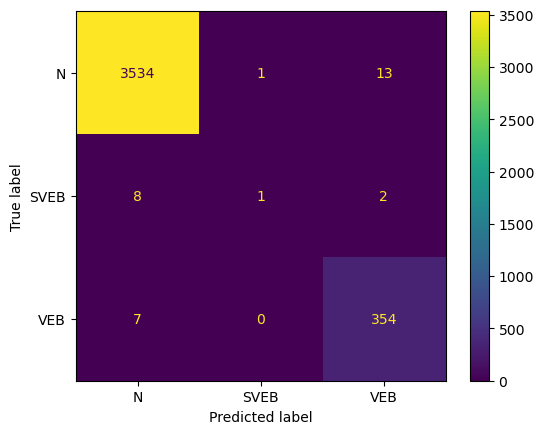

Fold 53:
  Test:  patient=52
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     14681
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.66      0.79      1835

    accuracy                           0.96     16516
   macro avg       0.64      0.55      0.59     16516
weighted avg       0.96      0.96      0.96     16516

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.961642  0.0     0.969023  0.960341      0.643555   
recall         0.997275  NaN     0.664850  0.960341      0.554042   
f1-score       0.979135  NaN     0.788623  0.960341      0.589253   
support    14681.000000  0.0  1835.000000  0.960341  16516.000000   

           weighted avg  
precision      0.962462  
recall         0.960341  
f1-score       0.957968  
support    16516.000000  


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

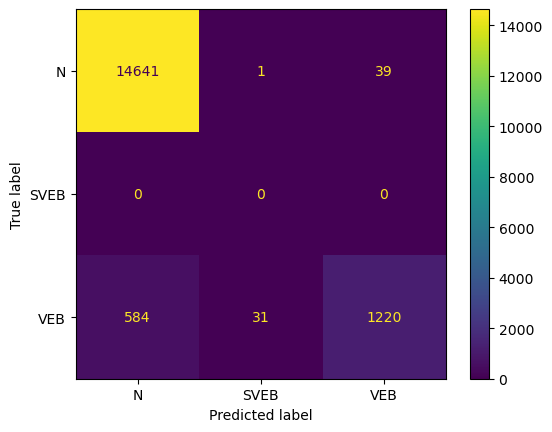

Fold 54:
  Test:  patient=53
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     79883
         1.0       0.00      0.00      0.00        23
         2.0       0.70      0.78      0.74      2689

    accuracy                           0.98     82595
   macro avg       0.56      0.59      0.58     82595
weighted avg       0.99      0.98      0.98     82595

                    0.0   1.0          2.0  accuracy     macro avg  \
precision      0.994899   0.0     0.699734  0.981803      0.564878   
recall         0.988821   0.0     0.781703  0.981803      0.590175   
f1-score       0.991851   0.0     0.738451  0.981803      0.576767   
support    79883.000000  23.0  2689.000000  0.981803  82595.000000   

           weighted avg  
precision      0.985012  
recall         0.981803  
f1-score       0.983325  
support    82595.000000  


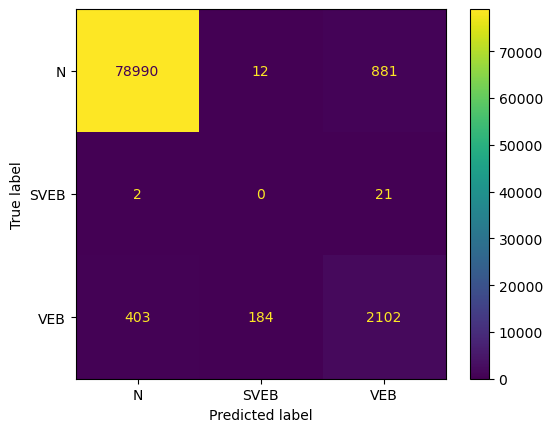

Fold 55:
  Test:  patient=54
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5452
         1.0       0.00      0.00      0.00         1
         2.0       0.55      0.92      0.69        65

    accuracy                           0.99      5518
   macro avg       0.52      0.64      0.56      5518
weighted avg       0.99      0.99      0.99      5518

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999075  0.0   0.550459  0.989851     0.516511      0.993610
recall        0.990829  0.0   0.923077  0.989851     0.637969      0.989851
f1-score      0.994935  0.0   0.689655  0.989851     0.561530      0.991159
support    5452.000000  1.0  65.000000  0.989851  5518.000000   5518.000000


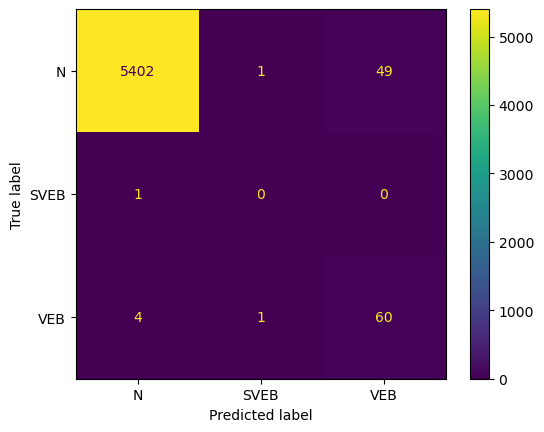

Fold 56:
  Test:  patient=55
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1844
         1.0       0.00      0.00      0.00        30
         2.0       0.14      0.50      0.21         6

    accuracy                           0.98      1880
   macro avg       0.38      0.50      0.40      1880
weighted avg       0.97      0.98      0.98      1880

                   0.0   1.0       2.0  accuracy    macro avg  weighted avg
precision     0.990850   NaN  0.136364  0.980851     0.375738      0.972312
recall        0.998373   0.0  0.500000  0.980851     0.499458      0.980851
f1-score      0.994598   NaN  0.214286  0.980851     0.402961      0.976236
support    1844.000000  30.0  6.000000  0.980851  1880.000000   1880.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

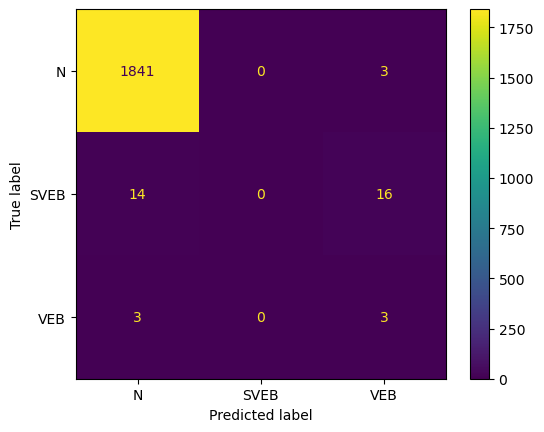

Fold 57:
  Test:  patient=56
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2173
         1.0       0.33      0.02      0.03        66
         2.0       0.76      0.47      0.58       268

    accuracy                           0.91      2507
   macro avg       0.67      0.49      0.52      2507
weighted avg       0.89      0.91      0.89      2507

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.917059   0.333333    0.763636  0.906262     0.671343   
recall        0.987115   0.015152    0.470149  0.906262     0.490805   
f1-score      0.950798   0.028986    0.581986  0.906262     0.520590   
support    2173.000000  66.000000  268.000000  0.906262  2507.000000   

           weighted avg  
precision      0.885290  
recall         0.906262  
f1-score       0.887104  
support     2507.000000  


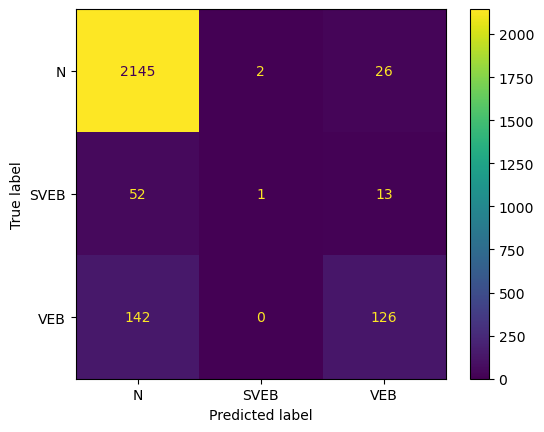

Fold 58:
  Test:  patient=57
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1584
         2.0       1.00      0.32      0.48        85

    accuracy                           0.97      1669
   macro avg       0.98      0.66      0.73      1669
weighted avg       0.97      0.97      0.96      1669

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.964677   1.000000  0.965249     0.982339      0.966476
recall        1.000000   0.317647  0.965249     0.658824      0.965249
f1-score      0.982021   0.482143  0.965249     0.732082      0.956563
support    1584.000000  85.000000  0.965249  1669.000000   1669.000000


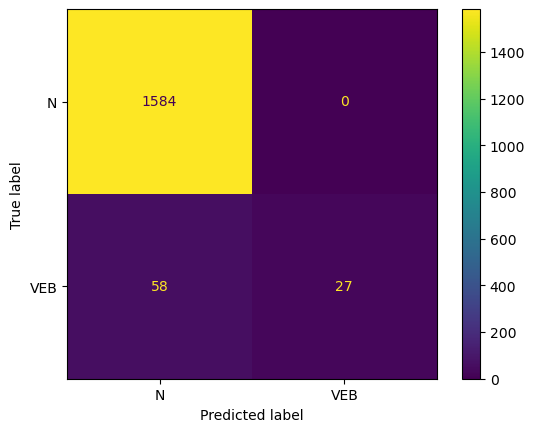

Fold 59:
  Test:  patient=58
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1922
         2.0       1.00      0.95      0.97       143

    accuracy                           1.00      2065
   macro avg       1.00      0.98      0.99      2065
weighted avg       1.00      1.00      1.00      2065

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.996371    1.000000   0.99661     0.998186      0.996622
recall        1.000000    0.951049   0.99661     0.975524      0.996610
f1-score      0.998182    0.974910   0.99661     0.986546      0.996571
support    1922.000000  143.000000   0.99661  2065.000000   2065.000000


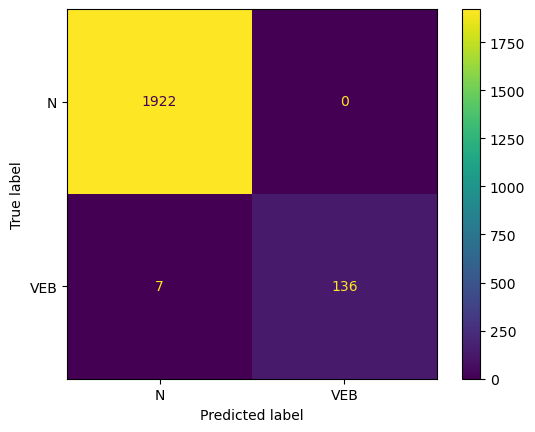

Fold 60:
  Test:  patient=59


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2651
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.60      0.74       181

    accuracy                           0.96      2832
   macro avg       0.65      0.53      0.57      2832
weighted avg       0.97      0.96      0.97      2832

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.973958  0.0    0.981818  0.962571     0.651926      0.974461
recall        0.987552  NaN    0.596685  0.962571     0.528079      0.962571
f1-score      0.980708  NaN    0.742268  0.962571     0.574325      0.965469
support    2651.000000  0.0  181.000000  0.962571  2832.000000   2832.000000


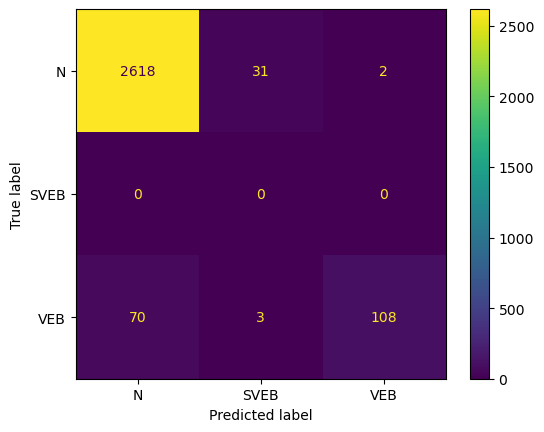

Fold 61:
  Test:  patient=60


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2089
         1.0       0.00      0.00      0.00         0
         2.0       0.79      0.90      0.84       207

    accuracy                           0.97      2296
   macro avg       0.59      0.63      0.61      2296
weighted avg       0.97      0.97      0.97      2296

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.991254  0.0    0.792373  0.969948     0.594542      0.973323
recall        0.976544  NaN    0.903382  0.969948     0.626642      0.969948
f1-score      0.983844  NaN    0.844244  0.969948     0.609363      0.971258
support    2089.000000  0.0  207.000000  0.969948  2296.000000   2296.000000


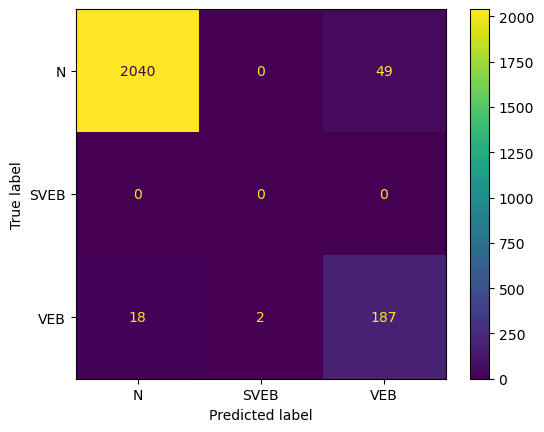

Fold 62:
  Test:  patient=61
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2950
         1.0       0.61      0.75      0.67        40
         2.0       1.00      0.17      0.29        29

    accuracy                           0.99      3019
   macro avg       0.87      0.64      0.66      3019
weighted avg       0.99      0.99      0.99      3019

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.994941   0.612245   1.000000  0.988738     0.869062   
recall        1.000000   0.750000   0.172414  0.988738     0.640805   
f1-score      0.997464   0.674157   0.294118  0.988738     0.655246   
support    2950.000000  40.000000  29.000000  0.988738  3019.000000   

           weighted avg  
precision      0.989919  
recall         0.988738  
f1-score       0.986424  
support     3019.000000  


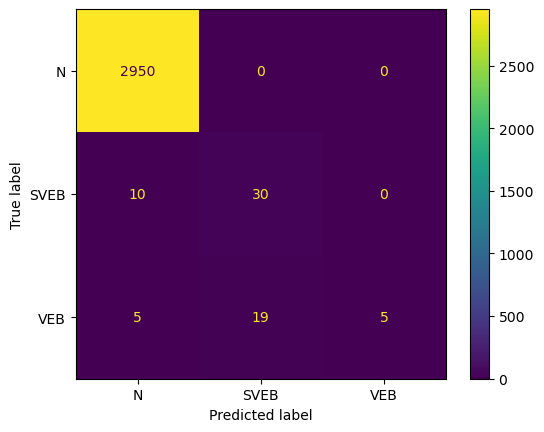

Fold 63:
  Test:  patient=62


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1911
         1.0       1.00      0.10      0.19        29
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1940
   macro avg       0.66      0.37      0.39      1940
weighted avg       0.99      0.99      0.98      1940

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.987087   1.000000  0.0  0.986598     0.662362      0.987280
recall        1.000000   0.103448  NaN  0.986598     0.367816      0.986598
f1-score      0.993501   0.187500  NaN  0.986598     0.393667      0.981453
support    1911.000000  29.000000  0.0  0.986598  1940.000000   1940.000000


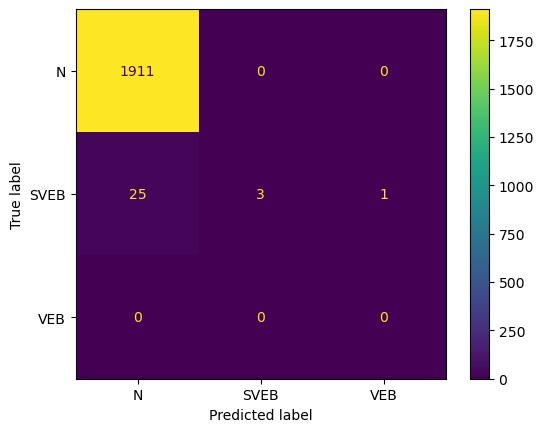

Fold 64:
  Test:  patient=63
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1744
         1.0       1.00      0.25      0.40        20
         2.0       0.89      1.00      0.94         8

    accuracy                           0.99      1772
   macro avg       0.96      0.75      0.78      1772
weighted avg       0.99      0.99      0.99      1772

                   0.0    1.0       2.0  accuracy    macro avg  weighted avg
precision     0.992036   1.00  0.888889  0.991535     0.960308      0.991661
recall        1.000000   0.25  1.000000  0.991535     0.750000      0.991535
f1-score      0.996002   0.40  0.941176  0.991535     0.779060      0.989028
support    1744.000000  20.00  8.000000  0.991535  1772.000000   1772.000000


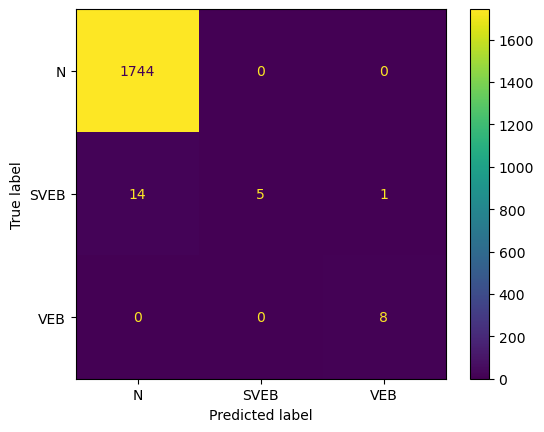

Fold 65:
  Test:  patient=64
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2430
         1.0       1.00      0.01      0.02       112
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2542
   macro avg       0.66      0.34      0.33      2542
weighted avg       0.98      0.96      0.94      2542

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.973927    1.000000  0.0  0.955547     0.657976      0.975076
recall        0.999177    0.008929  NaN  0.955547     0.336035      0.955547
f1-score      0.986390    0.017699  NaN  0.955547     0.334697      0.943710
support    2430.000000  112.000000  0.0  0.955547  2542.000000   2542.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

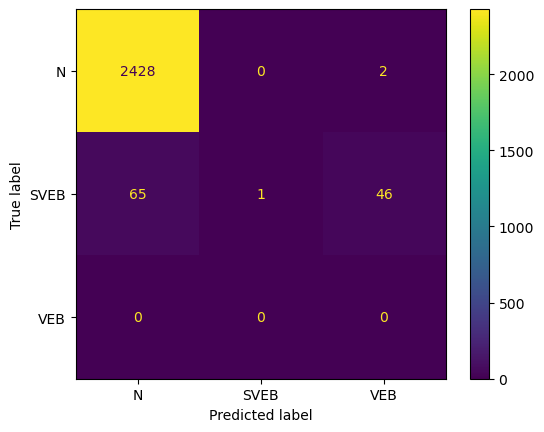

Fold 66:
  Test:  patient=65
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1837
         1.0       0.33      0.12      0.18         8
         2.0       0.98      0.95      0.96        56

    accuracy                           0.99      1901
   macro avg       0.77      0.69      0.71      1901
weighted avg       0.99      0.99      0.99      1901

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.995662  0.333333   0.981481  0.994214     0.770159   
recall        0.999456  0.125000   0.946429  0.994214     0.690295   
f1-score      0.997555  0.181818   0.963636  0.994214     0.714337   
support    1837.000000  8.000000  56.000000  0.994214  1901.000000   

           weighted avg  
precision      0.992457  
recall         0.994214  
f1-score       0.993123  
support     1901.000000  


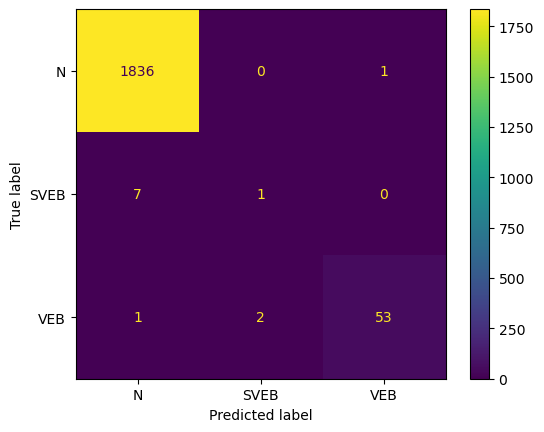

Fold 67:
  Test:  patient=66
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1404
         1.0       0.02      1.00      0.04         1
         2.0       1.00      0.07      0.13        28

    accuracy                           0.96      1433
   macro avg       0.67      0.68      0.39      1433
weighted avg       0.99      0.96      0.96      1433

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.987726  0.021739   1.000000  0.956734     0.669822   
recall        0.974359  1.000000   0.071429  0.956734     0.681929   
f1-score      0.980997  0.042553   0.133333  0.956734     0.385628   
support    1404.000000  1.000000  28.000000  0.956734  1433.000000   

           weighted avg  
precision      0.987291  
recall         0.956734  
f1-score       0.963779  
support     1433.000000  


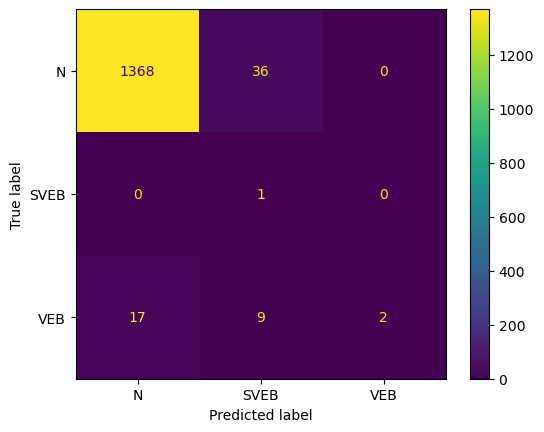

Fold 68:
  Test:  patient=67
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1756
         1.0       0.80      0.29      0.42        14
         2.0       0.95      0.99      0.97        70

    accuracy                           0.99      1840
   macro avg       0.91      0.76      0.79      1840
weighted avg       0.99      0.99      0.99      1840

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.994892   0.800000   0.945205  0.992391     0.913366   
recall        0.998292   0.285714   0.985714  0.992391     0.756573   
f1-score      0.996589   0.421053   0.965035  0.992391     0.794226   
support    1756.000000  14.000000  70.000000  0.992391  1840.000000   

           weighted avg  
precision      0.991519  
recall         0.992391  
f1-score       0.991009  
support     1840.000000  


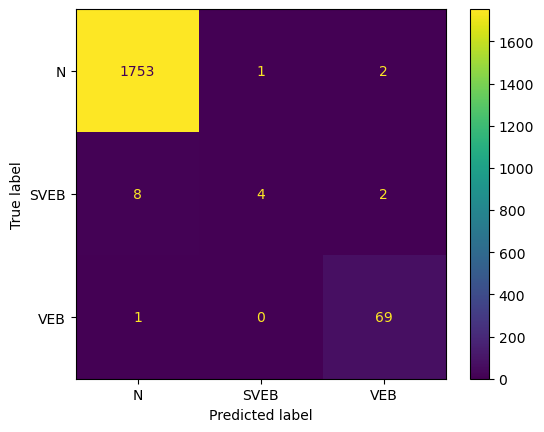

Fold 69:
  Test:  patient=68
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2161
         1.0       0.99      0.68      0.80       185
         2.0       0.04      0.67      0.08         3

    accuracy                           0.97      2349
   macro avg       0.68      0.78      0.63      2349
weighted avg       0.99      0.97      0.98      2349

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.994478    0.992063  0.040000  0.974032     0.675514   
recall        1.000000    0.675676  0.666667  0.974032     0.780781   
f1-score      0.997231    0.803859  0.075472  0.974032     0.625520   
support    2161.000000  185.000000  3.000000  0.974032  2349.000000   

           weighted avg  
precision      0.993069  
recall         0.974032  
f1-score       0.980825  
support     2349.000000  


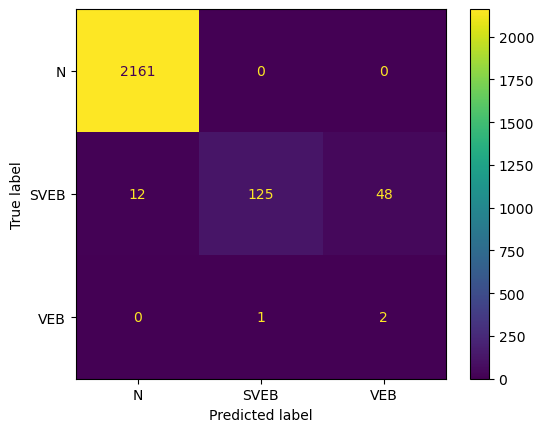

Fold 70:
  Test:  patient=69
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2480
         1.0       0.90      0.31      0.46       614
         2.0       0.22      0.06      0.09        36

    accuracy                           0.85      3130
   macro avg       0.66      0.46      0.49      3130
weighted avg       0.86      0.85      0.82      3130

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.851941    0.904762   0.222222  0.853674     0.659642   
recall        1.000000    0.309446   0.055556  0.853674     0.455001   
f1-score      0.920052    0.461165   0.088889  0.853674     0.490035   
support    2480.000000  614.000000  36.000000  0.853674  3130.000000   

           weighted avg  
precision      0.855060  
recall         0.853674  
f1-score       0.820474  
support     3130.000000  


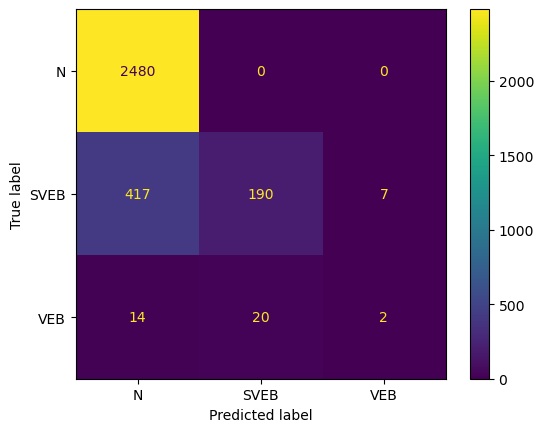

Fold 71:
  Test:  patient=70
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1673
         1.0       0.99      0.23      0.37       658
         2.0       0.00      0.00      0.00         1

    accuracy                           0.78      2332
   macro avg       0.59      0.41      0.41      2332
weighted avg       0.83      0.78      0.73      2332

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.772286    0.986928  0.0  0.781732     0.586405      0.832519
recall        0.999402    0.229483  0.0  0.781732     0.409629      0.781732
f1-score      0.871287    0.372380  0.0  0.781732     0.414556      0.730141
support    1673.000000  658.000000  1.0  0.781732  2332.000000   2332.000000


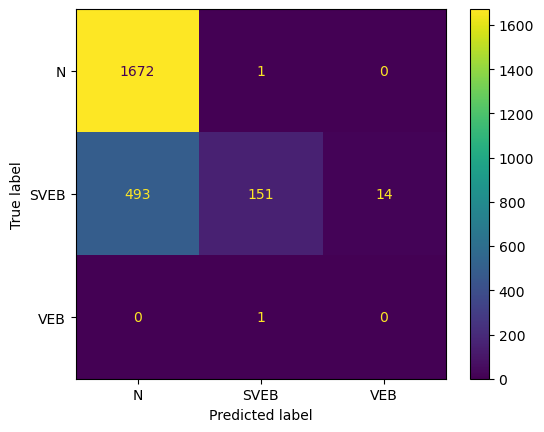

Fold 72:
  Test:  patient=71
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2477
         1.0       0.95      0.16      0.27       382
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      2859
   macro avg       0.61      0.39      0.40      2859
weighted avg       0.90      0.89      0.85      2859

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.888290    0.953125  0.0  0.886324     0.613805      0.896953
recall        0.998385    0.159686  NaN  0.886324     0.386024      0.886324
f1-score      0.940125    0.273543  NaN  0.886324     0.404556      0.851061
support    2477.000000  382.000000  0.0  0.886324  2859.000000   2859.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

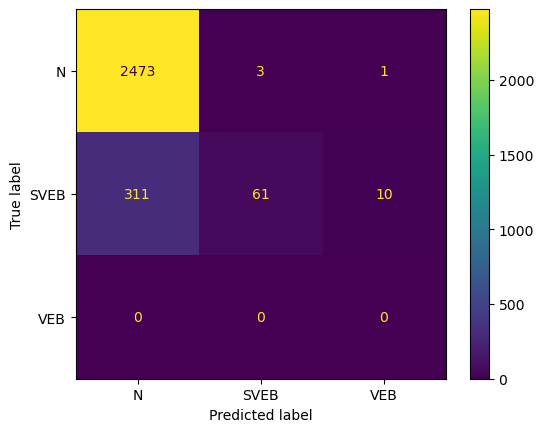

Fold 73:
  Test:  patient=72
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2214
         1.0       0.79      0.84      0.81       196
         2.0       0.50      0.71      0.59         7

    accuracy                           0.97      2417
   macro avg       0.76      0.85      0.79      2417
weighted avg       0.97      0.97      0.97      2417

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.987711    0.785714  0.500000  0.968142     0.757808   
recall        0.980126    0.841837  0.714286  0.968142     0.845416   
f1-score      0.983904    0.812808  0.588235  0.968142     0.794982   
support    2214.000000  196.000000  7.000000  0.968142  2417.000000   

           weighted avg  
precision      0.969918  
recall         0.968142  
f1-score       0.968883  
support     2417.000000  


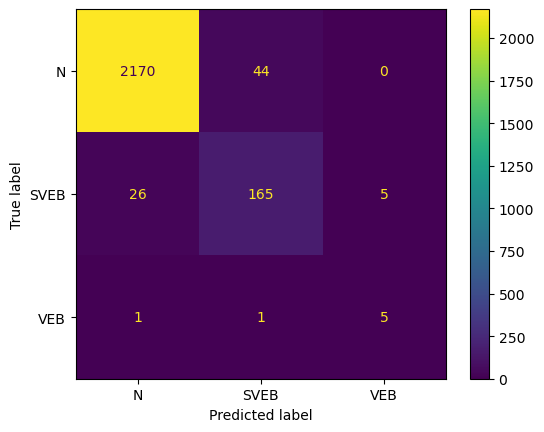

Fold 74:
  Test:  patient=73


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2651
         1.0       0.00      0.00      0.00       145
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      2796
   macro avg       0.33      0.33      0.33      2796
weighted avg       0.95      0.95      0.95      2796

                   0.0    1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000    0.0  0.0  0.947067     0.333333      0.948140
recall        0.998868    0.0  NaN  0.947067     0.332956      0.947067
f1-score      0.999434    0.0  NaN  0.947067     0.333145      0.947603
support    2651.000000  145.0  0.0  0.947067  2796.000000   2796.000000


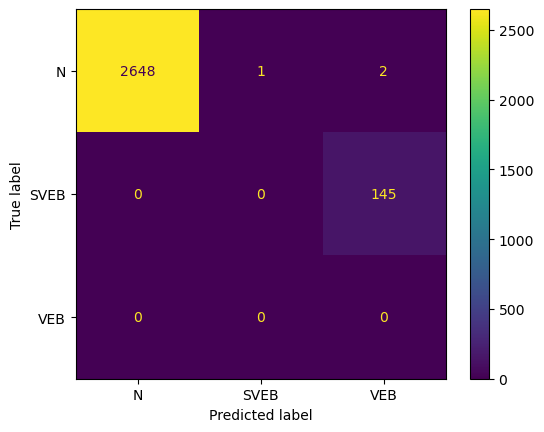

Fold 75:
  Test:  patient=74
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      2579
         1.0       0.18      0.72      0.29        80

    accuracy                           0.89      2659
   macro avg       0.58      0.81      0.61      2659
weighted avg       0.97      0.89      0.92      2659

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.990574   0.178462  0.891313     0.584518      0.966140
recall        0.896472   0.725000  0.891313     0.810736      0.891313
f1-score      0.941176   0.286420  0.891313     0.613798      0.921477
support    2579.000000  80.000000  0.891313  2659.000000   2659.000000


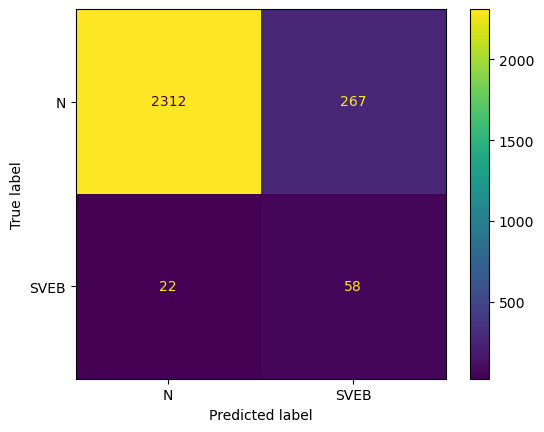

Fold 76:
  Test:  patient=75
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1842
         1.0       0.40      0.94      0.57        18

    accuracy                           0.99      1860
   macro avg       0.70      0.97      0.78      1860
weighted avg       0.99      0.99      0.99      1860

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.999450   0.404762  0.986022     0.702106      0.993695
recall        0.986428   0.944444  0.986022     0.965436      0.986022
f1-score      0.992896   0.566667  0.986022     0.779781      0.988771
support    1842.000000  18.000000  0.986022  1860.000000   1860.000000


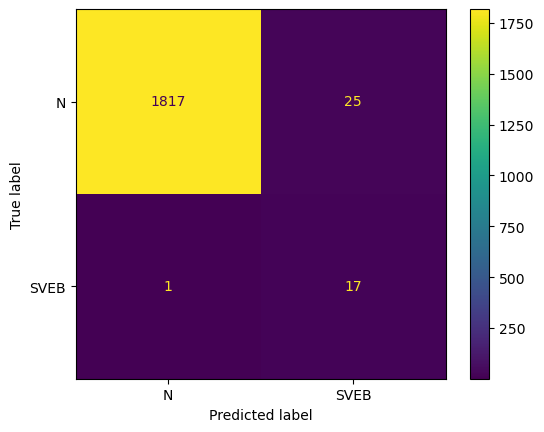

Fold 77:
  Test:  patient=76
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1755
         1.0       0.99      0.55      0.70       150
         2.0       0.57      0.67      0.62         6

    accuracy                           0.96      1911
   macro avg       0.84      0.74      0.77      1911
weighted avg       0.96      0.96      0.96      1911

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.963207    0.987952  0.571429  0.962847     0.840862   
recall        0.999430    0.546667  0.666667  0.962847     0.737588   
f1-score      0.980984    0.703863  0.615385  0.962847     0.766744   
support    1755.000000  150.000000  6.000000  0.962847  1911.000000   

           weighted avg  
precision      0.963919  
recall         0.962847  
f1-score       0.958084  
support     1911.000000  


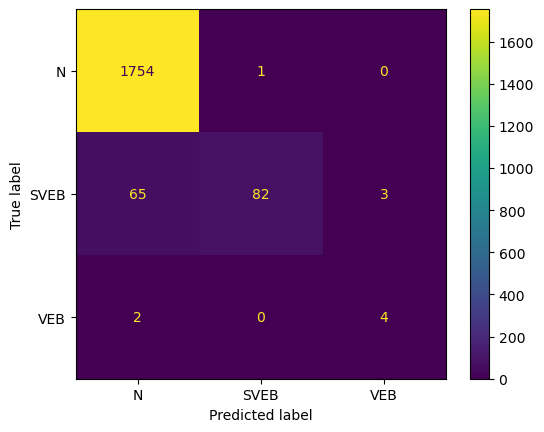

Fold 78:
  Test:  patient=77
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1885
         1.0       0.64      0.90      0.75        80
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1965
   macro avg       0.54      0.63      0.58      1965
weighted avg       0.98      0.97      0.98      1965

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997828   0.637168  0.0   0.97201     0.544999      0.983145
recall        0.975066   0.900000  NaN   0.97201     0.625022      0.972010
f1-score      0.986316   0.746114  NaN   0.97201     0.577477      0.976537
support    1885.000000  80.000000  0.0   0.97201  1965.000000   1965.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

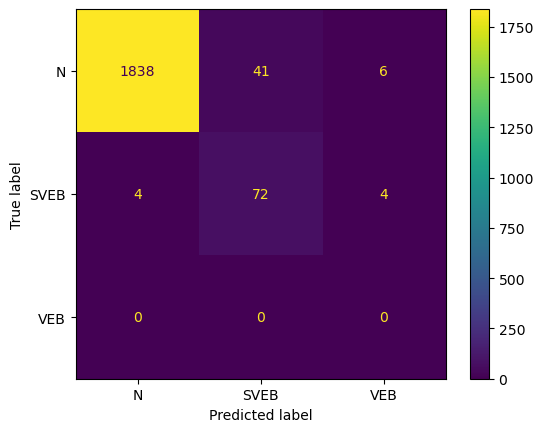

Fold 79:
  Test:  patient=78
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2339
         1.0       0.94      0.34      0.50        44
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      2384
   macro avg       0.64      0.45      0.50      2384
weighted avg       0.99      0.99      0.98      2384

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.987331   0.937500  NaN  0.986997     0.641610      0.985997
recall        0.999572   0.340909  0.0  0.986997     0.446827      0.986997
f1-score      0.993414   0.500000  NaN  0.986997     0.497805      0.983891
support    2339.000000  44.000000  1.0  0.986997  2384.000000   2384.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

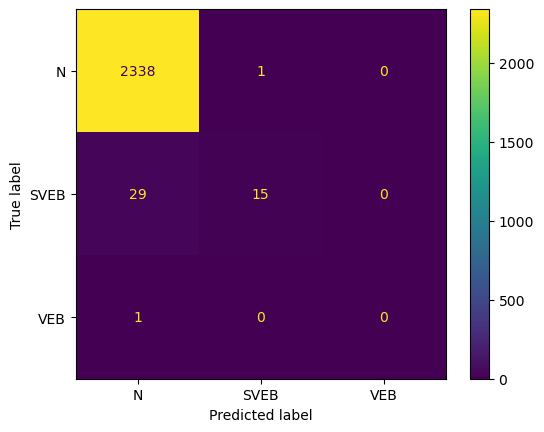

Fold 80:
  Test:  patient=79
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1489
         1.0       0.33      0.01      0.02       106
         2.0       0.68      0.91      0.78       254

    accuracy                           0.92      1849
   macro avg       0.66      0.64      0.59      1849
weighted avg       0.90      0.92      0.90      1849

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.974784    0.333333    0.684366  0.920498     0.664161   
recall        0.986568    0.009434    0.913386  0.920498     0.636463   
f1-score      0.980641    0.018349    0.782462  0.920498     0.593817   
support    1489.000000  106.000000  254.000000  0.920498  1849.000000   

           weighted avg  
precision      0.898116  
recall         0.920498  
f1-score       0.898250  
support     1849.000000  


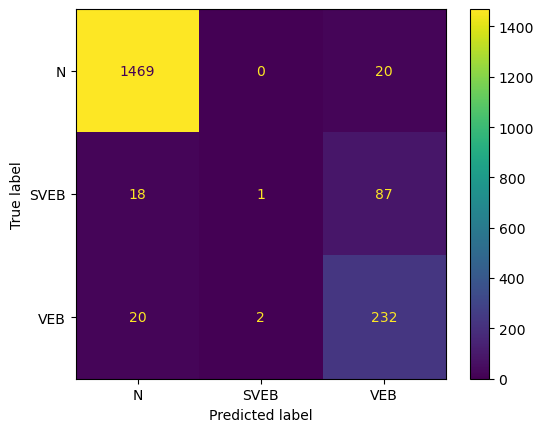

Fold 81:
  Test:  patient=80
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2392
         1.0       0.27      0.25      0.26       104
         2.0       0.00      0.00      0.00        61

    accuracy                           0.93      2557
   macro avg       0.41      0.41      0.41      2557
weighted avg       0.91      0.93      0.92      2557

                   0.0         1.0   2.0  accuracy    macro avg  weighted avg
precision     0.955727    0.273684   NaN  0.930387     0.409804      0.905187
recall        0.983696    0.250000   0.0  0.930387     0.411232      0.930387
f1-score      0.969510    0.261307   NaN  0.930387     0.410272      0.917576
support    2392.000000  104.000000  61.0  0.930387  2557.000000   2557.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

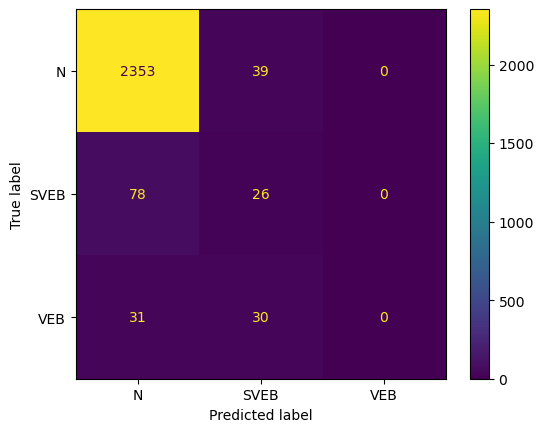

Fold 82:
  Test:  patient=81
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2647
         1.0       0.50      0.43      0.46        21
         2.0       1.00      0.61      0.75        38

    accuracy                           0.99      2706
   macro avg       0.83      0.68      0.74      2706
weighted avg       0.99      0.99      0.99      2706

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.990619   0.500000   1.000000  0.987435     0.830206   
recall        0.997355   0.428571   0.605263  0.987435     0.677063   
f1-score      0.993976   0.461538   0.754098  0.987435     0.736538   
support    2647.000000  21.000000  38.000000  0.987435  2706.000000   

           weighted avg  
precision      0.986943  
recall         0.987435  
f1-score       0.986475  
support     2706.000000  


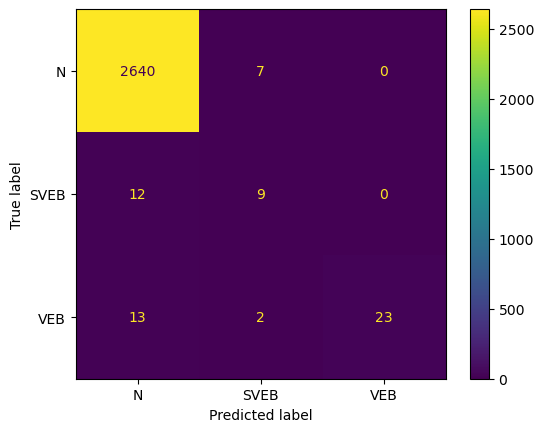

Fold 83:
  Test:  patient=82
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1648
         1.0       0.88      0.25      0.39        59
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1707
   macro avg       0.62      0.42      0.46      1707
weighted avg       0.97      0.97      0.97      1707

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.976855   0.882353  0.0  0.973052     0.619736      0.973588
recall        0.998786   0.254237  NaN  0.973052     0.417675      0.973052
f1-score      0.987699   0.394737  NaN  0.973052     0.460812      0.967204
support    1648.000000  59.000000  0.0  0.973052  1707.000000   1707.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

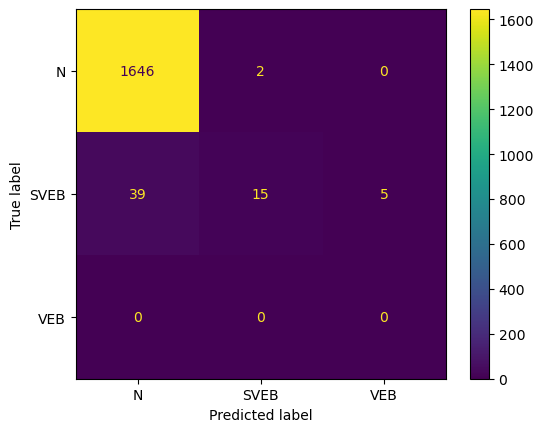

Fold 84:
  Test:  patient=83
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2826
         1.0       0.09      0.07      0.08        27
         2.0       0.05      0.17      0.08        30

    accuracy                           0.95      2883
   macro avg       0.38      0.40      0.38      2883
weighted avg       0.97      0.95      0.96      2883

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.987681   0.090909   0.049505  0.947971     0.376032   
recall        0.964614   0.074074   0.166667  0.947971     0.401785   
f1-score      0.976011   0.081633   0.076336  0.947971     0.377993   
support    2826.000000  27.000000  30.000000  0.947971  2883.000000   

           weighted avg  
precision      0.969520  
recall         0.947971  
f1-score       0.958274  
support     2883.000000  


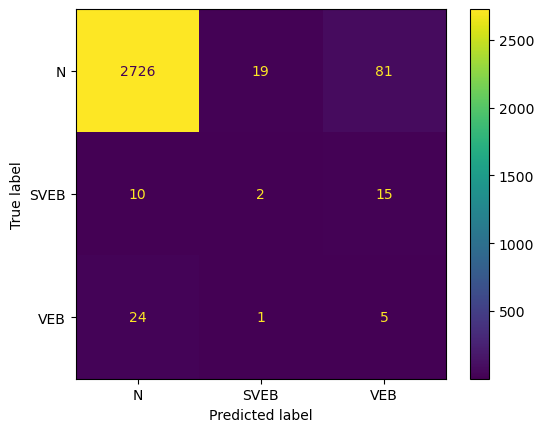

Fold 85:
  Test:  patient=84
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1659
         1.0       0.70      0.35      0.47        20

    accuracy                           0.99      1679
   macro avg       0.85      0.67      0.73      1679
weighted avg       0.99      0.99      0.99      1679

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.992211   0.700000  0.990471     0.846105      0.988730
recall        0.998192   0.350000  0.990471     0.674096      0.990471
f1-score      0.995192   0.466667  0.990471     0.730929      0.988897
support    1659.000000  20.000000  0.990471  1679.000000   1679.000000


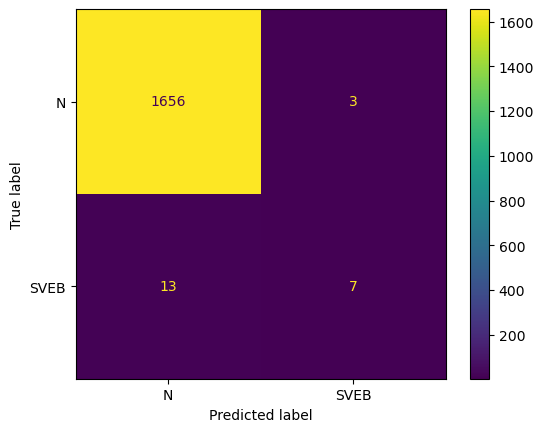

Fold 86:
  Test:  patient=85
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1665
         1.0       0.42      0.10      0.16        51
         2.0       0.95      0.93      0.94        44

    accuracy                           0.97      1760
   macro avg       0.78      0.68      0.70      1760
weighted avg       0.96      0.97      0.96      1760

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.972434   0.416667   0.953488  0.968182     0.780863   
recall        0.995796   0.098039   0.931818  0.968182     0.675218   
f1-score      0.983976   0.158730   0.942529  0.968182     0.695078   
support    1665.000000  51.000000  44.000000  0.968182  1760.000000   

           weighted avg  
precision      0.955856  
recall         0.968182  
f1-score       0.959027  
support     1760.000000  


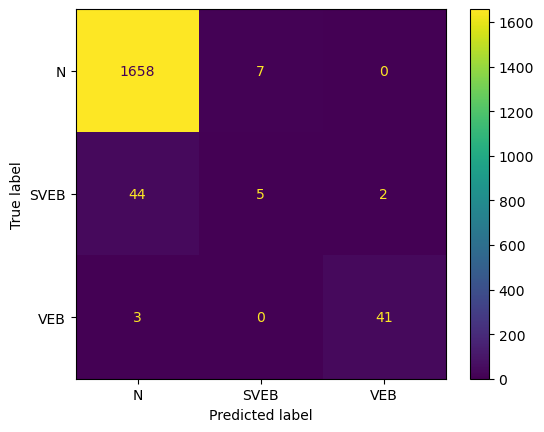

Fold 87:
  Test:  patient=86
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4226
         1.0       0.40      0.97      0.56        30
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      4257
   macro avg       0.47      0.65      0.52      4257
weighted avg       1.00      0.99      0.99      4257

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999761   0.397260  0.0  0.989194     0.465674      0.995280
recall        0.989588   0.966667  0.0  0.989194     0.652085      0.989194
f1-score      0.994649   0.563107  0.0  0.989194     0.519252      0.991374
support    4226.000000  30.000000  1.0  0.989194  4257.000000   4257.000000


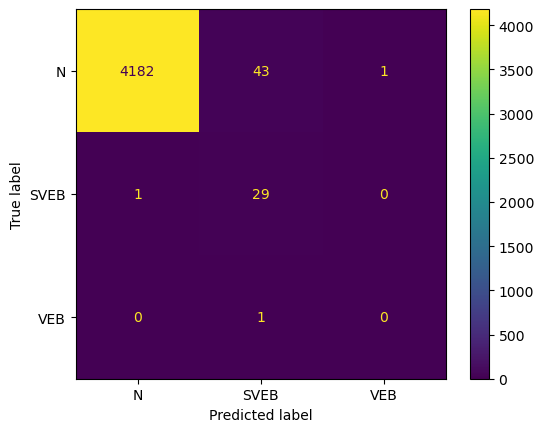

Fold 88:
  Test:  patient=87
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2058
         1.0       1.00      0.01      0.03        74
         2.0       0.02      0.50      0.04         6

    accuracy                           0.92      2138
   macro avg       0.67      0.49      0.34      2138
weighted avg       0.98      0.92      0.93      2138

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.984430   1.000000  0.020548  0.918616     0.668326   
recall        0.952381   0.013514  0.500000  0.918616     0.488631   
f1-score      0.968140   0.026667  0.039474  0.918616     0.344760   
support    2058.000000  74.000000  6.000000  0.918616  2138.000000   

           weighted avg  
precision      0.982264  
recall         0.918616  
f1-score       0.932948  
support     2138.000000  


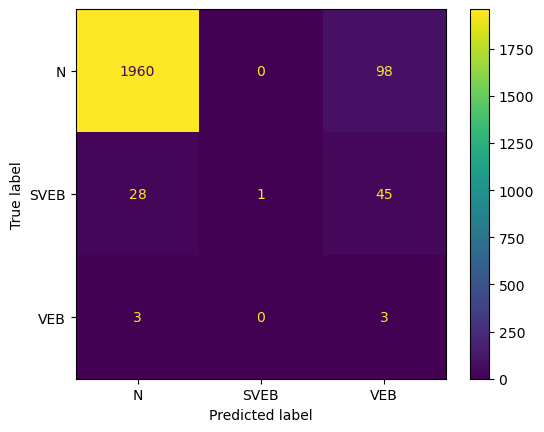

Fold 89:
  Test:  patient=88
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1829
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1836
   macro avg       0.33      0.33      0.33      1836
weighted avg       0.99      1.00      0.99      1836

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.996730  NaN  0.0  0.996187     0.332243      0.992930
recall        1.000000  0.0  NaN  0.996187     0.333333      0.996187
f1-score      0.998362  NaN  NaN  0.996187     0.332787      0.994556
support    1829.000000  7.0  0.0  0.996187  1836.000000   1836.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

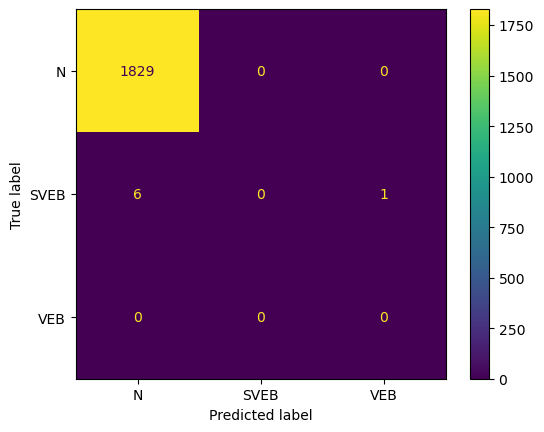

Fold 90:
  Test:  patient=89
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2167
         1.0       0.71      0.16      0.26        32
         2.0       0.87      0.84      0.86       427

    accuracy                           0.95      2626
   macro avg       0.85      0.66      0.69      2626
weighted avg       0.94      0.95      0.94      2626

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.959655   0.714286    0.871671  0.945164     0.848537   
recall        0.976927   0.156250    0.843091  0.945164     0.658756   
f1-score      0.968214   0.256410    0.857143  0.945164     0.693922   
support    2167.000000  32.000000  427.000000  0.945164  2626.000000   

           weighted avg  
precision      0.942359  
recall         0.945164  
f1-score       0.941479  
support     2626.000000  


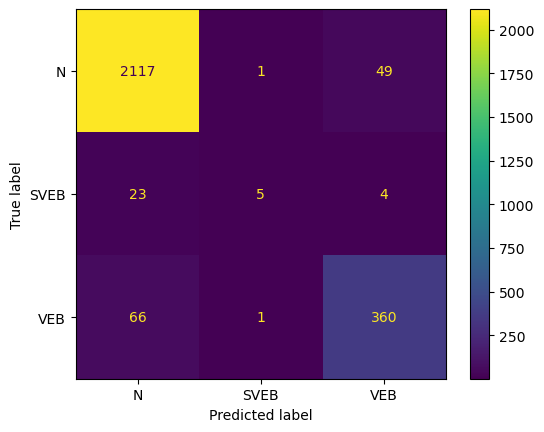

Fold 91:
  Test:  patient=90
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2332
         1.0       0.81      0.50      0.62       321
         2.0       0.06      0.33      0.10         9

    accuracy                           0.92      2662
   macro avg       0.61      0.61      0.56      2662
weighted avg       0.93      0.92      0.92      2662

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.951037    0.814070  0.056604   0.92299     0.607237   
recall        0.982847    0.504673  0.333333   0.92299     0.606951   
f1-score      0.966681    0.623077  0.096774   0.92299     0.562177   
support    2332.000000  321.000000  9.000000   0.92299  2662.000000   

           weighted avg  
precision      0.931497  
recall         0.922990  
f1-score       0.922306  
support     2662.000000  


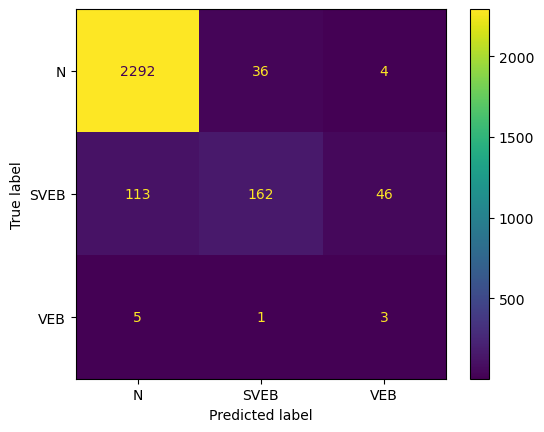

Fold 92:
  Test:  patient=91
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2105
         1.0       0.47      0.33      0.39        48
         2.0       0.45      0.97      0.61        64

    accuracy                           0.96      2217
   macro avg       0.64      0.76      0.66      2217
weighted avg       0.97      0.96      0.96      2217

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.999511   0.470588   0.449275  0.957149     0.639792   
recall        0.971021   0.333333   0.968750  0.957149     0.757702   
f1-score      0.985060   0.390244   0.613861  0.957149     0.663055   
support    2105.000000  48.000000  64.000000  0.957149  2217.000000   

           weighted avg  
precision      0.972175  
recall         0.957149  
f1-score       0.961466  
support     2217.000000  


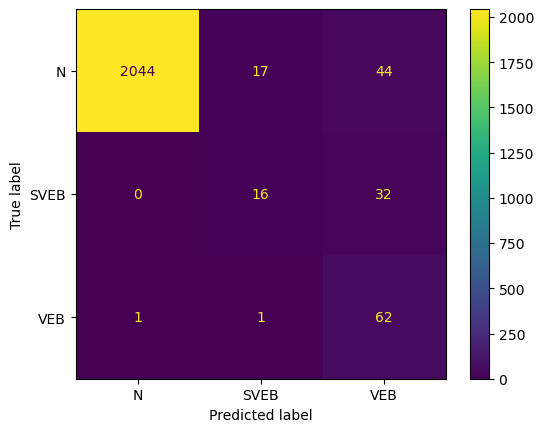

Fold 93:
  Test:  patient=92
              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81      1788
         1.0       0.49      0.18      0.26       460
         2.0       0.72      0.14      0.23       478

    accuracy                           0.68      2726
   macro avg       0.63      0.43      0.43      2726
weighted avg       0.66      0.68      0.61      2726

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.695087    0.488235    0.720430  0.683052     0.634584   
recall        0.957494    0.180435    0.140167  0.683052     0.426032   
f1-score      0.805458    0.263492    0.234676  0.683052     0.434542   
support    1788.000000  460.000000  478.000000  0.683052  2726.000000   

           weighted avg  
precision      0.664626  
recall         0.683052  
f1-score       0.613918  
support     2726.000000  


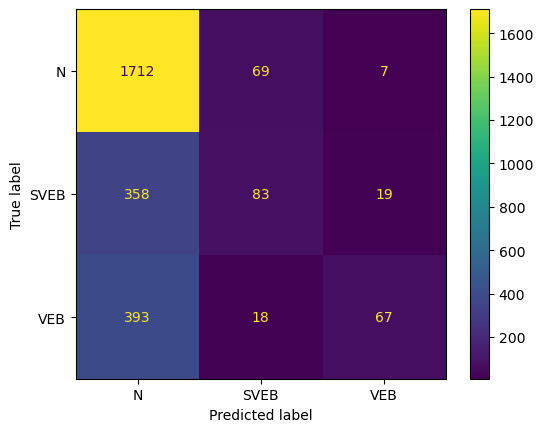

Fold 94:
  Test:  patient=93
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2034
         1.0       0.63      0.35      0.45       227
         2.0       1.00      0.79      0.88       276

    accuracy                           0.91      2537
   macro avg       0.85      0.71      0.76      2537
weighted avg       0.90      0.91      0.90      2537

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.912905    0.626984    1.000000  0.906188     0.846630   
recall        0.984267    0.348018    0.789855  0.906188     0.707380   
f1-score      0.947244    0.447592    0.882591  0.906188     0.759142   
support    2034.000000  227.000000  276.000000  0.906188  2537.000000   

           weighted avg  
precision      0.896797  
recall         0.906188  
f1-score       0.895504  
support     2537.000000  


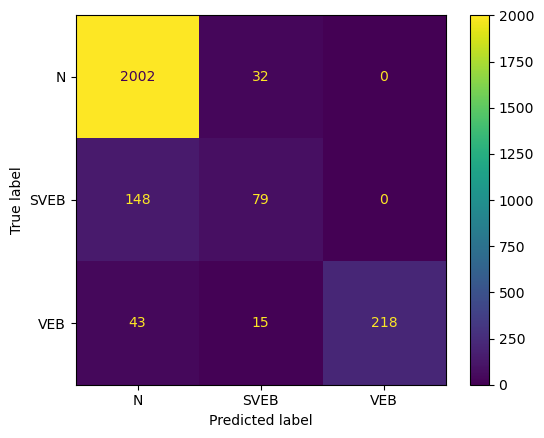

Fold 95:
  Test:  patient=94
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2810
         1.0       0.18      0.17      0.17        12
         2.0       0.96      0.89      0.93        28

    accuracy                           0.99      2850
   macro avg       0.71      0.69      0.70      2850
weighted avg       0.99      0.99      0.99      2850

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996090   0.181818   0.961538  0.992632     0.713149   
recall        0.997153   0.166667   0.892857  0.992632     0.685559   
f1-score      0.996621   0.173913   0.925926  0.992632     0.698820   
support    2810.000000  12.000000  28.000000  0.992632  2850.000000   

           weighted avg  
precision      0.992322  
recall         0.992632  
f1-score       0.992462  
support     2850.000000  


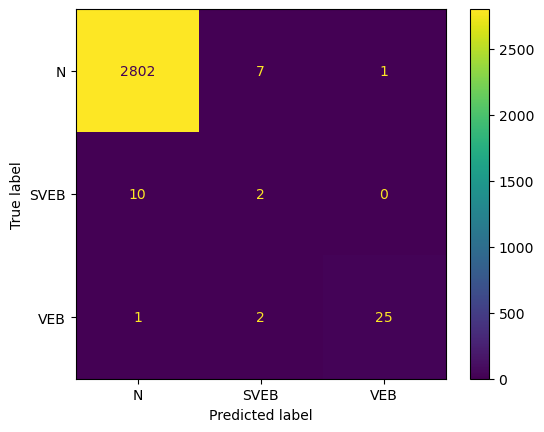

Fold 96:
  Test:  patient=95
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2400
         1.0       0.00      0.00      0.00        38
         2.0       0.52      0.82      0.63       144

    accuracy                           0.95      2582
   macro avg       0.50      0.60      0.54      2582
weighted avg       0.95      0.95      0.95      2582

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.992735   0.0    0.517544  0.945391     0.503426      0.951623
recall        0.967917   0.0    0.819444  0.945391     0.595787      0.945391
f1-score      0.980169   0.0    0.634409  0.945391     0.538192      0.946460
support    2400.000000  38.0  144.000000  0.945391  2582.000000   2582.000000


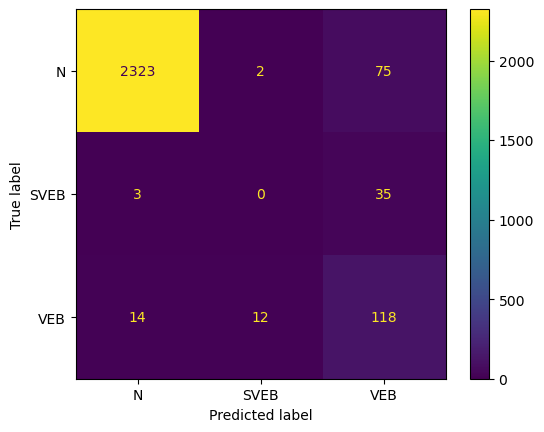

Fold 97:
  Test:  patient=96
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2167
         1.0       0.50      0.12      0.20         8
         2.0       0.12      0.67      0.20         3

    accuracy                           0.99      2178
   macro avg       0.54      0.60      0.47      2178
weighted avg       0.99      0.99      0.99      2178

                   0.0    1.0       2.0  accuracy    macro avg  weighted avg
precision     0.997684  0.500  0.117647  0.990358     0.538444      0.994644
recall        0.994001  0.125  0.666667  0.990358     0.595223      0.990358
f1-score      0.995839  0.200  0.200000  0.990358     0.465280      0.991820
support    2167.000000  8.000  3.000000  0.990358  2178.000000   2178.000000


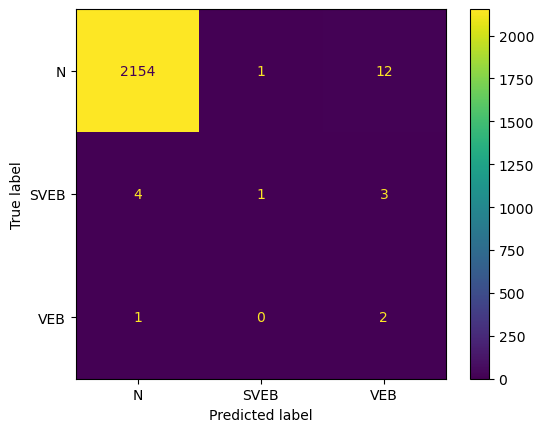

Fold 98:
  Test:  patient=97
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      3007
         1.0       0.16      0.29      0.20        69
         2.0       0.89      0.80      0.84       464

    accuracy                           0.93      3540
   macro avg       0.67      0.68      0.67      3540
weighted avg       0.94      0.93      0.93      3540

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.964298   0.157480    0.891827  0.926836     0.671202   
recall        0.961091   0.289855    0.799569  0.926836     0.683505   
f1-score      0.962692   0.204082    0.843182  0.926836     0.669985   
support    3007.000000  69.000000  464.000000  0.926836  3540.000000   

           weighted avg  
precision      0.939073  
recall         0.926836  
f1-score       0.932241  
support     3540.000000  


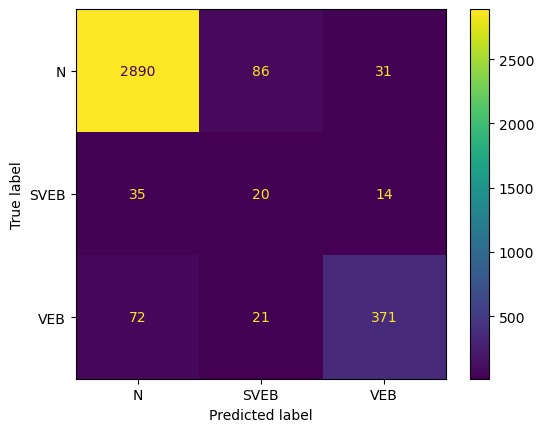

Fold 99:
  Test:  patient=98
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1672
         1.0       0.00      0.00      0.00        17
         2.0       1.00      0.86      0.92       727

    accuracy                           0.95      2416
   macro avg       0.66      0.62      0.64      2416
weighted avg       0.98      0.95      0.96      2416

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.981199   0.0    1.000000  0.949503     0.660400      0.979952
recall        0.998804   0.0    0.858322  0.949503     0.619042      0.949503
f1-score      0.989923   0.0    0.923760  0.949503     0.637894      0.963048
support    1672.000000  17.0  727.000000  0.949503  2416.000000   2416.000000


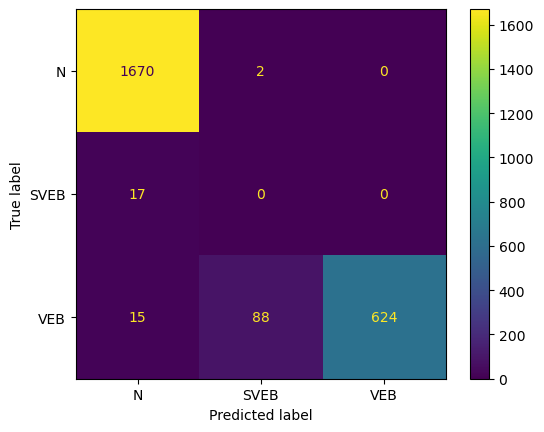

Fold 100:
  Test:  patient=99
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1873
         1.0       0.83      0.06      0.11       569
         2.0       0.05      0.89      0.10        27

    accuracy                           0.76      2469
   macro avg       0.60      0.64      0.39      2469
weighted avg       0.90      0.76      0.75      2469

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.925888    0.833333   0.052516  0.762657     0.603913   
recall        0.973839    0.061511   0.888889  0.762657     0.641413   
f1-score      0.949258    0.114566   0.099174  0.762657     0.387666   
support    1873.000000  569.000000  27.000000  0.762657  2469.000000   

           weighted avg  
precision      0.895007  
recall         0.762657  
f1-score       0.747601  
support     2469.000000  


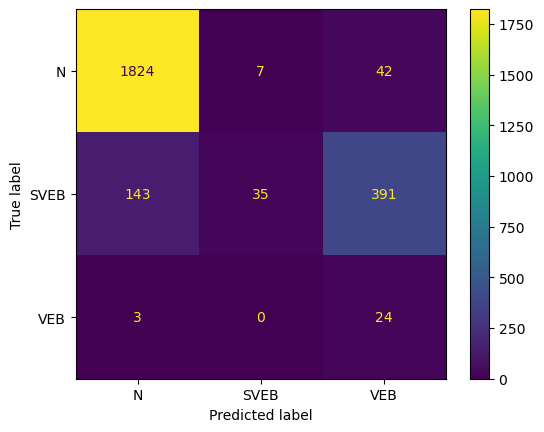

Fold 101:
  Test:  patient=100
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      2133
         1.0       0.00      0.00      0.00        26
         2.0       0.04      0.87      0.08        23

    accuracy                           0.79      2182
   macro avg       0.35      0.56      0.32      2182
weighted avg       0.97      0.79      0.87      2182

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.993027   0.0   0.043956  0.792392     0.345661      0.971191
recall        0.801219   0.0   0.869565  0.792392     0.556928      0.792392
f1-score      0.886871   0.0   0.083682  0.792392     0.323518      0.867837
support    2133.000000  26.0  23.000000  0.792392  2182.000000   2182.000000


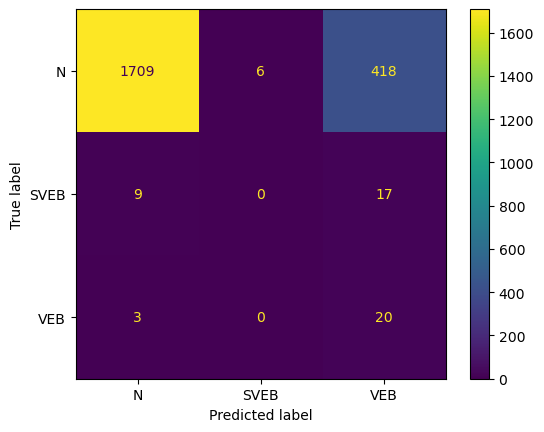

Fold 102:
  Test:  patient=101
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2560
         1.0       0.93      0.88      0.91       321
         2.0       1.00      0.86      0.93       240

    accuracy                           0.97      3121
   macro avg       0.97      0.91      0.94      3121
weighted avg       0.97      0.97      0.97      3121

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.978144    0.928105    1.000000  0.974688     0.968750   
recall        0.996484    0.884735    0.862500  0.974688     0.914573   
f1-score      0.987229    0.905901    0.926174  0.974688     0.939768   
support    2560.000000  321.000000  240.000000  0.974688  3121.000000   

           weighted avg  
precision      0.974678  
recall         0.974688  
f1-score       0.974169  
support     3121.000000  


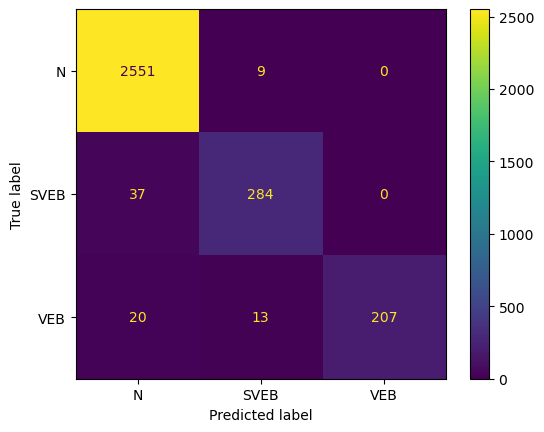

Fold 103:
  Test:  patient=102
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1742
         1.0       0.31      0.84      0.45        19
         2.0       1.00      0.58      0.74       132

    accuracy                           0.96      1893
   macro avg       0.76      0.81      0.72      1893
weighted avg       0.97      0.96      0.96      1893

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.979025   0.307692    1.000000  0.961437     0.762239   
recall        0.991389   0.842105    0.583333  0.961437     0.805609   
f1-score      0.985168   0.450704    0.736842  0.961437     0.724238   
support    1742.000000  19.000000  132.000000  0.961437  1893.000000   

           weighted avg  
precision      0.973749  
recall         0.961437  
f1-score       0.962488  
support     1893.000000  


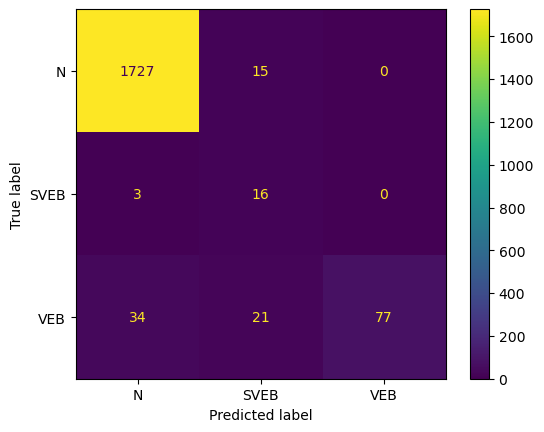

Fold 104:
  Test:  patient=103
              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54      1101
         1.0       0.43      0.00      0.00      1818
         2.0       0.97      0.78      0.87       234

    accuracy                           0.41      3153
   macro avg       0.59      0.59      0.47      3153
weighted avg       0.45      0.41      0.25      3153

                   0.0          1.0         2.0  accuracy    macro avg  \
precision     0.370521     0.428571    0.973404  0.406597     0.590832   
recall        0.995459     0.001650    0.782051  0.406597     0.593053   
f1-score      0.540034     0.003288    0.867299  0.406597     0.470207   
support    1101.000000  1818.000000  234.000000  0.406597  3153.000000   

           weighted avg  
precision      0.448735  
recall         0.406597  
f1-score       0.254838  
support     3153.000000  


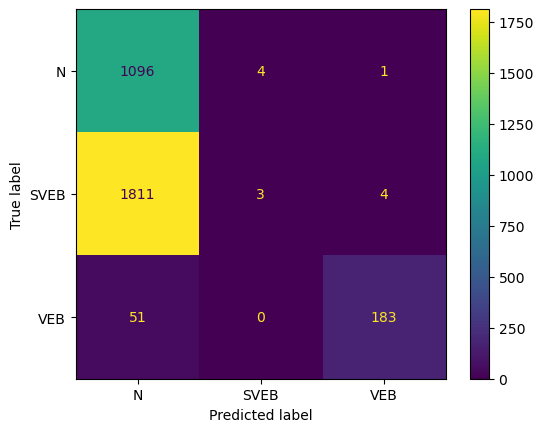

Fold 105:
  Test:  patient=104
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      2050
         1.0       0.13      0.14      0.13       167
         2.0       0.82      0.11      0.19       447

    accuracy                           0.76      2664
   macro avg       0.58      0.40      0.40      2664
weighted avg       0.77      0.76      0.71      2664

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.808757    0.125683    0.816667  0.762012     0.583702   
recall        0.955122    0.137725    0.109620  0.762012     0.400822   
f1-score      0.875867    0.131429    0.193294  0.762012     0.400196   
support    2050.000000  167.000000  447.000000  0.762012  2664.000000   

           weighted avg  
precision      0.767264  
recall         0.762012  
f1-score       0.714669  
support     2664.000000  


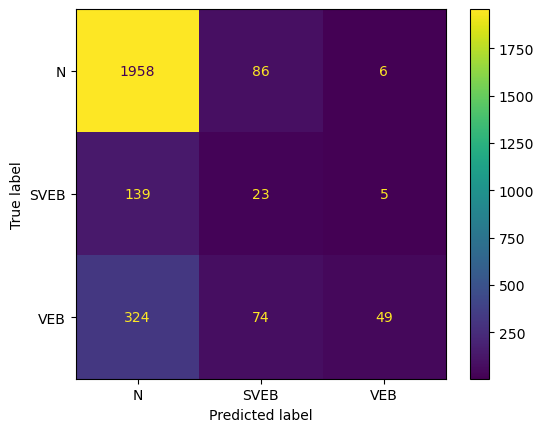

Fold 106:
  Test:  patient=105
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2787
         1.0       0.36      0.07      0.12       136
         2.0       0.00      0.00      0.00        75

    accuracy                           0.93      2998
   macro avg       0.43      0.36      0.36      2998
weighted avg       0.88      0.93      0.90      2998

                   0.0         1.0   2.0  accuracy    macro avg  weighted avg
precision     0.933940    0.357143   0.0  0.927618     0.430361      0.884410
recall        0.994259    0.073529   0.0  0.927618     0.355929      0.927618
f1-score      0.963156    0.121951   0.0  0.927618     0.361702      0.900901
support    2787.000000  136.000000  75.0  0.927618  2998.000000   2998.000000


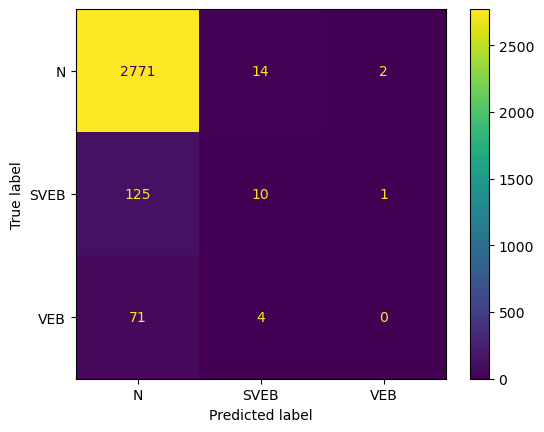

Fold 107:
  Test:  patient=106
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2552
         1.0       0.12      0.11      0.11       227
         2.0       0.35      0.34      0.34       555

    accuracy                           0.76      3334
   macro avg       0.45      0.45      0.45      3334
weighted avg       0.75      0.76      0.75      3334

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.890643    0.118812    0.347664  0.756749     0.452373   
recall        0.906348    0.105727    0.335135  0.756749     0.449070   
f1-score      0.898427    0.111888    0.341284  0.756749     0.450533   
support    2552.000000  227.000000  555.000000  0.756749  3334.000000   

           weighted avg  
precision      0.747704  
recall         0.756749  
f1-score       0.752129  
support     3334.000000  


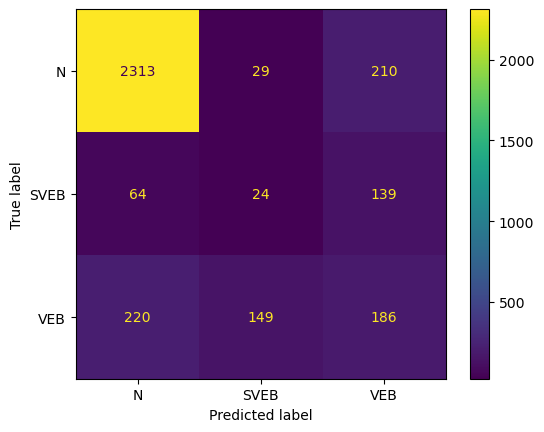

Fold 108:
  Test:  patient=107
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1506
         1.0       1.00      0.51      0.67       631
         2.0       0.28      0.95      0.44        22

    accuracy                           0.86      2159
   macro avg       0.71      0.82      0.68      2159
weighted avg       0.89      0.86      0.84      2159

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.853175    0.996885   0.283784  0.855025     0.711281   
recall        0.999336    0.507132   0.954545  0.855025     0.820338   
f1-score      0.920489    0.672269   0.437500  0.855025     0.676753   
support    1506.000000  631.000000  22.000000  0.855025  2159.000000   

           weighted avg  
precision      0.889374  
recall         0.855025  
f1-score       0.843022  
support     2159.000000  


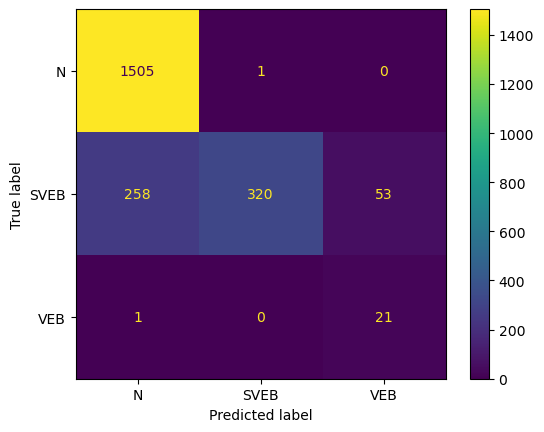

Fold 109:
  Test:  patient=108
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87      1785
         1.0       0.82      0.19      0.30       454
         2.0       0.89      0.49      0.63       437

    accuracy                           0.78      2676
   macro avg       0.82      0.56      0.60      2676
weighted avg       0.79      0.78      0.73      2676

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.764378    0.823529    0.885246  0.777653     0.824384   
recall        0.997759    0.185022    0.494279  0.777653     0.559020   
f1-score      0.865614    0.302158    0.634361  0.777653     0.600711   
support    1785.000000  454.000000  437.000000  0.777653  2676.000000   

           weighted avg  
precision      0.794151  
recall         0.777653  
f1-score       0.732256  
support     2676.000000  


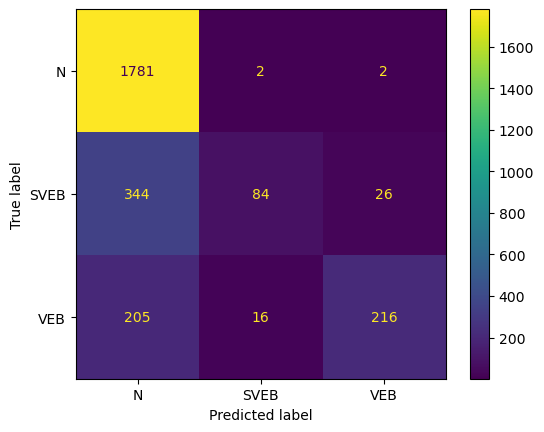

Fold 110:
  Test:  patient=109
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1774
         1.0       0.57      0.67      0.62        12
         2.0       0.57      1.00      0.73         8

    accuracy                           0.99      1794
   macro avg       0.71      0.89      0.78      1794
weighted avg       0.99      0.99      0.99      1794

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.998867   0.571429  0.571429  0.992196     0.713908   
recall        0.994363   0.666667  1.000000  0.992196     0.887010   
f1-score      0.996610   0.615385  0.727273  0.992196     0.779756   
support    1774.000000  12.000000  8.000000  0.992196  1794.000000   

           weighted avg  
precision      0.994102  
recall         0.992196  
f1-score       0.992859  
support     1794.000000  


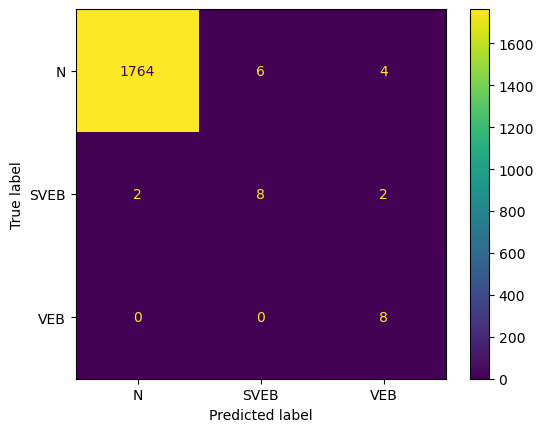

Fold 111:
  Test:  patient=110
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1896
         1.0       0.47      1.00      0.64         9
         2.0       1.00      0.93      0.97        74

    accuracy                           0.99      1979
   macro avg       0.82      0.98      0.87      1979
weighted avg       1.00      0.99      1.00      1979

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     1.000000  0.473684   1.000000  0.994947     0.824561   
recall        0.997363  1.000000   0.932432  0.994947     0.976598   
f1-score      0.998680  0.642857   0.965035  0.994947     0.868857   
support    1896.000000  9.000000  74.000000  0.994947  1979.000000   

           weighted avg  
precision      0.997606  
recall         0.994947  
f1-score       0.995803  
support     1979.000000  


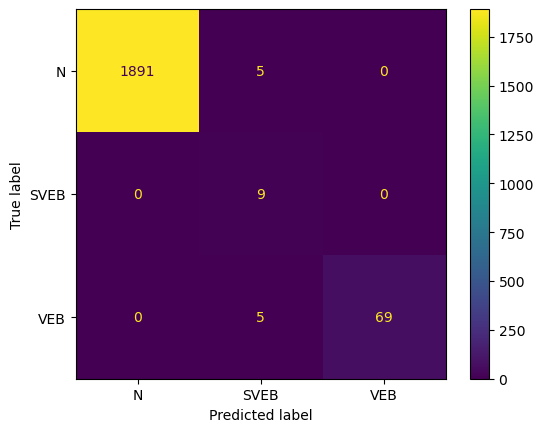

Fold 112:
  Test:  patient=111
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1624
         1.0       0.82      0.93      0.87        15
         2.0       0.00      0.00      0.00        26

    accuracy                           0.98      1665
   macro avg       0.60      0.64      0.62      1665
weighted avg       0.97      0.98      0.97      1665

                   0.0        1.0   2.0  accuracy    macro avg  weighted avg
precision     0.984214   0.823529   0.0  0.981982     0.602581      0.967397
recall        0.998153   0.933333   0.0  0.981982     0.643829      0.981982
f1-score      0.991134   0.875000   0.0  0.981982     0.622045      0.974611
support    1624.000000  15.000000  26.0  0.981982  1665.000000   1665.000000


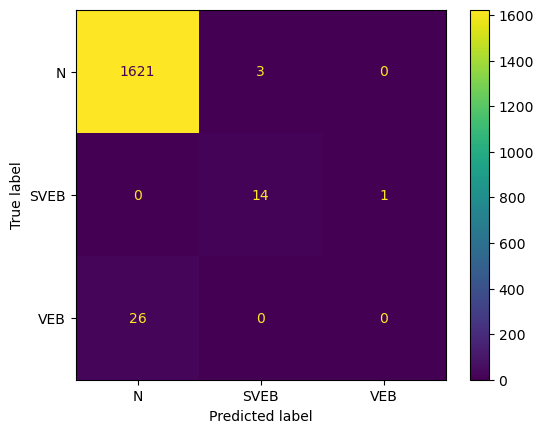

Fold 113:
  Test:  patient=112
              precision    recall  f1-score   support

         0.0       1.00      0.19      0.31      2188
         1.0       0.00      0.00      0.00         9
         2.0       0.02      0.98      0.04        41

    accuracy                           0.20      2238
   macro avg       0.34      0.39      0.12      2238
weighted avg       0.98      0.20      0.31      2238

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.021846  0.199285     0.340615      0.978059
recall        0.185558  0.0   0.975610  0.199285     0.387056      0.199285
f1-score      0.313030  0.0   0.042735  0.199285     0.118588      0.306819
support    2188.000000  9.0  41.000000  0.199285  2238.000000   2238.000000


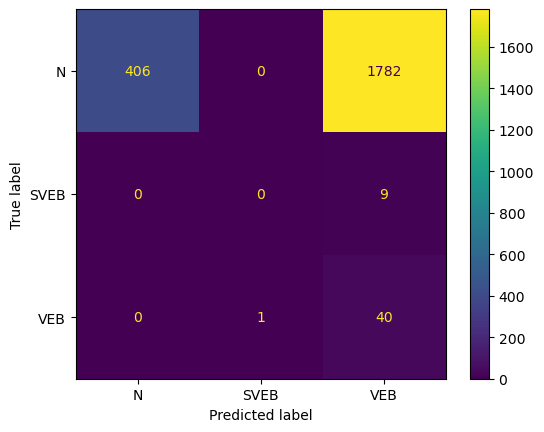

Fold 114:
  Test:  patient=113
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1944
         1.0       0.00      0.00      0.00         8
         2.0       0.94      0.98      0.96        97

    accuracy                           1.00      2049
   macro avg       0.65      0.66      0.65      2049
weighted avg       0.99      1.00      0.99      2049

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.997947  NaN   0.940594   0.99512     0.646180      0.991335
recall        1.000000  0.0   0.979381   0.99512     0.659794      0.995120
f1-score      0.998972  NaN   0.959596   0.99512     0.652856      0.993208
support    1944.000000  8.0  97.000000   0.99512  2049.000000   2049.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

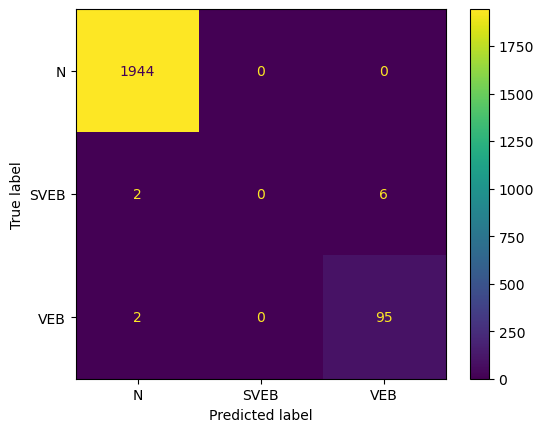

Fold 115:
  Test:  patient=114
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2004
         1.0       0.54      0.63      0.58       135
         2.0       0.00      0.00      0.00         0

    accuracy                           0.94      2139
   macro avg       0.51      0.53      0.52      2139
weighted avg       0.95      0.94      0.95      2139

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.977722    0.544872  0.0  0.942496     0.507531      0.950403
recall        0.963573    0.629630  NaN  0.942496     0.531067      0.942496
f1-score      0.970596    0.584192  NaN  0.942496     0.518263      0.946208
support    2004.000000  135.000000  0.0  0.942496  2139.000000   2139.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

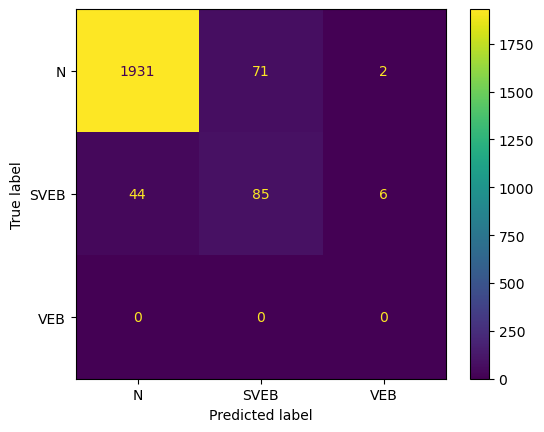

Fold 116:
  Test:  patient=115
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1839
         1.0       0.85      0.78      0.82       196
         2.0       0.00      0.00      0.00         1

    accuracy                           0.97      2036
   macro avg       0.61      0.59      0.60      2036
weighted avg       0.97      0.97      0.97      2036

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.977371    0.854749  0.0   0.96611     0.610706      0.965086
recall        0.986406    0.780612  0.0   0.96611     0.589006      0.966110
f1-score      0.981867    0.816000  0.0   0.96611     0.599289      0.965418
support    1839.000000  196.000000  1.0   0.96611  2036.000000   2036.000000


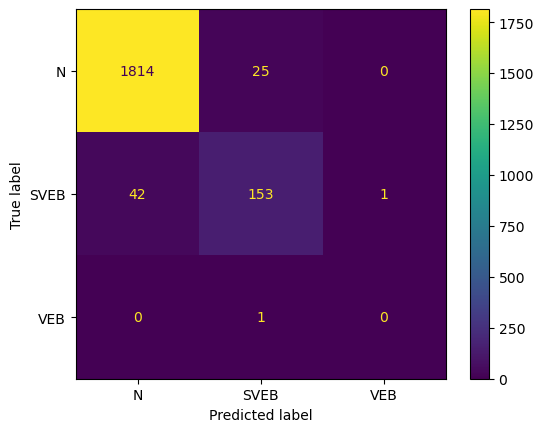

Fold 117:
  Test:  patient=116
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1589
         1.0       0.89      0.53      0.67        64
         2.0       0.98      1.00      0.99       256

    accuracy                           0.98      1909
   macro avg       0.95      0.84      0.88      1909
weighted avg       0.98      0.98      0.98      1909

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.982630   0.894737    0.984556  0.981142     0.953974   
recall        0.996853   0.531250    0.996094  0.981142     0.841399   
f1-score      0.989691   0.666667    0.990291  0.981142     0.882216   
support    1589.000000  64.000000  256.000000  0.981142  1909.000000   

           weighted avg  
precision      0.979942  
recall         0.981142  
f1-score       0.978942  
support     1909.000000  


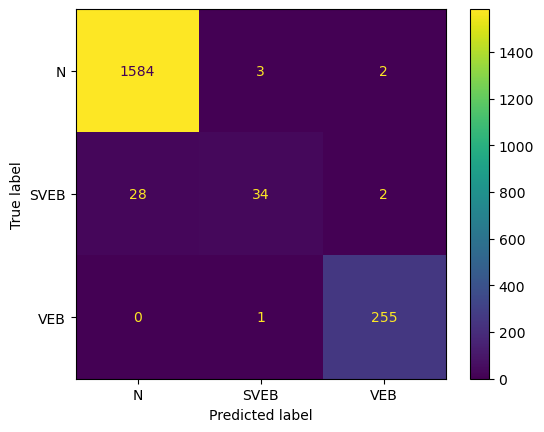

Fold 118:
  Test:  patient=117
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1470
         1.0       0.31      0.56      0.40        48
         2.0       1.00      0.86      0.92       542

    accuracy                           0.95      2060
   macro avg       0.76      0.81      0.77      2060
weighted avg       0.96      0.95      0.95      2060

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.970764   0.310345    0.995726  0.948544     0.758945   
recall        0.993878   0.562500    0.859779  0.948544     0.805385   
f1-score      0.982185   0.400000    0.922772  0.948544     0.768319   
support    1470.000000  48.000000  542.000000  0.948544  2060.000000   

           weighted avg  
precision      0.961943  
recall         0.948544  
f1-score       0.952988  
support     2060.000000  


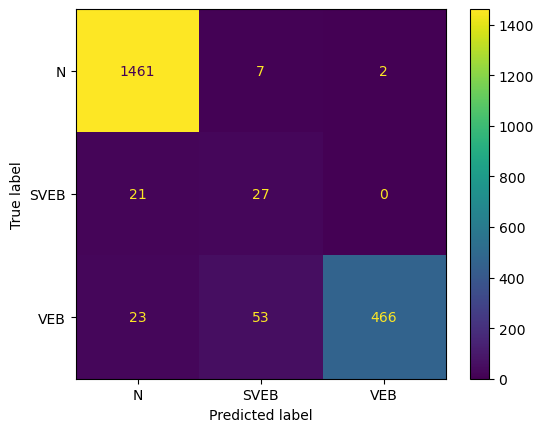

Fold 119:
  Test:  patient=118
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3103
         1.0       0.60      0.24      0.35       241
         2.0       0.32      0.79      0.46       141

    accuracy                           0.92      3485
   macro avg       0.64      0.67      0.60      3485
weighted avg       0.94      0.92      0.92      3485

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.996706    0.595960    0.320000   0.91736     0.637555   
recall        0.975185    0.244813    0.794326   0.91736     0.671442   
f1-score      0.985828    0.347059    0.456212   0.91736     0.596366   
support    3103.000000  241.000000  141.000000   0.91736  3485.000000   

           weighted avg  
precision      0.941614  
recall         0.917360  
f1-score       0.920227  
support     3485.000000  


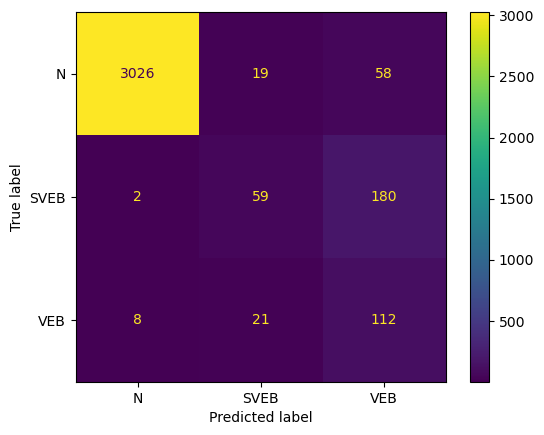

Fold 120:
  Test:  patient=119
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82      1323
         1.0       0.85      0.40      0.54       628
         2.0       0.94      0.31      0.47       307

    accuracy                           0.73      2258
   macro avg       0.83      0.57      0.61      2258
weighted avg       0.78      0.73      0.70      2258

                   0.0         1.0         2.0  accuracy   macro avg  \
precision     0.704301    0.847973    0.941176  0.733835     0.83115   
recall        0.990174    0.399682    0.312704  0.733835     0.56752   
f1-score      0.823123    0.543290    0.469438  0.733835     0.61195   
support    1323.000000  628.000000  307.000000  0.733835  2258.00000   

           weighted avg  
precision      0.776465  
recall         0.733835  
f1-score       0.697208  
support     2258.000000  


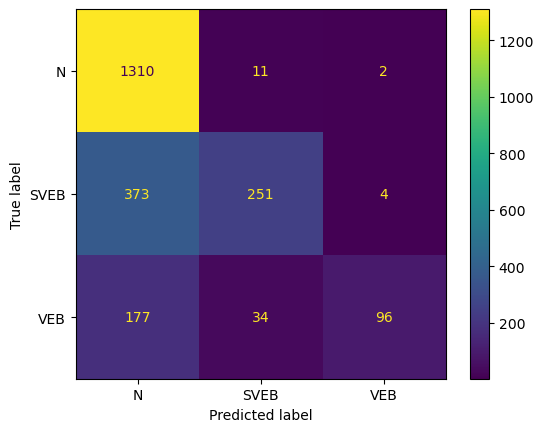

Fold 121:
  Test:  patient=120
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1887
         1.0       1.00      0.51      0.68        41
         2.0       0.20      1.00      0.33         5

    accuracy                           0.99      1933
   macro avg       0.73      0.84      0.67      1933
weighted avg       1.00      0.99      0.99      1933

              0.0        1.0       2.0  accuracy    macro avg  weighted avg
precision     1.0   1.000000  0.200000  0.989653     0.733333      0.997931
recall        1.0   0.512195  1.000000  0.989653     0.837398      0.989653
f1-score      1.0   0.677419  0.333333  0.989653     0.670251      0.991433
support    1887.0  41.000000  5.000000  0.989653  1933.000000   1933.000000


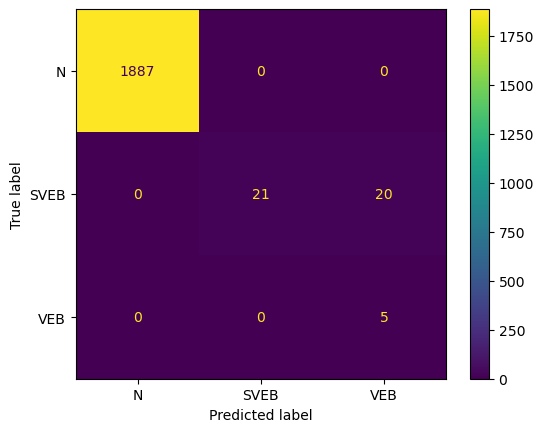

Fold 122:
  Test:  patient=121
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1771
         1.0       0.97      0.70      0.81        40
         2.0       0.37      1.00      0.54         7

    accuracy                           0.99      1818
   macro avg       0.78      0.90      0.78      1818
weighted avg       1.00      0.99      0.99      1818

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.965517  0.368421  0.992849     0.777979   
recall        0.999435   0.700000  1.000000  0.992849     0.899812   
f1-score      0.999718   0.811594  0.538462  0.992849     0.783258   
support    1771.000000  40.000000  7.000000  0.992849  1818.000000   

           weighted avg  
precision      0.996809  
recall         0.992849  
f1-score       0.993802  
support     1818.000000  


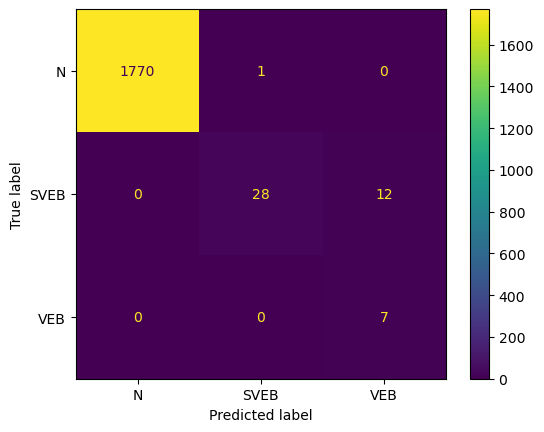

Fold 123:
  Test:  patient=122
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2484
         1.0       0.49      0.49      0.49        53
         2.0       0.86      0.89      0.87       343

    accuracy                           0.95      2880
   macro avg       0.78      0.78      0.78      2880
weighted avg       0.95      0.95      0.95      2880

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.974939   0.490566    0.861190  0.952083     0.775565   
recall        0.971014   0.490566    0.886297  0.952083     0.782626   
f1-score      0.972973   0.490566    0.873563  0.952083     0.779034   
support    2484.000000  53.000000  343.000000  0.952083  2880.000000   

           weighted avg  
precision      0.952478  
recall         0.952083  
f1-score       0.952256  
support     2880.000000  


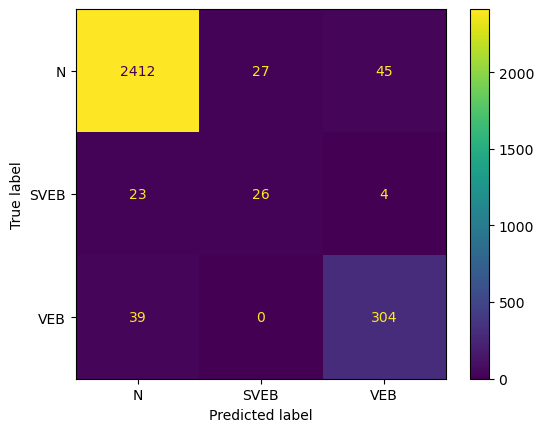

Fold 124:
  Test:  patient=123
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      1505
         1.0       0.93      0.39      0.55       399
         2.0       0.95      0.70      0.81        54

    accuracy                           0.86      1958
   macro avg       0.91      0.70      0.76      1958
weighted avg       0.87      0.86      0.84      1958

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.856489    0.928994   0.950000  0.864658     0.911828   
recall        0.995349    0.393484   0.703704  0.864658     0.697512   
f1-score      0.920713    0.552817   0.808511  0.864658     0.760680   
support    1505.000000  399.000000  54.000000  0.864658  1958.000000   

           weighted avg  
precision      0.873843  
recall         0.864658  
f1-score       0.842649  
support     1958.000000  


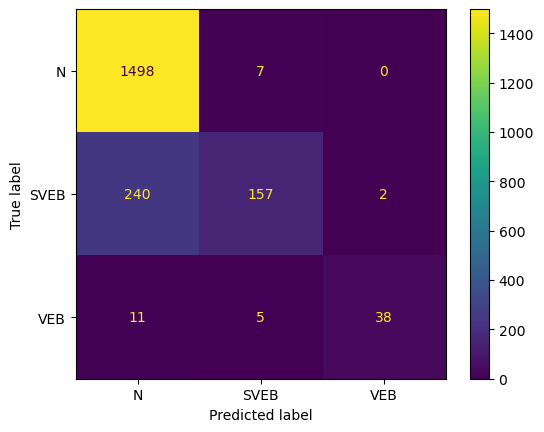

Fold 125:
  Test:  patient=124
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2168
         1.0       0.00      0.00      0.00        26
         2.0       0.33      0.89      0.48        27

    accuracy                           0.98      2221
   macro avg       0.44      0.63      0.49      2221
weighted avg       0.98      0.98      0.98      2221

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999534   0.0   0.328767  0.976587     0.442767      0.979679
recall        0.989391   0.0   0.888889  0.976587     0.626093      0.976587
f1-score      0.994437   0.0   0.480000  0.976587     0.491479      0.976542
support    2168.000000  26.0  27.000000  0.976587  2221.000000   2221.000000


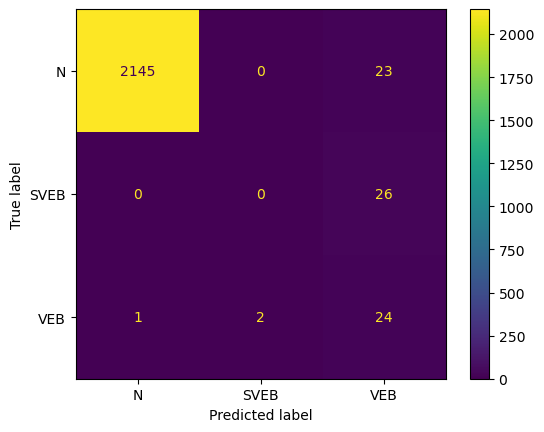

Fold 126:
  Test:  patient=125
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2352
         1.0       0.65      0.83      0.73       125
         2.0       0.99      0.57      0.73       210

    accuracy                           0.95      2687
   macro avg       0.87      0.80      0.81      2687
weighted avg       0.95      0.95      0.94      2687

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.964657    0.645963    0.991736  0.946781     0.867452   
recall        0.986395    0.832000    0.571429  0.946781     0.796608   
f1-score      0.975405    0.727273    0.725076  0.946781     0.809251   
support    2352.000000  125.000000  210.000000  0.946781  2687.000000   

           weighted avg  
precision      0.951948  
recall         0.946781  
f1-score       0.944297  
support     2687.000000  


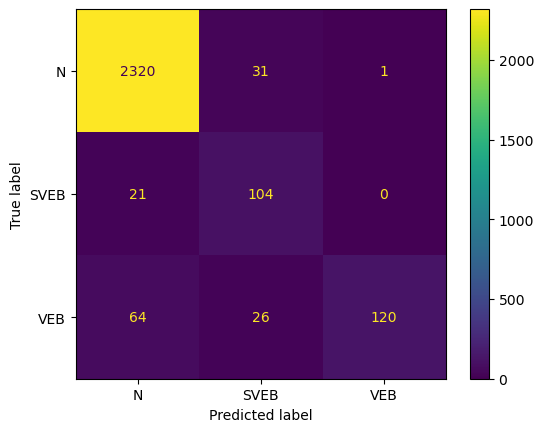

Fold 127:
  Test:  patient=126
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2189
         1.0       0.76      1.00      0.87        68
         2.0       1.00      0.41      0.58        54

    accuracy                           0.98      2311
   macro avg       0.92      0.80      0.81      2311
weighted avg       0.98      0.98      0.98      2311

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991364   0.764045   1.000000  0.982691     0.918470   
recall        0.996345   1.000000   0.407407  0.982691     0.801251   
f1-score      0.993848   0.866242   0.578947  0.982691     0.813013   
support    2189.000000  68.000000  54.000000  0.982691  2311.000000   

           weighted avg  
precision      0.984877  
recall         0.982691  
f1-score       0.980399  
support     2311.000000  


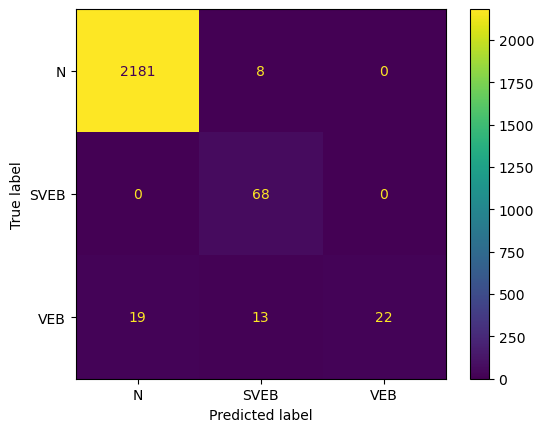

Fold 128:
  Test:  patient=127
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1464
         1.0       0.92      0.48      0.63       152
         2.0       0.97      0.92      0.94        91

    accuracy                           0.95      1707
   macro avg       0.95      0.80      0.85      1707
weighted avg       0.95      0.95      0.94      1707

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.948735    0.924051   0.965517  0.948448     0.946101   
recall        0.998634    0.480263   0.923077  0.948448     0.800658   
f1-score      0.973045    0.632035   0.943820  0.948448     0.849633   
support    1464.000000  152.000000  91.000000  0.948448  1707.000000   

           weighted avg  
precision      0.947431  
recall         0.948448  
f1-score       0.941122  
support     1707.000000  


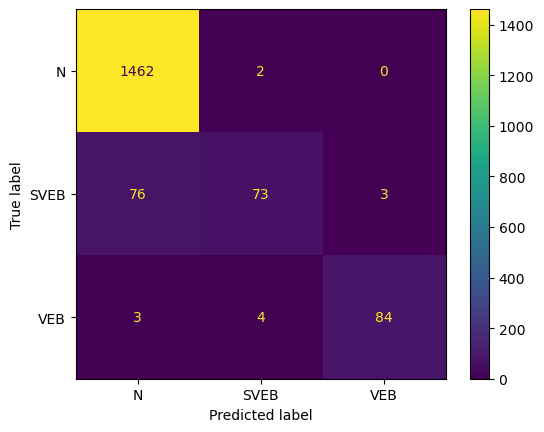

Fold 129:
  Test:  patient=128
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2001
         1.0       1.00      0.01      0.03        74
         2.0       0.67      0.66      0.66        97

    accuracy                           0.94      2172
   macro avg       0.87      0.56      0.55      2172
weighted avg       0.95      0.94      0.93      2172

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.956627   1.000000   0.666667  0.943831     0.874431   
recall        0.992004   0.013514   0.659794  0.943831     0.555104   
f1-score      0.973994   0.026667   0.663212  0.943831     0.554624   
support    2001.000000  74.000000  97.000000  0.943831  2172.000000   

           weighted avg  
precision      0.945155  
recall         0.943831  
f1-score       0.927839  
support     2172.000000  


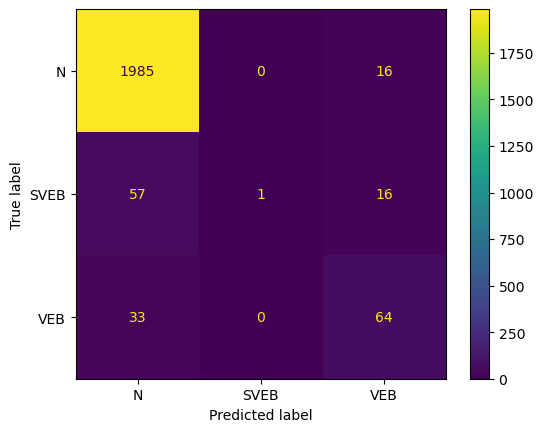

Fold 130:
  Test:  patient=129
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2120
         1.0       0.95      0.48      0.64       277
         2.0       0.46      0.70      0.56       207

    accuracy                           0.91      2604
   macro avg       0.79      0.72      0.72      2604
weighted avg       0.93      0.91      0.91      2604

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.967007    0.950355    0.463023  0.905914     0.793462   
recall        0.981604    0.483755    0.695652  0.905914     0.720337   
f1-score      0.974251    0.641148    0.555985  0.905914     0.723795   
support    2120.000000  277.000000  207.000000  0.905914  2604.000000   

           weighted avg  
precision      0.925173  
recall         0.905914  
f1-score       0.905568  
support     2604.000000  


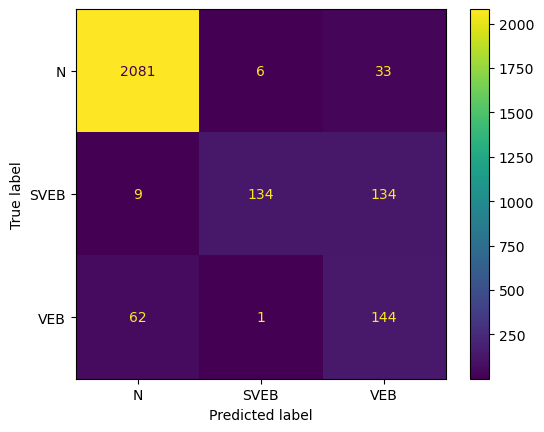

Fold 131:
  Test:  patient=130
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      1740
         1.0       0.93      0.44      0.59       523
         2.0       0.91      0.72      0.80       577

    accuracy                           0.84      2840
   macro avg       0.88      0.72      0.76      2840
weighted avg       0.85      0.84      0.82      2840

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.809435    0.930612    0.911894  0.836268     0.883980   
recall        0.995977    0.435946    0.717504  0.836268     0.716476   
f1-score      0.893069    0.593750    0.803104  0.836268     0.763308   
support    1740.000000  523.000000  577.000000  0.836268  2840.000000   

           weighted avg  
precision      0.852567  
recall         0.836268  
f1-score       0.819670  
support     2840.000000  


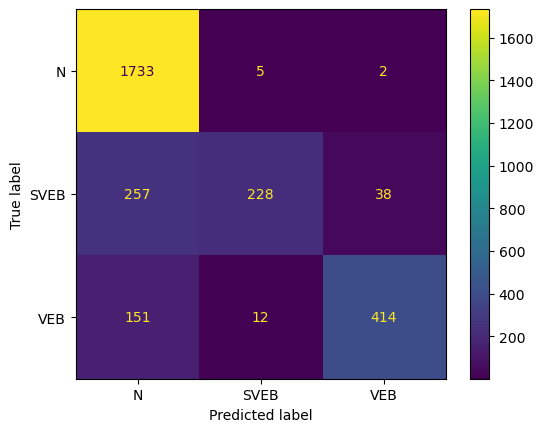

Fold 132:
  Test:  patient=131


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2188
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.87      0.93       338

    accuracy                           0.95      2526
   macro avg       0.66      0.61      0.63      2526
weighted avg       0.99      0.95      0.97      2526

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.984536  0.0    0.996622  0.948535     0.660386      0.986153
recall        0.960238  NaN    0.872781  0.948535     0.611006      0.948535
f1-score      0.972235  NaN    0.930599  0.948535     0.634278      0.966664
support    2188.000000  0.0  338.000000  0.948535  2526.000000   2526.000000


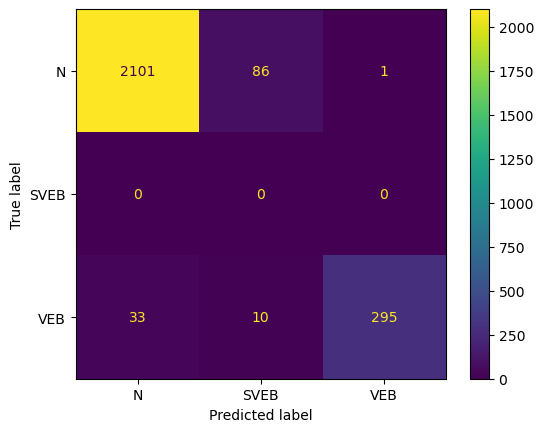

Fold 133:
  Test:  patient=132
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2211
         1.0       0.43      0.04      0.07        80
         2.0       0.34      0.98      0.50        53

    accuracy                           0.95      2344
   macro avg       0.59      0.67      0.52      2344
weighted avg       0.96      0.95      0.94      2344

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991758   0.428571   0.339869  0.947526     0.586733   
recall        0.979647   0.037500   0.981132  0.947526     0.666093   
f1-score      0.985666   0.068966   0.504854  0.947526     0.519828   
support    2211.000000  80.000000  53.000000  0.947526  2344.000000   

           weighted avg  
precision      0.957797  
recall         0.947526  
f1-score       0.943507  
support     2344.000000  


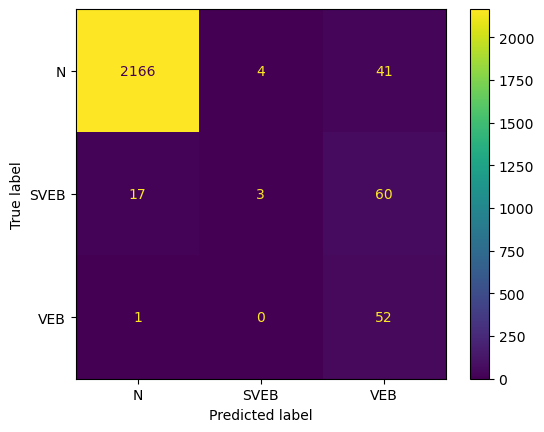

Fold 134:
  Test:  patient=133
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2411
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      1.00       344

    accuracy                           1.00      2755
   macro avg       0.67      0.66      0.67      2755
weighted avg       1.00      1.00      1.00      2755

              0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.0  0.0    1.000000  0.999274     0.666667      1.000000
recall        1.0  NaN    0.994186  0.999274     0.664729      0.999274
f1-score      1.0  NaN    0.997085  0.999274     0.665695      0.999636
support    2411.0  0.0  344.000000  0.999274  2755.000000   2755.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

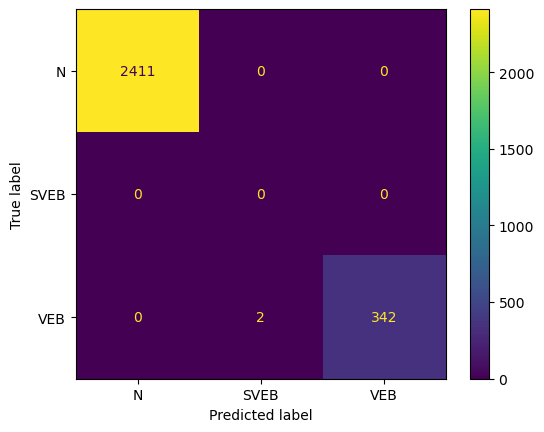

Fold 135:
  Test:  patient=134
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2443
         2.0       0.82      0.95      0.88       229

    accuracy                           0.98      2672
   macro avg       0.91      0.96      0.93      2672
weighted avg       0.98      0.98      0.98      2672

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.995015    0.818868  0.977545     0.906941      0.979918
recall        0.980352    0.947598  0.977545     0.963975      0.977545
f1-score      0.987629    0.878543  0.977545     0.933086      0.978280
support    2443.000000  229.000000  0.977545  2672.000000   2672.000000


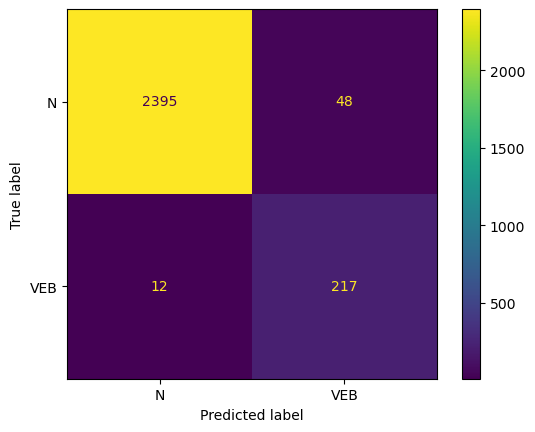

Fold 136:
  Test:  patient=135
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2323
         1.0       0.50      0.50      0.50         2
         2.0       1.00      0.97      0.98       125

    accuracy                           1.00      2450
   macro avg       0.83      0.82      0.83      2450
weighted avg       1.00      1.00      1.00      2450

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998281  0.5    1.00000  0.997959     0.832760      0.997962
recall        1.000000  0.5    0.96800  0.997959     0.822667      0.997959
f1-score      0.999140  0.5    0.98374  0.997959     0.827627      0.997947
support    2323.000000  2.0  125.00000  0.997959  2450.000000   2450.000000


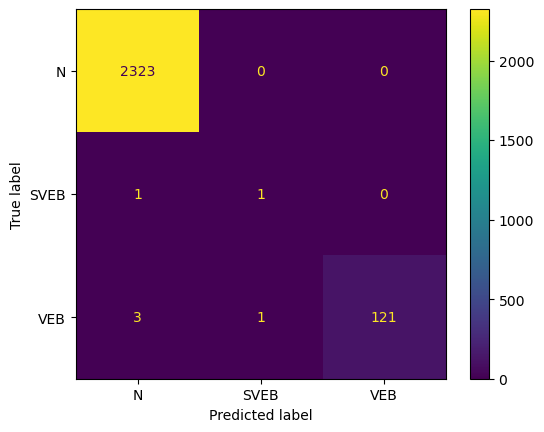

Fold 137:
  Test:  patient=136
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2268
         1.0       0.00      0.00      0.00        16
         2.0       0.98      0.35      0.51       121

    accuracy                           0.96      2405
   macro avg       0.65      0.45      0.50      2405
weighted avg       0.95      0.96      0.95      2405

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.960203   NaN    0.976744  0.960499     0.645649      0.954647
recall        1.000000   0.0    0.347107  0.960499     0.449036      0.960499
f1-score      0.979698   NaN    0.512195  0.960499     0.497298      0.949659
support    2268.000000  16.0  121.000000  0.960499  2405.000000   2405.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

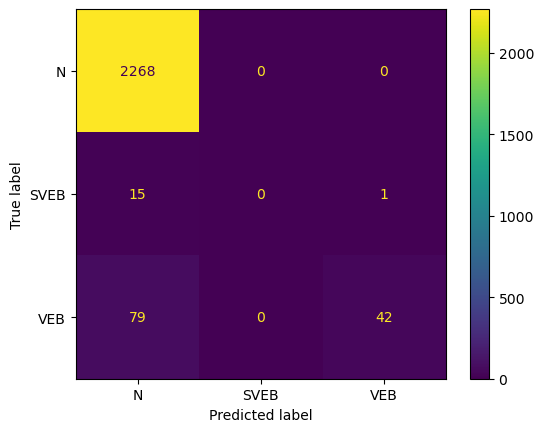

Fold 138:
  Test:  patient=137
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1518
         2.0       0.98      0.72      0.83       247

    accuracy                           0.96      1765
   macro avg       0.97      0.86      0.91      1765
weighted avg       0.96      0.96      0.96      1765

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.957044    0.983516  0.959773     0.970280      0.960748
recall        0.998024    0.724696  0.959773     0.861360      0.959773
f1-score      0.977104    0.834499  0.959773     0.905801      0.957147
support    1518.000000  247.000000  0.959773  1765.000000   1765.000000


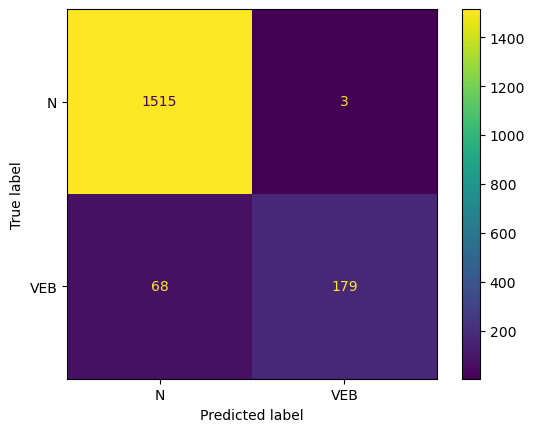

Fold 139:
  Test:  patient=138
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2434
         1.0       0.74      0.77      0.76        48
         2.0       0.45      1.00      0.62         9

    accuracy                           0.99      2491
   macro avg       0.73      0.92      0.79      2491
weighted avg       0.99      0.99      0.99      2491

                   0.0        1.0      2.0  accuracy    macro avg  \
precision     0.999174   0.740000  0.45000  0.989562     0.729725   
recall        0.993837   0.770833  1.00000  0.989562     0.921557   
f1-score      0.996498   0.755102  0.62069  0.989562     0.790763   
support    2434.000000  48.000000  9.00000  0.989562  2491.000000   

           weighted avg  
precision      0.992196  
recall         0.989562  
f1-score       0.990489  
support     2491.000000  


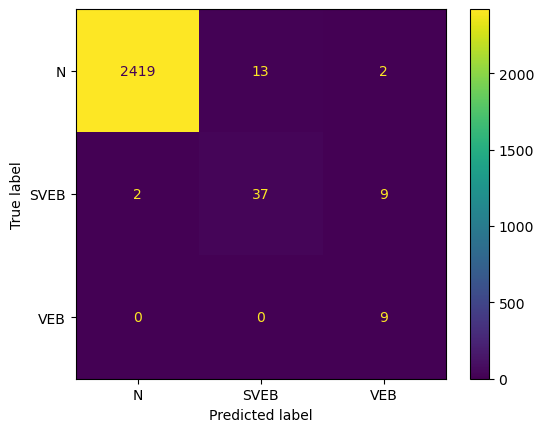

Fold 140:
  Test:  patient=139
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2638
         1.0       0.96      0.68      0.79        65
         2.0       0.07      1.00      0.12         1

    accuracy                           0.99      2704
   macro avg       0.67      0.89      0.64      2704
weighted avg       1.00      0.99      0.99      2704

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.997351   0.956522  0.066667  0.991494     0.673513   
recall        0.999242   0.676923  1.000000  0.991494     0.892055   
f1-score      0.998296   0.792793  0.125000  0.991494     0.638696   
support    2638.000000  65.000000  1.000000  0.991494  2704.000000   

           weighted avg  
precision      0.996026  
recall         0.991494  
f1-score       0.993033  
support     2704.000000  


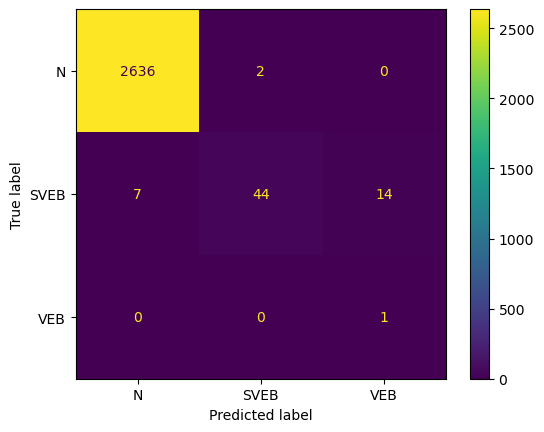

Fold 141:
  Test:  patient=140
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1776
         1.0       0.00      0.00      0.00         2
         2.0       0.93      0.73      0.82       350

    accuracy                           0.95      2128
   macro avg       0.63      0.57      0.60      2128
weighted avg       0.94      0.95      0.94      2128

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.947652  0.0    0.930657  0.945019     0.626103      0.943966
recall        0.988739  0.0    0.728571  0.945019     0.572437      0.945019
f1-score      0.967760  0.0    0.817308  0.945019     0.595022      0.942105
support    1776.000000  2.0  350.000000  0.945019  2128.000000   2128.000000


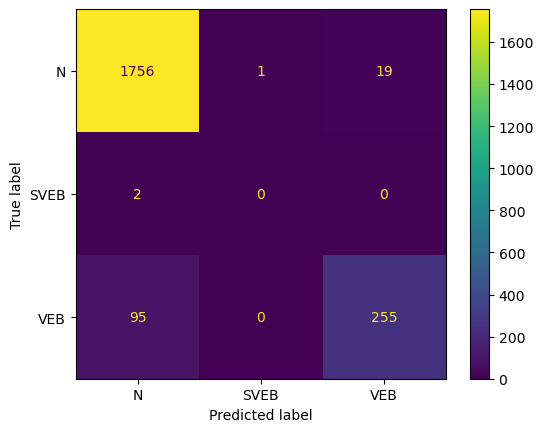

Fold 142:
  Test:  patient=141
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2946
         1.0       0.00      0.00      0.00         0
         2.0       0.95      0.95      0.95        41

    accuracy                           1.00      2987
   macro avg       0.65      0.65      0.65      2987
weighted avg       1.00      1.00      1.00      2987

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999321  0.0   0.95122  0.997991     0.650180      0.998660
recall        0.998642  NaN   0.95122  0.997991     0.649954      0.997991
f1-score      0.998981  NaN   0.95122  0.997991     0.650067      0.998326
support    2946.000000  0.0  41.00000  0.997991  2987.000000   2987.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

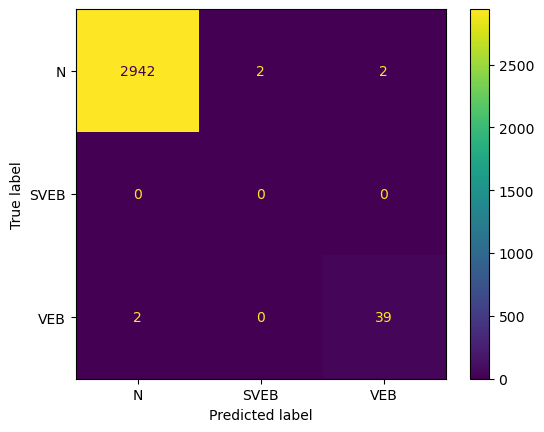

Fold 143:
  Test:  patient=142
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3597
         2.0       1.00      0.99      0.99        83

    accuracy                           1.00      3680
   macro avg       1.00      0.99      1.00      3680
weighted avg       1.00      1.00      1.00      3680

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.999722   1.000000  0.999728     0.999861      0.999728
recall        1.000000   0.987952  0.999728     0.993976      0.999728
f1-score      0.999861   0.993939  0.999728     0.996900      0.999727
support    3597.000000  83.000000  0.999728  3680.000000   3680.000000


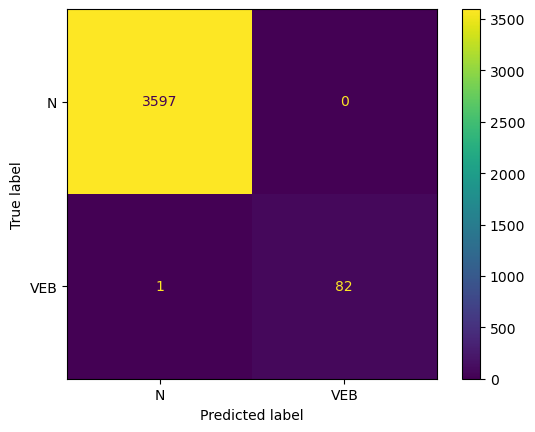

Fold 144:
  Test:  patient=143
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       0.00      0.00      0.00         0
         2.0       0.67      1.00      0.80         4

    accuracy                           1.00      2080
   macro avg       0.56      0.67      0.60      2080
weighted avg       1.00      1.00      1.00      2080

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.666667  0.998558     0.555556      0.999359
recall        0.998555  NaN  1.000000  0.998558     0.666185      0.998558
f1-score      0.999277  NaN  0.800000  0.998558     0.599759      0.998894
support    2076.000000  0.0  4.000000  0.998558  2080.000000   2080.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

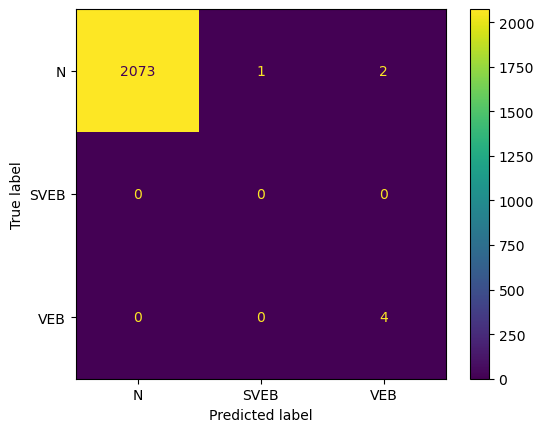

Fold 145:
  Test:  patient=144
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2798
         1.0       0.00      0.00      0.00         1
         2.0       0.57      0.67      0.62         6

    accuracy                           1.00      2805
   macro avg       0.52      0.56      0.54      2805
weighted avg       1.00      1.00      1.00      2805

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998928  NaN  0.571429  0.997861     0.523452      0.997657
recall        0.998928  0.0  0.666667  0.997861     0.555198      0.997861
f1-score      0.998928  NaN  0.615385  0.997861     0.538104      0.997751
support    2798.000000  1.0  6.000000  0.997861  2805.000000   2805.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

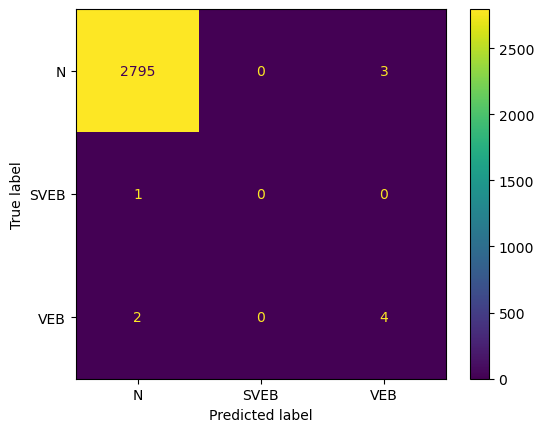

Fold 146:
  Test:  patient=145
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1791
         1.0       0.00      0.00      0.00         0
         2.0       0.28      0.15      0.20       230

    accuracy                           0.86      2021
   macro avg       0.39      0.37      0.37      2021
weighted avg       0.83      0.86      0.84      2021

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.898574  0.0    0.280000  0.858981     0.392858      0.828177
recall        0.949749  NaN    0.152174  0.858981     0.367308      0.858981
f1-score      0.923453  NaN    0.197183  0.858981     0.373545      0.840800
support    1791.000000  0.0  230.000000  0.858981  2021.000000   2021.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

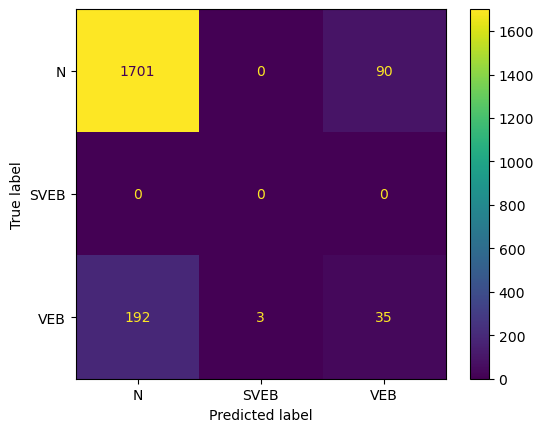

Fold 147:
  Test:  patient=146
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1800
         2.0       0.44      0.48      0.46        64

    accuracy                           0.96      1864
   macro avg       0.71      0.73      0.72      1864
weighted avg       0.96      0.96      0.96      1864

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.981595   0.436620  0.960837     0.709107      0.962883
recall        0.977778   0.484375  0.960837     0.731076      0.960837
f1-score      0.979683   0.459259  0.960837     0.719471      0.961814
support    1800.000000  64.000000  0.960837  1864.000000   1864.000000


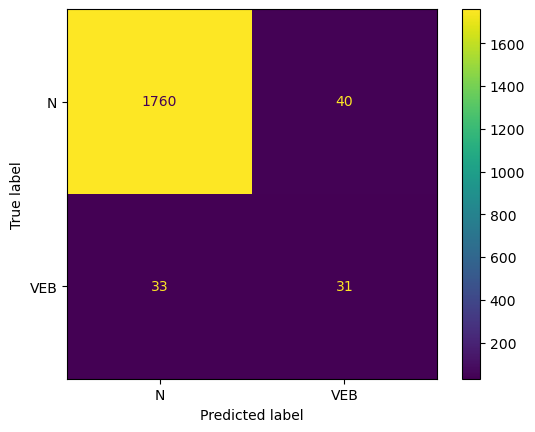

Fold 148:
  Test:  patient=147
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2630
         2.0       0.75      1.00      0.86         3

    accuracy                           1.00      2633
   macro avg       0.88      1.00      0.93      2633
weighted avg       1.00      1.00      1.00      2633

                  0.0       2.0  accuracy    macro avg  weighted avg
precision     1.00000  0.750000   0.99962     0.875000      0.999715
recall        0.99962  1.000000   0.99962     0.999810      0.999620
f1-score      0.99981  0.857143   0.99962     0.928476      0.999647
support    2630.00000  3.000000   0.99962  2633.000000   2633.000000


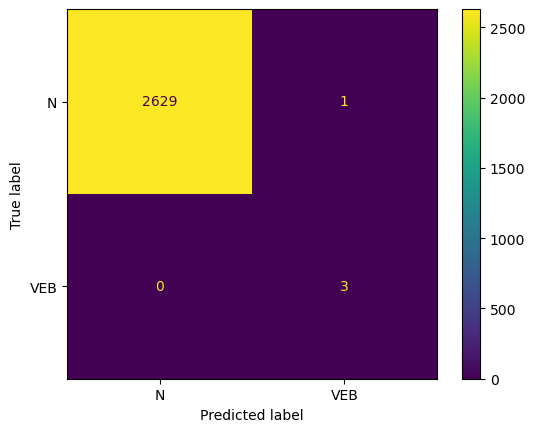

Fold 149:
  Test:  patient=148
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1518
         2.0       0.01      0.50      0.02         2

    accuracy                           0.91      1520
   macro avg       0.50      0.71      0.49      1520
weighted avg       1.00      0.91      0.95      1520

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     0.999281  0.007692  0.914474     0.503486      0.997976
recall        0.915020  0.500000  0.914474     0.707510      0.914474
f1-score      0.955296  0.015152  0.914474     0.485224      0.954059
support    1518.000000  2.000000  0.914474  1520.000000   1520.000000


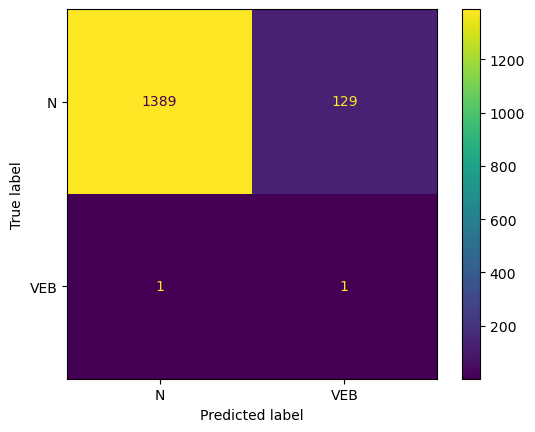

Fold 150:
  Test:  patient=149
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      1644
         2.0       0.02      0.19      0.04        27

    accuracy                           0.84      1671
   macro avg       0.50      0.52      0.47      1671
weighted avg       0.97      0.84      0.90      1671

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.984485   0.019763   0.83842     0.502124      0.968897
recall        0.849148   0.185185   0.83842     0.517167      0.838420
f1-score      0.911822   0.035714   0.83842     0.473768      0.897666
support    1644.000000  27.000000   0.83842  1671.000000   1671.000000


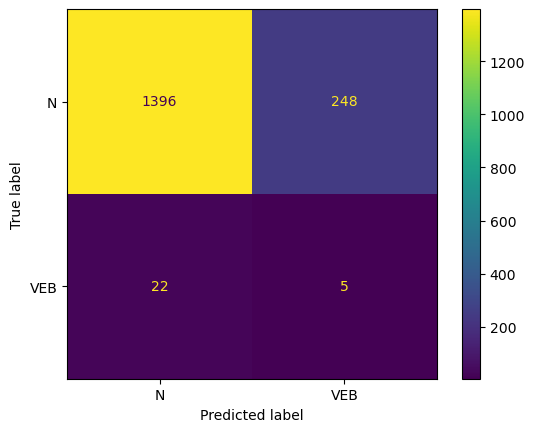

Fold 151:
  Test:  patient=150
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2660
         2.0       0.96      0.39      0.55       366

    accuracy                           0.92      3026
   macro avg       0.94      0.69      0.76      3026
weighted avg       0.93      0.92      0.91      3026

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.922168    0.959459  0.923992     0.940814      0.926679
recall        0.997744    0.387978  0.923992     0.692861      0.923992
f1-score      0.958469    0.552529  0.923992     0.755499      0.909370
support    2660.000000  366.000000  0.923992  3026.000000   3026.000000


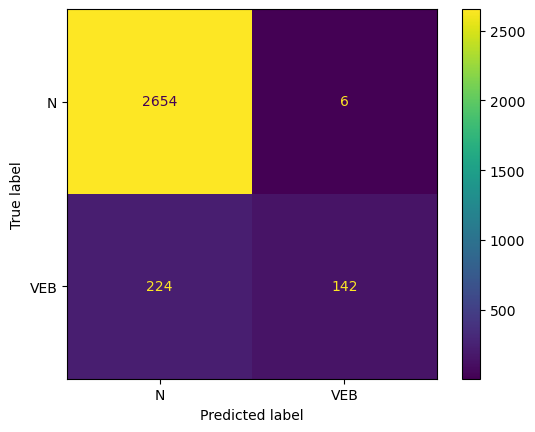

Fold 152:
  Test:  patient=151
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1211
         2.0       0.97      0.85      0.91       849

    accuracy                           0.93      2060
   macro avg       0.94      0.92      0.92      2060
weighted avg       0.93      0.93      0.93      2060

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.902273    0.972973   0.92767     0.937623      0.931411
recall        0.983485    0.848057   0.92767     0.915771      0.927670
f1-score      0.941130    0.906230   0.92767     0.923680      0.926747
support    1211.000000  849.000000   0.92767  2060.000000   2060.000000


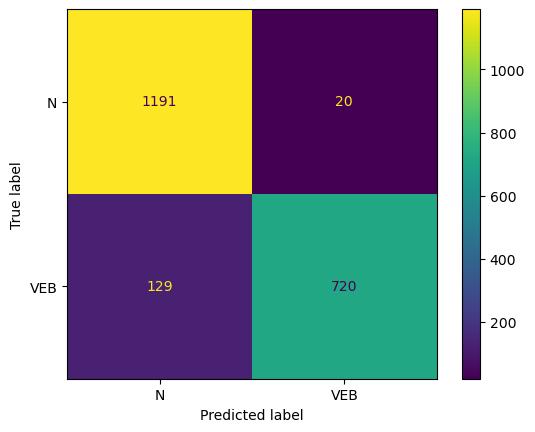

Fold 153:
  Test:  patient=152
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2360
         1.0       0.96      0.15      0.25       179
         2.0       0.93      0.56      0.70       110

    accuracy                           0.92      2649
   macro avg       0.94      0.57      0.64      2649
weighted avg       0.93      0.92      0.90      2649

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.923288    0.962963    0.925373  0.923745     0.937208   
recall        0.999576    0.145251    0.563636  0.923745     0.569488   
f1-score      0.959919    0.252427    0.700565  0.923745     0.637637   
support    2360.000000  179.000000  110.000000  0.923745  2649.000000   

           weighted avg  
precision      0.926055  
recall         0.923745  
f1-score       0.901342  
support     2649.000000  


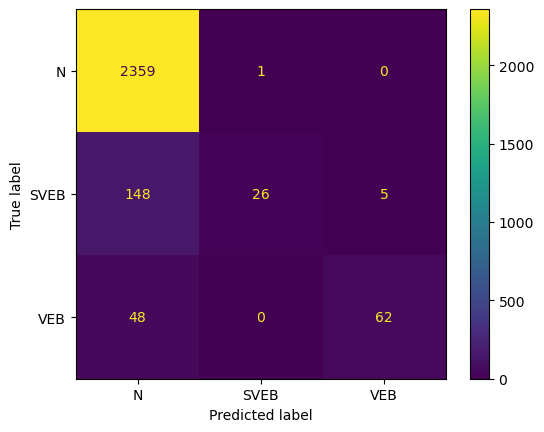

Fold 154:
  Test:  patient=153
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2070
         1.0       0.96      0.25      0.40       104
         2.0       1.00      1.00      1.00         8

    accuracy                           0.96      2182
   macro avg       0.98      0.75      0.79      2182
weighted avg       0.96      0.96      0.95      2182

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.963670    0.962963  1.0  0.963795     0.975544      0.963770
recall        0.999517    0.250000  1.0  0.963795     0.749839      0.963795
f1-score      0.981266    0.396947  1.0  0.963795     0.792738      0.953485
support    2070.000000  104.000000  8.0  0.963795  2182.000000   2182.000000


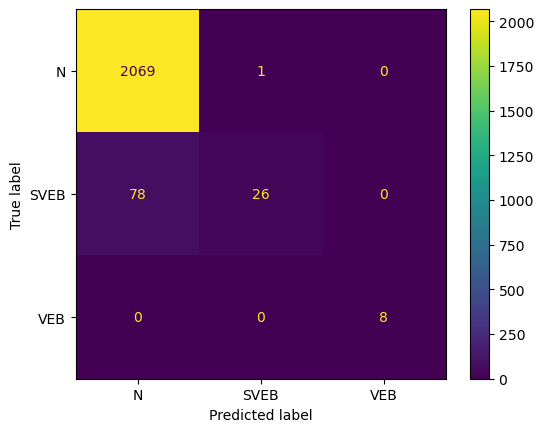

Fold 155:
  Test:  patient=154
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2814
         1.0       0.74      0.23      0.35       124
         2.0       0.92      0.75      0.83       185

    accuracy                           0.95      3123
   macro avg       0.87      0.66      0.72      3123
weighted avg       0.95      0.95      0.94      3123

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.957737    0.736842    0.920530   0.95325     0.871703   
recall        0.998579    0.225806    0.751351   0.95325     0.658579   
f1-score      0.977731    0.345679    0.827381   0.95325     0.716930   
support    2814.000000  124.000000  185.000000   0.95325  3123.000000   

           weighted avg  
precision      0.946762  
recall         0.953250  
f1-score       0.943729  
support     3123.000000  


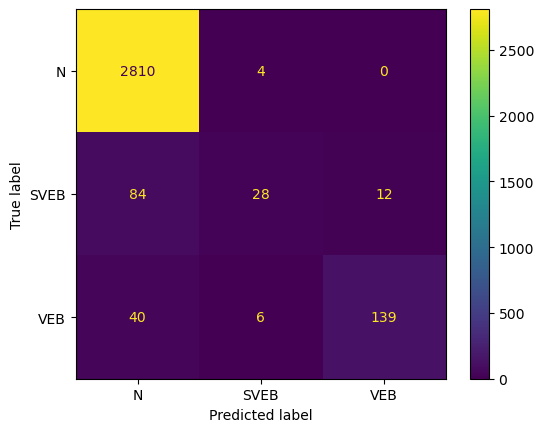

Fold 156:
  Test:  patient=155
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2190
         2.0       0.93      1.00      0.96        13

    accuracy                           1.00      2203
   macro avg       0.96      1.00      0.98      2203
weighted avg       1.00      1.00      1.00      2203

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.928571  0.999546     0.964286      0.999578
recall        0.999543   1.000000  0.999546     0.999772      0.999546
f1-score      0.999772   0.962963  0.999546     0.981367      0.999554
support    2190.000000  13.000000  0.999546  2203.000000   2203.000000


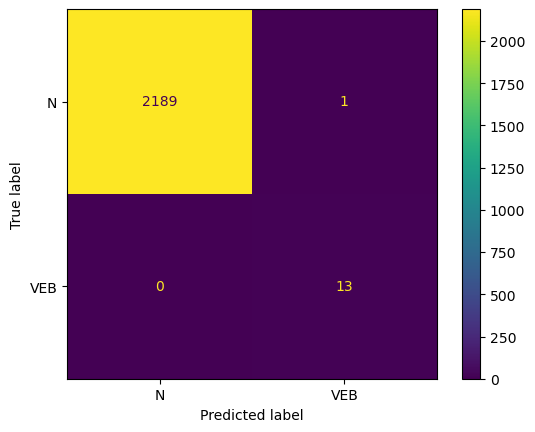

Fold 157:
  Test:  patient=156
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2563
         2.0       0.09      1.00      0.16         6

    accuracy                           0.98      2569
   macro avg       0.54      0.99      0.58      2569
weighted avg       1.00      0.98      0.99      2569

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.089552  0.976255     0.544776      0.997874
recall        0.976200  1.000000  0.976255     0.988100      0.976255
f1-score      0.987957  0.164384  0.976255     0.576170      0.986033
support    2563.000000  6.000000  0.976255  2569.000000   2569.000000


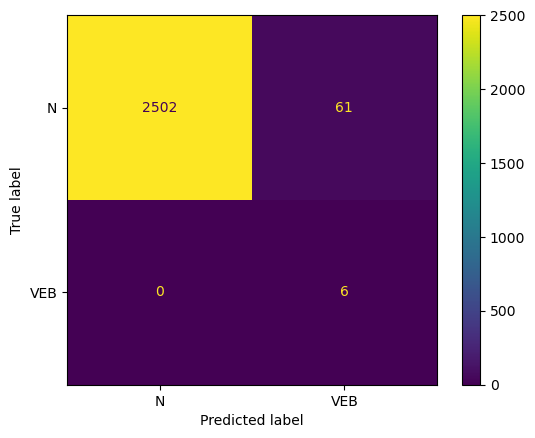

Fold 158:
  Test:  patient=157
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1703
         1.0       0.00      0.00      0.00         2
         2.0       0.31      0.80      0.44         5

    accuracy                           0.99      1710
   macro avg       0.44      0.60      0.48      1710
weighted avg       1.00      0.99      0.99      1710

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999411  NaN  0.307692  0.994152     0.435701      0.996219
recall        0.995890  0.0  0.800000  0.994152     0.598630      0.994152
f1-score      0.997647  NaN  0.444444  0.994152     0.480697      0.994863
support    1703.000000  2.0  5.000000  0.994152  1710.000000   1710.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

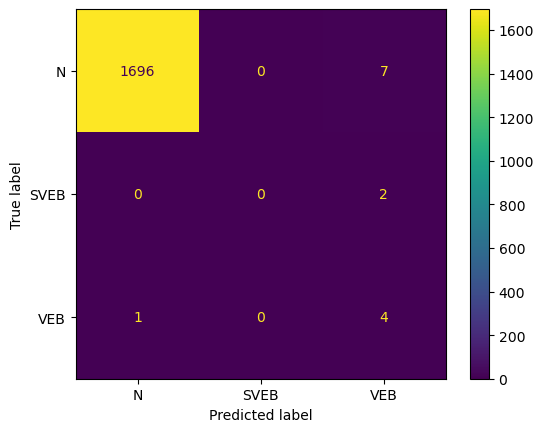

Fold 159:
  Test:  patient=158
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1496
         1.0       0.00      0.00      0.00         7
         2.0       1.00      0.25      0.40         4

    accuracy                           0.99      1507
   macro avg       0.66      0.42      0.47      1507
weighted avg       0.99      0.99      0.99      1507

                   0.0  1.0   2.0  accuracy    macro avg  weighted avg
precision     0.993360  NaN  1.00  0.993364     0.664453      0.988763
recall        1.000000  0.0  0.25  0.993364     0.416667      0.993364
f1-score      0.996669  NaN  0.40  0.993364     0.465556      0.990456
support    1496.000000  7.0  4.00  0.993364  1507.000000   1507.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

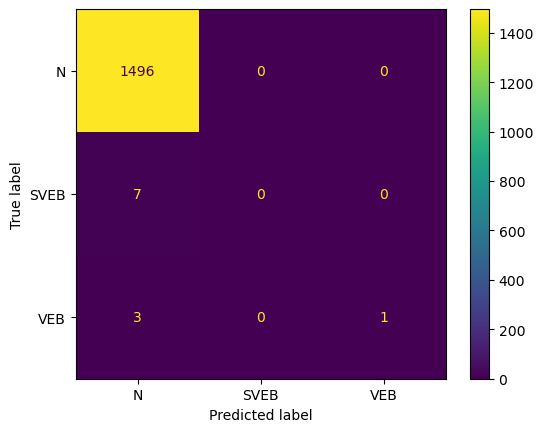

Fold 160:
  Test:  patient=159
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1884
         2.0       1.00      0.99      0.99       719

    accuracy                           1.00      2603
   macro avg       1.00      1.00      1.00      2603
weighted avg       1.00      1.00      1.00      2603

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.996822    0.997203  0.996927     0.997012      0.996927
recall        0.998938    0.991655  0.996927     0.995297      0.996927
f1-score      0.997879    0.994421  0.996927     0.996150      0.996924
support    1884.000000  719.000000  0.996927  2603.000000   2603.000000


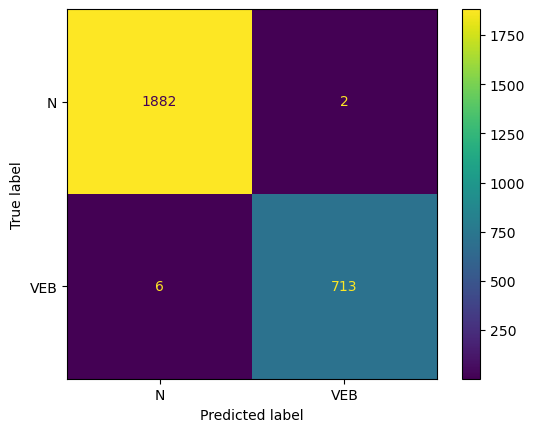

Fold 161:
  Test:  patient=160
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1711
         1.0       0.00      0.00      0.00         0
         2.0       0.27      1.00      0.42         4

    accuracy                           0.99      1715
   macro avg       0.42      0.66      0.47      1715
weighted avg       1.00      0.99      0.99      1715

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.266667  0.991837     0.422222      0.998290
recall        0.991818  NaN  1.000000  0.991837     0.663939      0.991837
f1-score      0.995892  NaN  0.421053  0.991837     0.472315      0.994551
support    1711.000000  0.0  4.000000  0.991837  1715.000000   1715.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

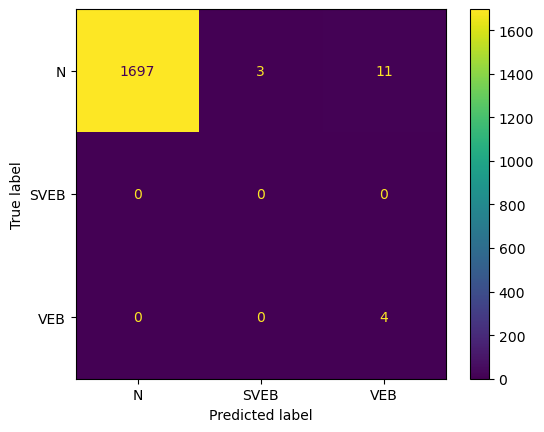

Fold 162:
  Test:  patient=161


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1835
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.67      0.80       783

    accuracy                           0.90      2618
   macro avg       0.62      0.56      0.58      2618
weighted avg       0.91      0.90      0.89      2618

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.877874  0.0    0.996183  0.899542     0.624686      0.913258
recall        0.998910  NaN    0.666667  0.899542     0.555192      0.899542
f1-score      0.934489  NaN    0.798776  0.899542     0.577755      0.893899
support    1835.000000  0.0  783.000000  0.899542  2618.000000   2618.000000


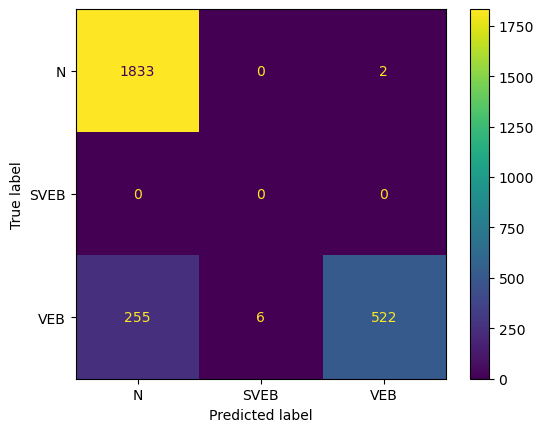

Fold 163:
  Test:  patient=162
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1705
         2.0       1.00      0.73      0.85       755

    accuracy                           0.92      2460
   macro avg       0.95      0.87      0.90      2460
weighted avg       0.93      0.92      0.91      2460

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.894544    1.000000  0.918293     0.947272      0.926909
recall        1.000000    0.733775  0.918293     0.866887      0.918293
f1-score      0.944337    0.846448  0.918293     0.895392      0.914294
support    1705.000000  755.000000  0.918293  2460.000000   2460.000000


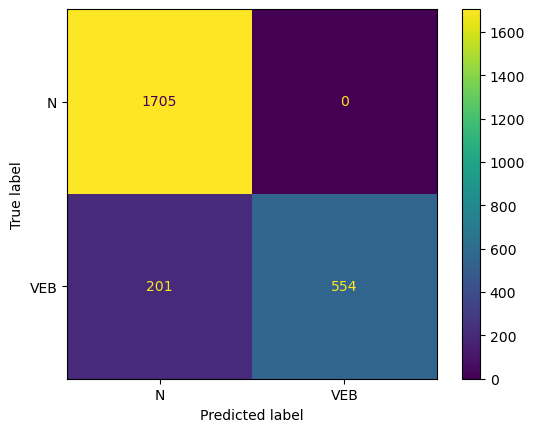

Fold 164:
  Test:  patient=163
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1843
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.63      0.77      1364

    accuracy                           0.84      3207
   macro avg       0.59      0.54      0.55      3207
weighted avg       0.87      0.84      0.83      3207

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.783163  0.0     0.998829  0.840349     0.593997      0.874890
recall        0.999457  NaN     0.625367  0.840349     0.541608      0.840349
f1-score      0.878188  NaN     0.769161  0.840349     0.549117      0.831817
support    1843.000000  0.0  1364.000000  0.840349  3207.000000   3207.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

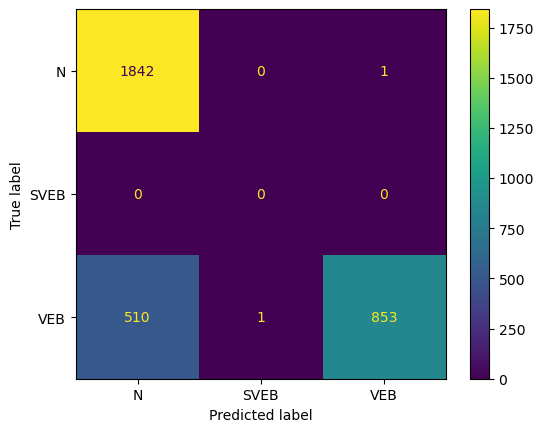

Fold 165:
  Test:  patient=164
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1560
         2.0       0.83      1.00      0.90        57

    accuracy                           0.99      1617
   macro avg       0.91      1.00      0.95      1617
weighted avg       0.99      0.99      0.99      1617

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.826087  0.992579     0.913043      0.993869
recall        0.992308   1.000000  0.992579     0.996154      0.992579
f1-score      0.996139   0.904762  0.992579     0.950450      0.992918
support    1560.000000  57.000000  0.992579  1617.000000   1617.000000


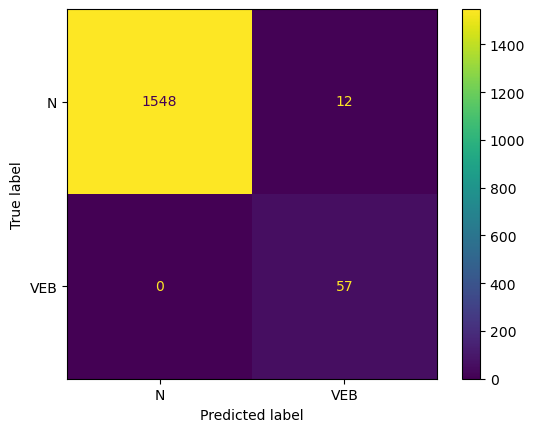

Fold 166:
  Test:  patient=165
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1245
         1.0       1.00      0.01      0.02       589
         2.0       0.00      0.00      0.00         1

    accuracy                           0.68      1835
   macro avg       0.60      0.34      0.30      1835
weighted avg       0.85      0.68      0.60      1835

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.785489    1.000000  0.0  0.681744     0.595163      0.853915
recall        1.000000    0.010187  0.0  0.681744     0.336729      0.681744
f1-score      0.879859    0.020168  0.0  0.681744     0.300009      0.603435
support    1245.000000  589.000000  1.0  0.681744  1835.000000   1835.000000


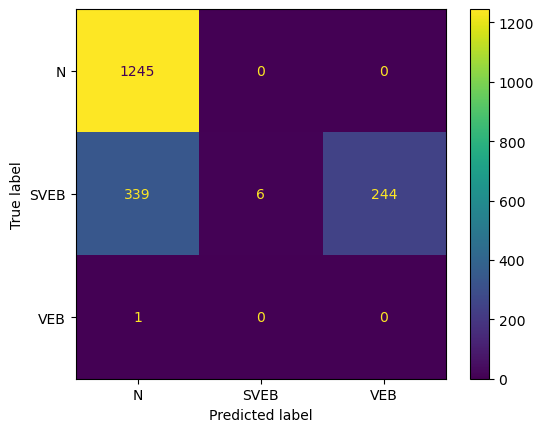

Fold 167:
  Test:  patient=166
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1427
         1.0       1.00      0.09      0.17       536
         2.0       0.00      0.00      0.00         0

    accuracy                           0.75      1963
   macro avg       0.62      0.36      0.36      1963
weighted avg       0.89      0.75      0.71      1963

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.845287    1.000000  0.0   0.75191     0.615096      0.887532
recall        0.999299    0.093284  NaN   0.75191     0.364194      0.751910
f1-score      0.915864    0.170648  NaN   0.75191     0.362171      0.712382
support    1427.000000  536.000000  0.0   0.75191  1963.000000   1963.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

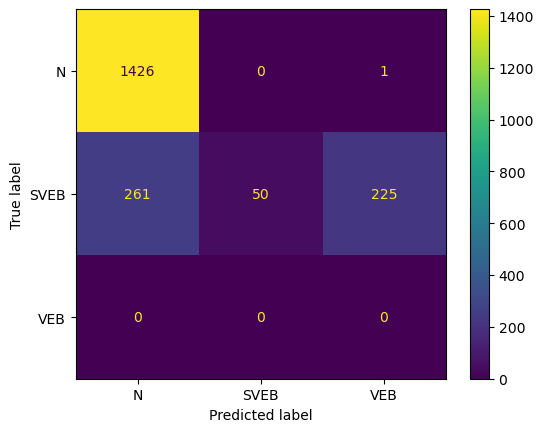

Fold 168:
  Test:  patient=167
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      3199
         2.0       0.99      0.73      0.84       457

    accuracy                           0.96      3656
   macro avg       0.97      0.86      0.91      3656
weighted avg       0.97      0.96      0.96      3656

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.962338    0.985163  0.964442     0.973751      0.965191
recall        0.998437    0.726477  0.964442     0.862457      0.964442
f1-score      0.980055    0.836272  0.964442     0.908164      0.962082
support    3199.000000  457.000000  0.964442  3656.000000   3656.000000


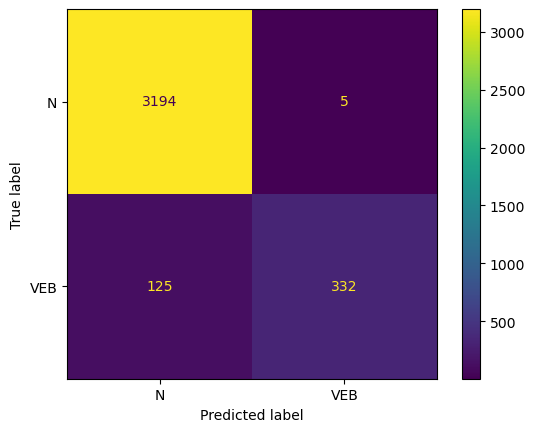

Fold 169:
  Test:  patient=168
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3447
         2.0       0.98      0.58      0.73       450

    accuracy                           0.95      3897
   macro avg       0.96      0.79      0.85      3897
weighted avg       0.95      0.95      0.94      3897

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.948456    0.977695  0.950475     0.963076      0.951833
recall        0.998259    0.584444  0.950475     0.791352      0.950475
f1-score      0.972721    0.731572  0.950475     0.852146      0.944875
support    3447.000000  450.000000  0.950475  3897.000000   3897.000000


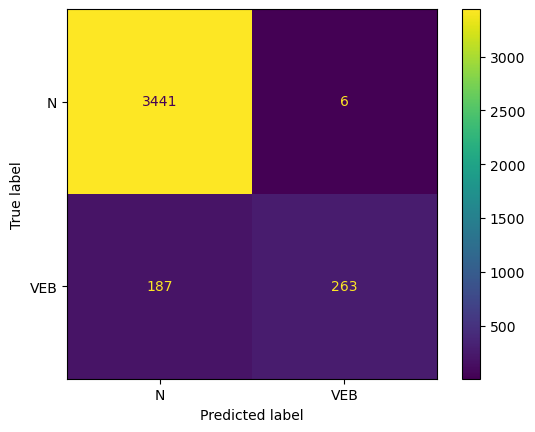

Fold 170:
  Test:  patient=169
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2007
         2.0       1.00      0.98      0.99       452

    accuracy                           1.00      2459
   macro avg       1.00      0.99      1.00      2459
weighted avg       1.00      1.00      1.00      2459

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.996524    1.000000  0.997153     0.998262      0.997163
recall        1.000000    0.984513  0.997153     0.992257      0.997153
f1-score      0.998259    0.992196  0.997153     0.995228      0.997145
support    2007.000000  452.000000  0.997153  2459.000000   2459.000000


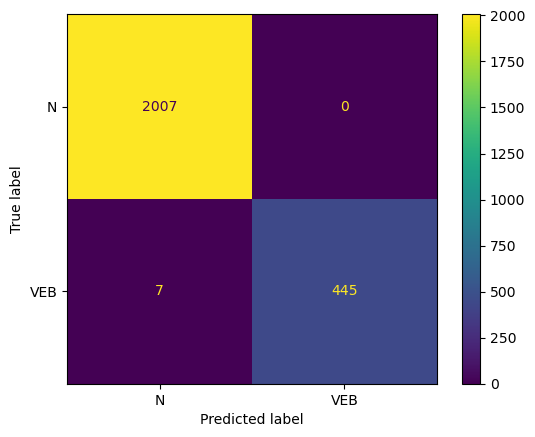

Fold 171:
  Test:  patient=170
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2153
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.88      0.94       543

    accuracy                           0.98      2696
   macro avg       0.66      0.63      0.64      2696
weighted avg       0.98      0.98      0.98      2696

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.970694  0.0    1.000000  0.975519     0.656898      0.976597
recall        1.000000  NaN    0.878453  0.975519     0.626151      0.975519
f1-score      0.985129  NaN    0.935294  0.975519     0.640141      0.975092
support    2153.000000  0.0  543.000000  0.975519  2696.000000   2696.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

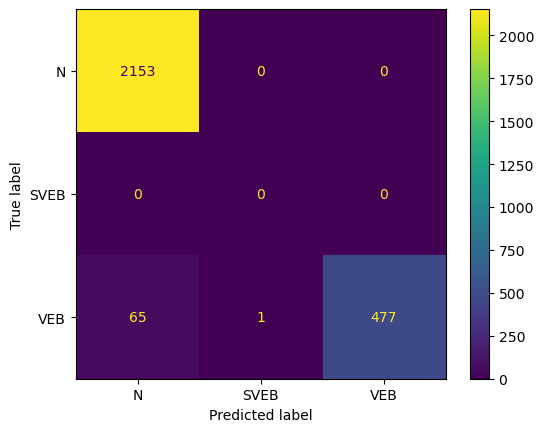

Fold 172:
  Test:  patient=171
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1460
         2.0       1.00      0.82      0.90       313

    accuracy                           0.97      1773
   macro avg       0.98      0.91      0.94      1773
weighted avg       0.97      0.97      0.97      1773

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.963696    1.000000  0.968979     0.981848      0.970105
recall        1.000000    0.824281  0.968979     0.912141      0.968979
f1-score      0.981513    0.903678  0.968979     0.942595      0.967772
support    1460.000000  313.000000  0.968979  1773.000000   1773.000000


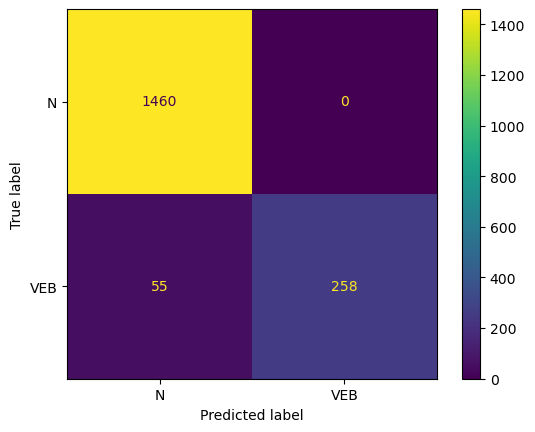

Fold 173:
  Test:  patient=172


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2566
         1.0       0.00      0.00      0.00         6
         2.0       0.98      1.00      0.99        92

    accuracy                           1.00      2664
   macro avg       0.66      0.67      0.66      2664
weighted avg       1.00      1.00      1.00      2664

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998444  NaN   0.978723  0.997748     0.659056      0.995514
recall        1.000000  0.0   1.000000  0.997748     0.666667      0.997748
f1-score      0.999221  NaN   0.989247  0.997748     0.662823      0.996626
support    2566.000000  6.0  92.000000  0.997748  2664.000000   2664.000000


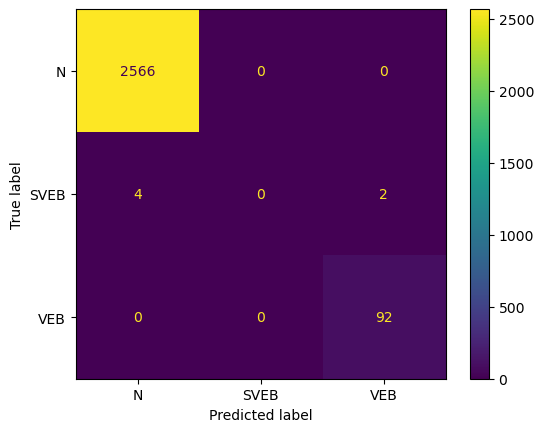

Fold 174:
  Test:  patient=173
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      1622
         1.0       0.00      0.00      0.00         5
         2.0       0.01      1.00      0.02         1

    accuracy                           0.93      1628
   macro avg       0.34      0.64      0.33      1628
weighted avg       0.99      0.93      0.96      1628

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998012  NaN  0.008403  0.925676     0.335472      0.994339
recall        0.928483  0.0  1.000000  0.925676     0.642828      0.925676
f1-score      0.961993  NaN  0.016667  0.925676     0.326220      0.958458
support    1622.000000  5.0  1.000000  0.925676  1628.000000   1628.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

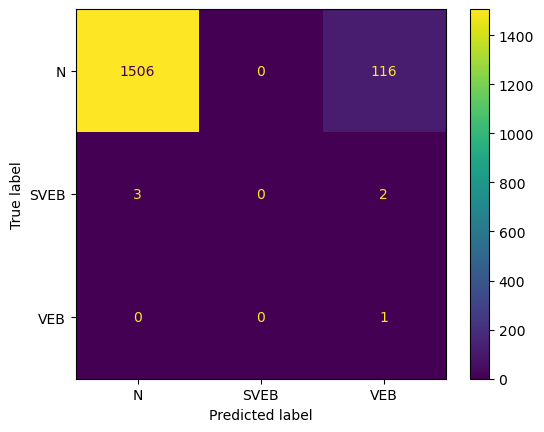

Fold 175:
  Test:  patient=174
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1544
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.72      0.84      1554

    accuracy                           0.86      3098
   macro avg       0.59      0.57      0.57      3098
weighted avg       0.89      0.86      0.86      3098

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.781155  0.0     1.000000   0.85991     0.593718      0.890931
recall        0.998705  NaN     0.722008   0.85991     0.573571      0.859910
f1-score      0.876634  NaN     0.838565   0.85991     0.571733      0.857538
support    1544.000000  0.0  1554.000000   0.85991  3098.000000   3098.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

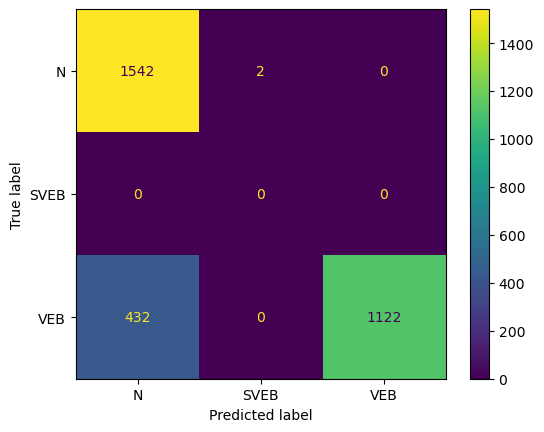

Fold 176:
  Test:  patient=175
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1085
         2.0       1.00      0.95      0.97      1120

    accuracy                           0.97      2205
   macro avg       0.97      0.97      0.97      2205
weighted avg       0.97      0.97      0.97      2205

                   0.0          2.0  accuracy    macro avg  weighted avg
precision     0.946771     1.000000  0.972336     0.973386      0.973808
recall        1.000000     0.945536  0.972336     0.972768      0.972336
f1-score      0.972658     0.972006  0.972336     0.972332      0.972327
support    1085.000000  1120.000000  0.972336  2205.000000   2205.000000


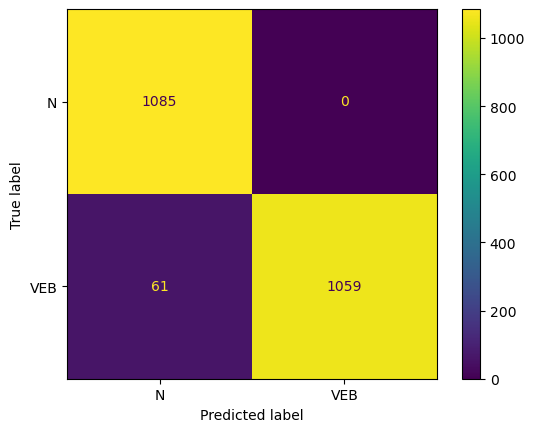

Fold 177:
  Test:  patient=176
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1802
         1.0       0.00      0.00      0.00         8
         2.0       1.00      0.98      0.99       683

    accuracy                           0.99      2493
   macro avg       0.66      0.66      0.66      2493
weighted avg       0.99      0.99      0.99      2493

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.989023  NaN    1.000000  0.991978     0.663008      0.988857
recall        1.000000  0.0    0.982430  0.991978     0.660810      0.991978
f1-score      0.994481  NaN    0.991137  0.991978     0.661873      0.990374
support    1802.000000  8.0  683.000000  0.991978  2493.000000   2493.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

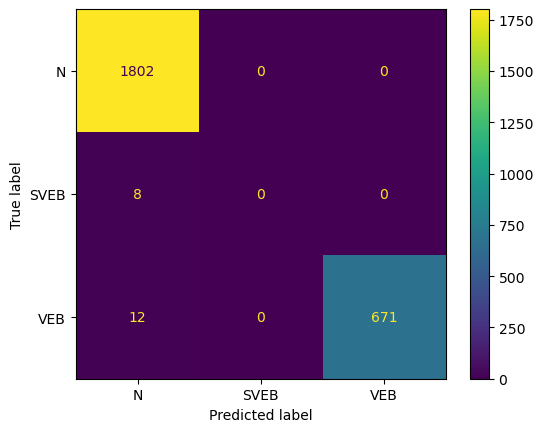

Fold 178:
  Test:  patient=177
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1435
         2.0       1.00      0.99      1.00       491

    accuracy                           1.00      1926
   macro avg       1.00      1.00      1.00      1926
weighted avg       1.00      1.00      1.00      1926

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.997914    1.000000  0.998442     0.998957      0.998446
recall        1.000000    0.993890  0.998442     0.996945      0.998442
f1-score      0.998956    0.996936  0.998442     0.997946      0.998441
support    1435.000000  491.000000  0.998442  1926.000000   1926.000000


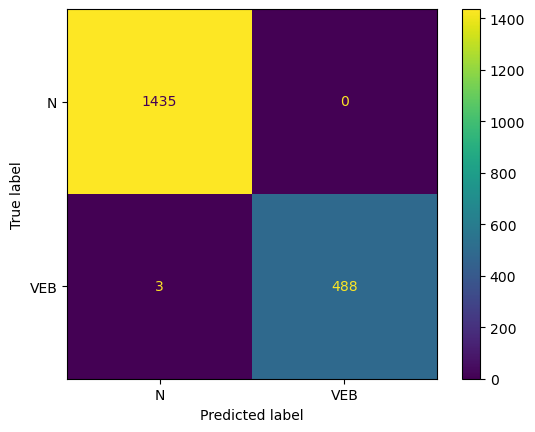

Fold 179:
  Test:  patient=178
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2230
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.95      0.97       422

    accuracy                           0.99      2653
   macro avg       0.66      0.65      0.66      2653
weighted avg       0.99      0.99      0.99      2653

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.990667  NaN    0.995037  0.991331     0.661901      0.990988
recall        0.999552  0.0    0.950237  0.991331     0.649930      0.991331
f1-score      0.995089  NaN    0.972121  0.991331     0.655737      0.991061
support    2230.000000  1.0  422.000000  0.991331  2653.000000   2653.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

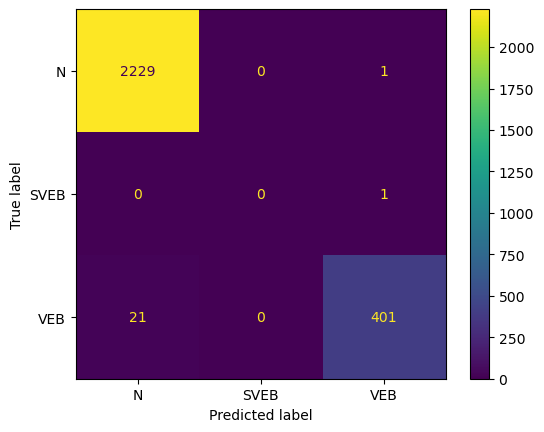

Fold 180:
  Test:  patient=179
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1857
         1.0       0.00      0.00      0.00         1
         2.0       0.91      0.87      0.89        93

    accuracy                           0.99      1951
   macro avg       0.63      0.62      0.63      1951
weighted avg       0.99      0.99      0.99      1951

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.993018  NaN   0.910112  0.989236     0.634377      0.988557
recall        0.995692  0.0   0.870968  0.989236     0.622220      0.989236
f1-score      0.994353  NaN   0.890110  0.989236     0.628154      0.988875
support    1857.000000  1.0  93.000000  0.989236  1951.000000   1951.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

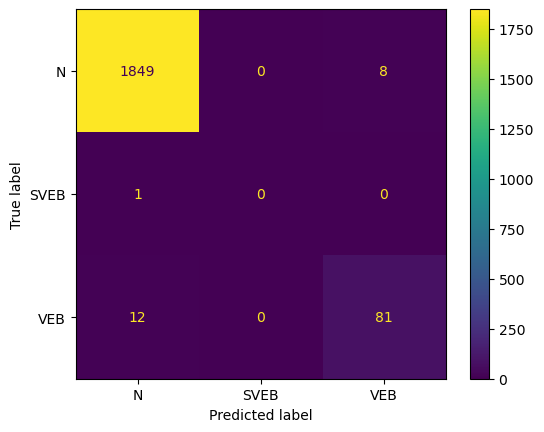

Fold 181:
  Test:  patient=180
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2117
         1.0       0.00      0.00      0.00         2
         2.0       1.00      0.92      0.96       235

    accuracy                           0.99      2354
   macro avg       0.66      0.64      0.65      2354
weighted avg       0.99      0.99      0.99      2354

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.990637  NaN    0.995413  0.991079     0.662017      0.990272
recall        0.999528  0.0    0.923404  0.991079     0.640977      0.991079
f1-score      0.995062  NaN    0.958057  0.991079     0.651040      0.990523
support    2117.000000  2.0  235.000000  0.991079  2354.000000   2354.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

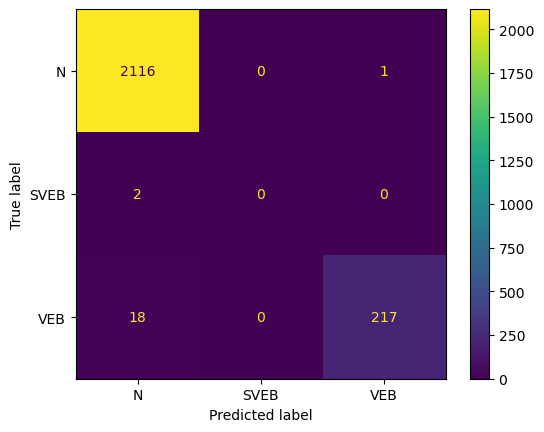

Fold 182:
  Test:  patient=181
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2119
         1.0       0.00      0.00      0.00         0
         2.0       0.61      0.63      0.62        27

    accuracy                           0.99      2146
   macro avg       0.53      0.54      0.54      2146
weighted avg       0.99      0.99      0.99      2146

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995274  0.0   0.607143  0.989282     0.534139      0.990391
recall        0.993865  NaN   0.629630  0.989282     0.541165      0.989282
f1-score      0.994569  NaN   0.618182  0.989282     0.537584      0.989834
support    2119.000000  0.0  27.000000  0.989282  2146.000000   2146.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

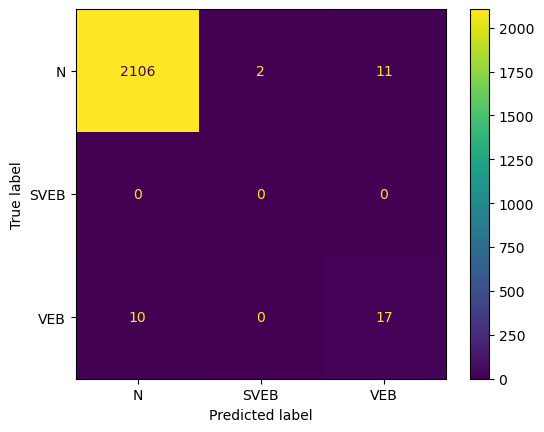

Fold 183:
  Test:  patient=182
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2993
         2.0       0.14      0.25      0.18         4

    accuracy                           1.00      2997
   macro avg       0.57      0.62      0.59      2997
weighted avg       1.00      1.00      1.00      2997

                   0.0       2.0  accuracy    macro avg  weighted avg
precision     0.998997  0.142857  0.996997     0.570927      0.997854
recall        0.997995  0.250000  0.996997     0.623998      0.996997
f1-score      0.998496  0.181818  0.996997     0.590157      0.997406
support    2993.000000  4.000000  0.996997  2997.000000   2997.000000


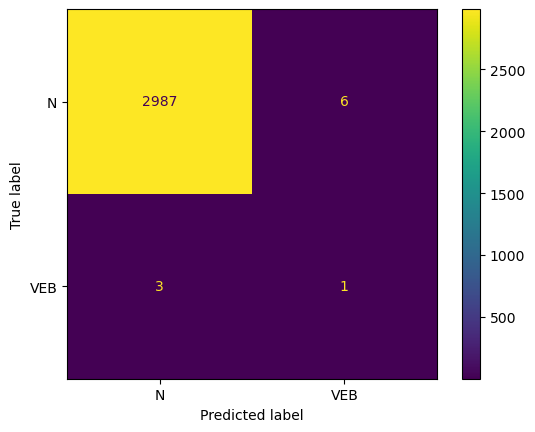

Fold 184:
  Test:  patient=183


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1969
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.87      0.93       802

    accuracy                           0.96      2774
   macro avg       0.65      0.62      0.63      2774
weighted avg       0.96      0.96      0.96      2774

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.946609  NaN    0.998561  0.959625     0.648390      0.960605
recall        0.999492  0.0    0.865337  0.959625     0.621610      0.959625
f1-score      0.972332  NaN    0.927188  0.959625     0.633173      0.958229
support    1969.000000  3.0  802.000000  0.959625  2774.000000   2774.000000


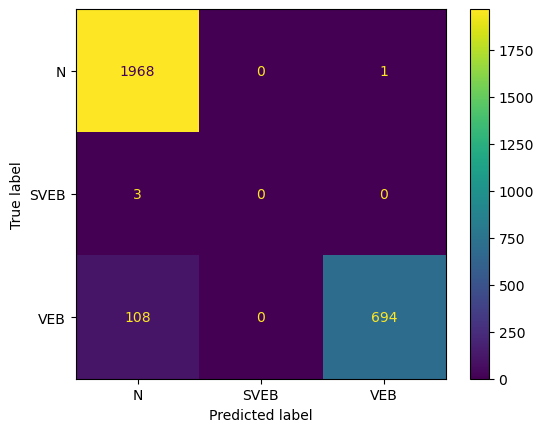

Fold 185:
  Test:  patient=184
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1608
         2.0       1.00      1.00      1.00       137

    accuracy                           1.00      1745
   macro avg       1.00      1.00      1.00      1745
weighted avg       1.00      1.00      1.00      1745

              0.0    2.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1608.0  137.0       1.0     1745.0        1745.0


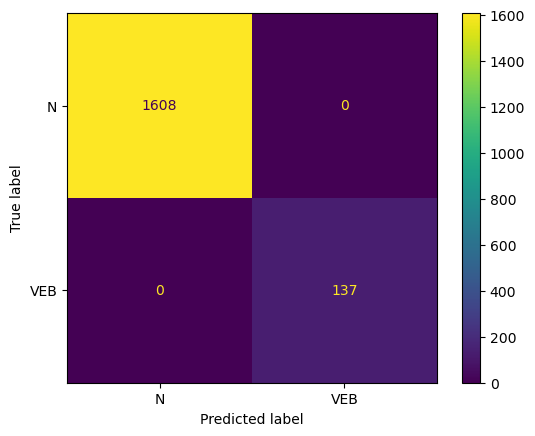

Fold 186:
  Test:  patient=185
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1150
         2.0       1.00      0.86      0.92      1110

    accuracy                           0.93      2260
   macro avg       0.94      0.93      0.93      2260
weighted avg       0.94      0.93      0.93      2260

                   0.0          2.0  accuracy    macro avg  weighted avg
precision     0.877863     1.000000  0.929204     0.938931      0.937850
recall        1.000000     0.855856  0.929204     0.927928      0.929204
f1-score      0.934959     0.922330  0.929204     0.928645      0.928756
support    1150.000000  1110.000000  0.929204  2260.000000   2260.000000


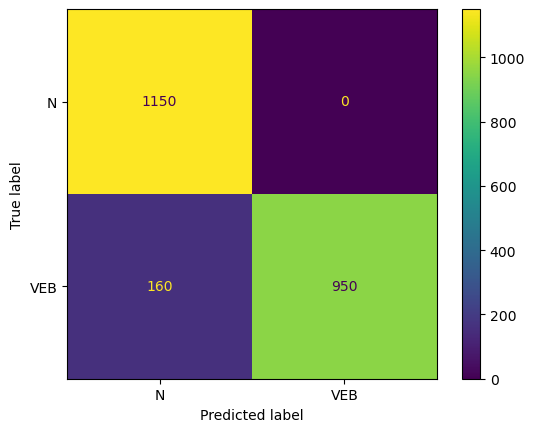

Fold 187:
  Test:  patient=186
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2338
         1.0       0.00      0.00      0.00         1
         2.0       0.91      0.91      0.91        22

    accuracy                           1.00      2361
   macro avg       0.64      0.64      0.64      2361
weighted avg       1.00      1.00      1.00      2361

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999145  NaN   0.909091  0.998306     0.636079      0.997883
recall        0.999572  0.0   0.909091  0.998306     0.636221      0.998306
f1-score      0.999359  NaN   0.909091  0.998306     0.636150      0.998094
support    2338.000000  1.0  22.000000  0.998306  2361.000000   2361.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

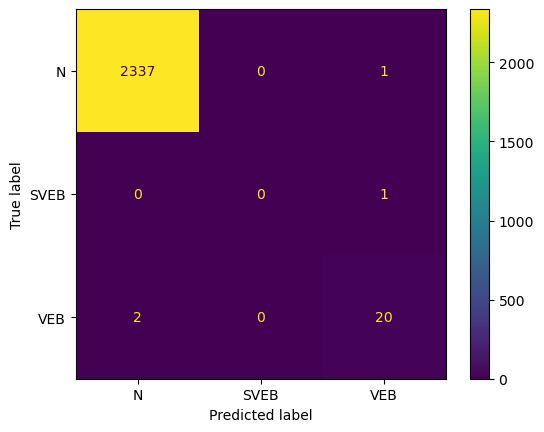

Fold 188:
  Test:  patient=187
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2146
         1.0       0.00      0.00      0.00         1
         2.0       0.88      0.88      0.88        17

    accuracy                           1.00      2164
   macro avg       0.63      0.63      0.63      2164
weighted avg       1.00      1.00      1.00      2164

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999068  NaN   0.882353  0.998152     0.627140      0.997690
recall        0.999534  0.0   0.882353  0.998152     0.627296      0.998152
f1-score      0.999301  NaN   0.882353  0.998152     0.627218      0.997921
support    2146.000000  1.0  17.000000  0.998152  2164.000000   2164.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

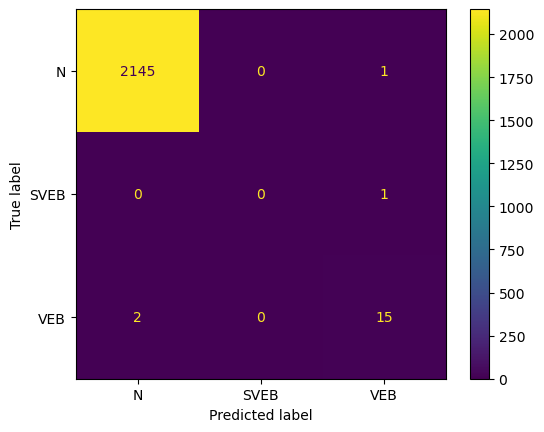

Fold 189:
  Test:  patient=188
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1670
         1.0       0.00      0.00      0.00        26
         2.0       0.17      0.86      0.29         7

    accuracy                           0.98      1703
   macro avg       0.39      0.62      0.43      1703
weighted avg       0.98      0.98      0.98      1703

                   0.0   1.0       2.0  accuracy    macro avg  weighted avg
precision     0.997002   NaN  0.171429  0.980035     0.389477      0.978388
recall        0.995808   0.0  0.857143  0.980035     0.617650      0.980035
f1-score      0.996405   NaN  0.285714  0.980035     0.427373      0.978272
support    1670.000000  26.0  7.000000  0.980035  1703.000000   1703.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

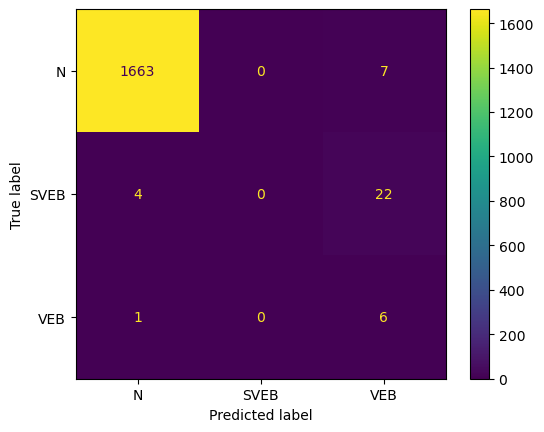

Fold 190:
  Test:  patient=189
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2840
         1.0       0.00      0.00      0.00         3
         2.0       0.78      0.33      0.47        21

    accuracy                           0.99      2864
   macro avg       0.59      0.44      0.49      2864
weighted avg       0.99      0.99      0.99      2864

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.994046  NaN   0.777778  0.993366     0.590608      0.991419
recall        0.999296  0.0   0.333333  0.993366     0.444210      0.993366
f1-score      0.996664  NaN   0.466667  0.993366     0.487777      0.991734
support    2840.000000  3.0  21.000000  0.993366  2864.000000   2864.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

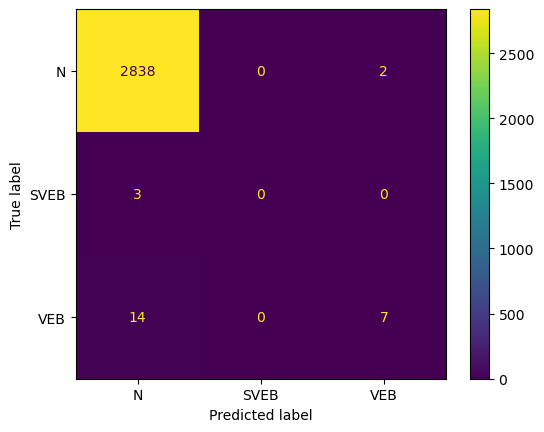

Fold 191:
  Test:  patient=190
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2311
         2.0       0.73      0.67      0.70        12

    accuracy                           1.00      2323
   macro avg       0.86      0.83      0.85      2323
weighted avg       1.00      1.00      1.00      2323

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.998270   0.727273  0.996987     0.862771      0.996870
recall        0.998702   0.666667  0.996987     0.832684      0.996987
f1-score      0.998486   0.695652  0.996987     0.847069      0.996921
support    2311.000000  12.000000  0.996987  2323.000000   2323.000000


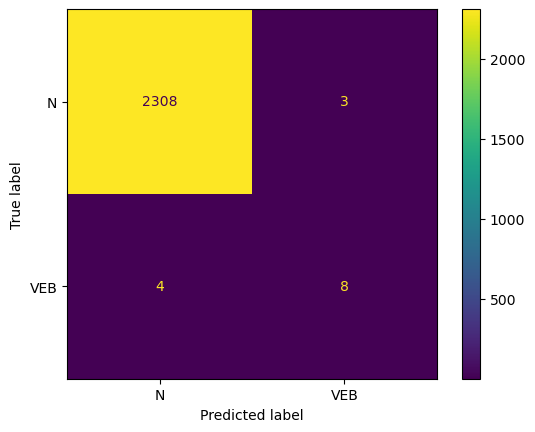

Fold 192:
  Test:  patient=191
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2065
         2.0       0.95      0.51      0.66        81

    accuracy                           0.98      2146
   macro avg       0.97      0.75      0.83      2146
weighted avg       0.98      0.98      0.98      2146

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.980980   0.953488  0.980429     0.967234      0.979942
recall        0.999031   0.506173  0.980429     0.752602      0.980429
f1-score      0.989923   0.661290  0.980429     0.825607      0.977519
support    2065.000000  81.000000  0.980429  2146.000000   2146.000000


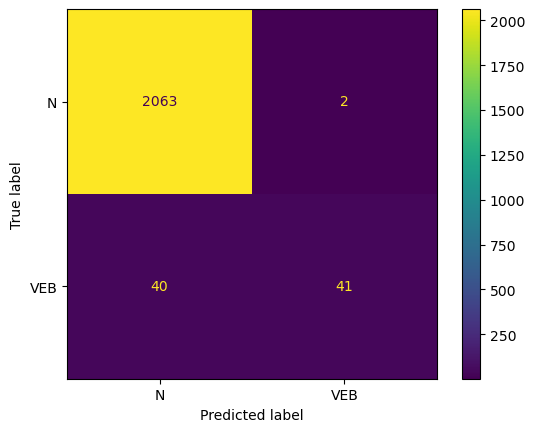

Fold 193:
  Test:  patient=192
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2473
   macro avg       0.50      0.50      0.50      2473
weighted avg       1.00      1.00      1.00      2473

                   0.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.998787     0.500000      1.000000
recall        0.998787  NaN  0.998787     0.499393      0.998787
f1-score      0.999393  NaN  0.998787     0.499697      0.999393
support    2473.000000  0.0  0.998787  2473.000000   2473.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

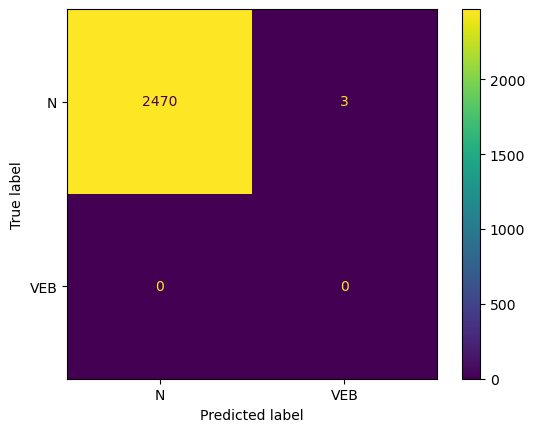

Fold 194:
  Test:  patient=193
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1451
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1452
   macro avg       0.33      0.33      0.33      1452
weighted avg       1.00      1.00      1.00      1452

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999310  NaN  0.0  0.997934     0.333103      0.998622
recall        0.998622  0.0  NaN  0.997934     0.332874      0.997934
f1-score      0.998966  NaN  NaN  0.997934     0.332989      0.998278
support    1451.000000  1.0  0.0  0.997934  1452.000000   1452.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

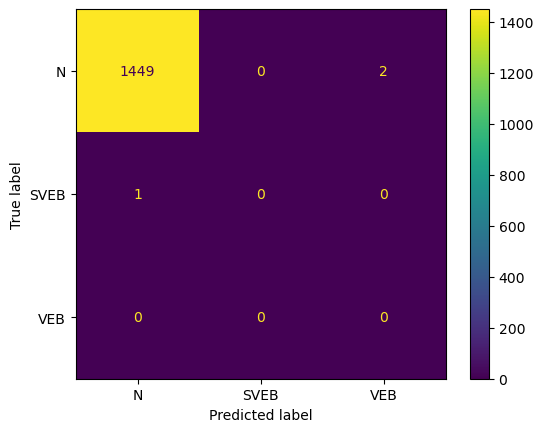

Fold 195:
  Test:  patient=194
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84      1451
         1.0       0.67      0.22      0.33         9
         2.0       1.00      0.31      0.47       795

    accuracy                           0.75      2255
   macro avg       0.80      0.51      0.55      2255
weighted avg       0.82      0.75      0.71      2255

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.722610  0.666667    1.000000   0.75255     0.796425   
recall        1.000000  0.222222    0.306918   0.75255     0.509713   
f1-score      0.838971  0.333333    0.469682   0.75255     0.547329   
support    1451.000000  9.000000  795.000000   0.75255  2255.000000   

           weighted avg  
precision       0.82018  
recall          0.75255  
f1-score        0.70676  
support      2255.00000  


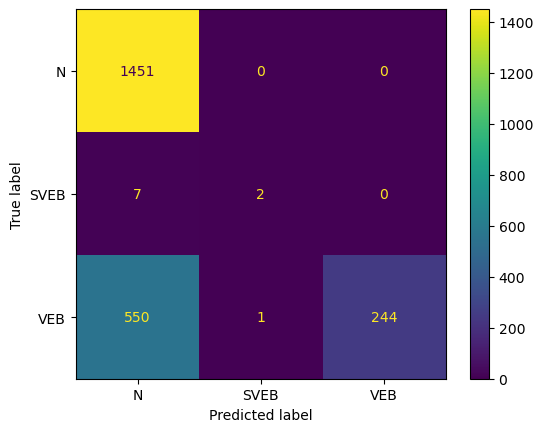

Fold 196:
  Test:  patient=195
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1845
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.77      0.87       138

    accuracy                           0.98      1984
   macro avg       0.66      0.59      0.62      1984
weighted avg       0.98      0.98      0.98      1984

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.982428  NaN    1.000000  0.983367     0.660809      0.983155
recall        1.000000  0.0    0.768116  0.983367     0.589372      0.983367
f1-score      0.991136  NaN    0.868852  0.983367     0.619996      0.982131
support    1845.000000  1.0  138.000000  0.983367  1984.000000   1984.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

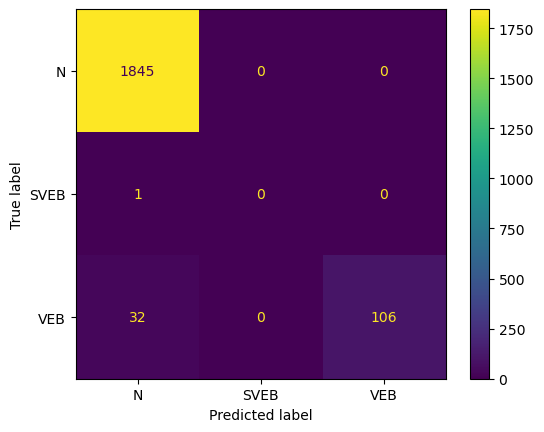

Fold 197:
  Test:  patient=196
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1885
         2.0       1.00      0.83      0.90        23

    accuracy                           1.00      1908
   macro avg       1.00      0.91      0.95      1908
weighted avg       1.00      1.00      1.00      1908

                   0.0        2.0  accuracy    macro avg  weighted avg
precision     0.997882   1.000000  0.997904     0.998941      0.997908
recall        1.000000   0.826087  0.997904     0.913043      0.997904
f1-score      0.998940   0.904762  0.997904     0.951851      0.997805
support    1885.000000  23.000000  0.997904  1908.000000   1908.000000


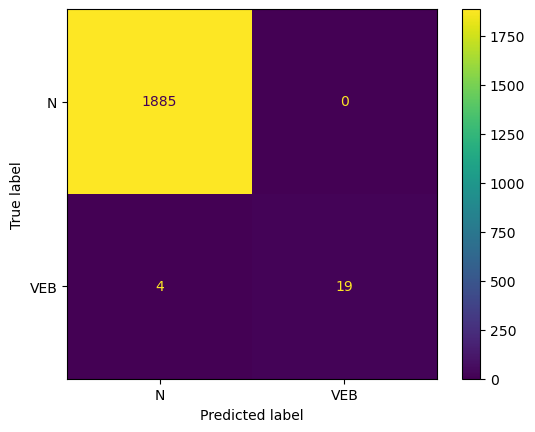

Fold 198:
  Test:  patient=197
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2271
         1.0       0.00      0.00      0.00         5
         2.0       1.00      0.84      0.91       382

    accuracy                           0.98      2658
   macro avg       0.66      0.61      0.63      2658
weighted avg       0.97      0.98      0.97      2658

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.972591  NaN    0.996904  0.975546     0.656498      0.974256
recall        1.000000  0.0    0.842932  0.975546     0.614311      0.975546
f1-score      0.986105  NaN    0.913475  0.975546     0.633193      0.973812
support    2271.000000  5.0  382.000000  0.975546  2658.000000   2658.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

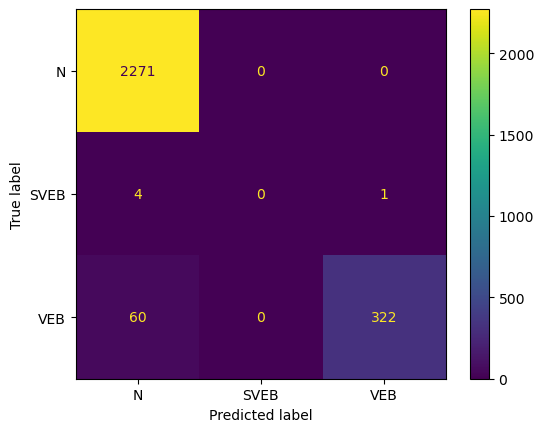

Fold 199:
  Test:  patient=198
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2137
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.97      0.99       200

    accuracy                           1.00      2338
   macro avg       0.67      0.66      0.66      2338
weighted avg       1.00      1.00      1.00      2338

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997200  NaN    1.000000  0.997434     0.665733      0.997013
recall        1.000000  0.0    0.975000  0.997434     0.658333      0.997434
f1-score      0.998598  NaN    0.987342  0.997434     0.661980      0.997208
support    2137.000000  1.0  200.000000  0.997434  2338.000000   2338.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

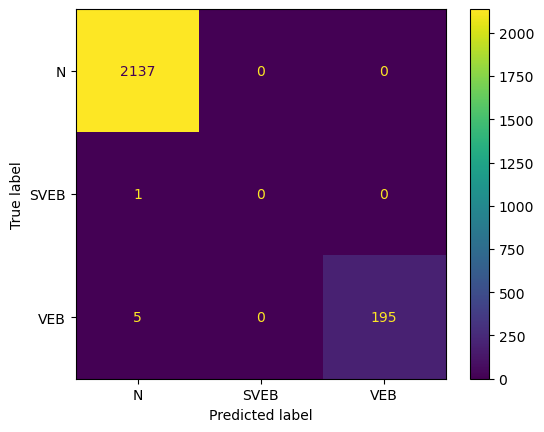

Fold 200:
  Test:  patient=199
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2436
         1.0       0.00      0.00      0.00         5
         2.0       1.00      0.94      0.97       531

    accuracy                           0.99      2972
   macro avg       0.66      0.65      0.65      2972
weighted avg       0.99      0.99      0.99      2972

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.985830  NaN    0.998008  0.987887     0.661279      0.986347
recall        0.999589  0.0    0.943503  0.987887     0.647697      0.987887
f1-score      0.992662  NaN    0.969990  0.987887     0.654217      0.986941
support    2436.000000  5.0  531.000000  0.987887  2972.000000   2972.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

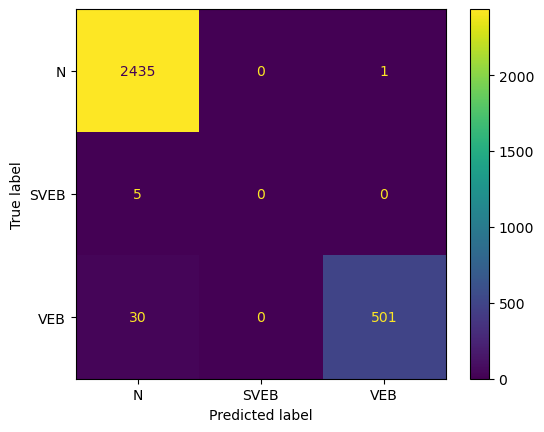

Fold 201:
  Test:  patient=200
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2480
         1.0       0.00      0.00      0.00         2
         2.0       1.00      1.00      1.00       161

    accuracy                           1.00      2643
   macro avg       0.67      0.67      0.67      2643
weighted avg       1.00      1.00      1.00      2643

                   0.0  1.0    2.0  accuracy    macro avg  weighted avg
precision     0.999194  NaN    1.0  0.999243     0.666398      0.998487
recall        1.000000  0.0    1.0  0.999243     0.666667      0.999243
f1-score      0.999597  NaN    1.0  0.999243     0.666532      0.998865
support    2480.000000  2.0  161.0  0.999243  2643.000000   2643.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

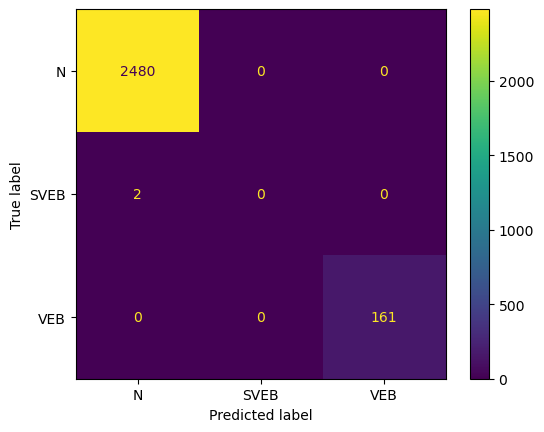

Fold 202:
  Test:  patient=201
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1998
         1.0       0.00      0.00      0.00         1
         2.0       0.99      1.00      1.00       167

    accuracy                           1.00      2166
   macro avg       0.66      0.67      0.67      2166
weighted avg       1.00      1.00      1.00      2166

              0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.0  NaN    0.994048  0.999538     0.664683      0.999079
recall        1.0  0.0    1.000000  0.999538     0.666667      0.999538
f1-score      1.0  NaN    0.997015  0.999538     0.665672      0.999308
support    1998.0  1.0  167.000000  0.999538  2166.000000   2166.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

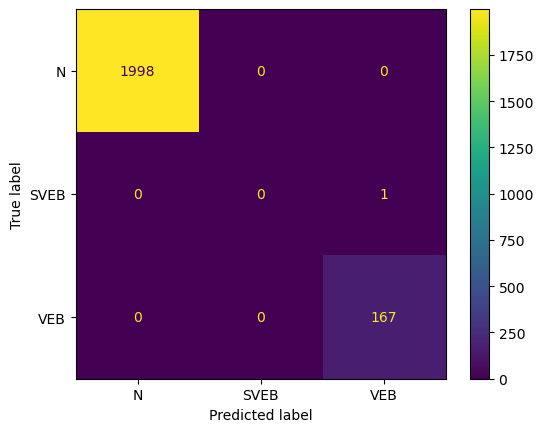

Fold 203:
  Test:  patient=202
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1539
         1.0       0.00      0.00      0.00       126
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      1665
   macro avg       0.33      0.33      0.33      1665
weighted avg       0.92      0.92      0.92      1665

                   0.0    1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999351    NaN  0.0  0.924324     0.333117      0.923724
recall        1.000000    0.0  NaN  0.924324     0.333333      0.924324
f1-score      0.999675    NaN  NaN  0.924324     0.333225      0.924024
support    1539.000000  126.0  0.0  0.924324  1665.000000   1665.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

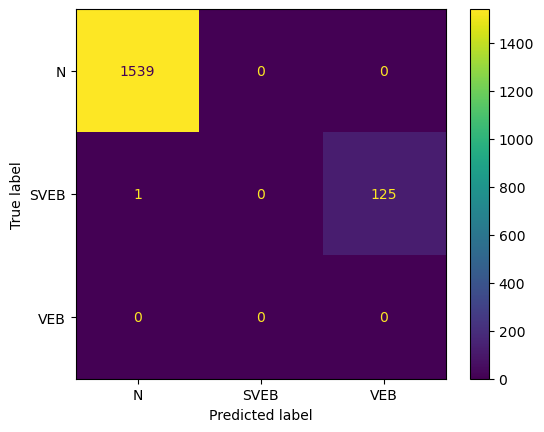

Fold 204:
  Test:  patient=203
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1634
         1.0       0.69      0.83      0.75        35

    accuracy                           0.99      1669
   macro avg       0.84      0.91      0.87      1669
weighted avg       0.99      0.99      0.99      1669

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.996312   0.690476  0.988616     0.843394      0.989899
recall        0.992044   0.828571  0.988616     0.910308      0.988616
f1-score      0.994174   0.753247  0.988616     0.873710      0.989121
support    1634.000000  35.000000  0.988616  1669.000000   1669.000000


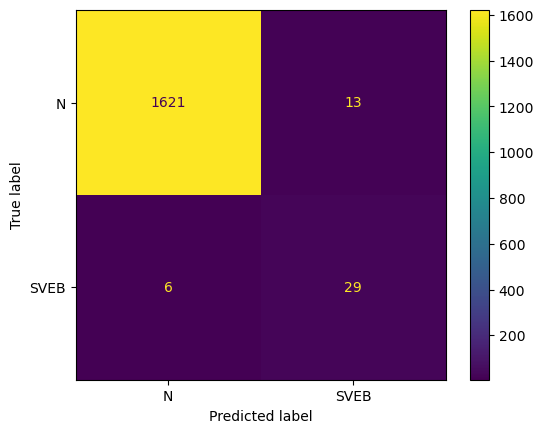

Fold 205:
  Test:  patient=204
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1874
         1.0       0.33      0.12      0.18         8
         2.0       0.99      0.95      0.97       386

    accuracy                           0.99      2268
   macro avg       0.77      0.69      0.71      2268
weighted avg       0.99      0.99      0.99      2268

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.986828  0.333333    0.994550  0.987213     0.771571   
recall        0.999466  0.125000    0.945596  0.987213     0.690021   
f1-score      0.993107  0.181818    0.969456  0.987213     0.714794   
support    1874.000000  8.000000  386.000000  0.987213  2268.000000   

           weighted avg  
precision      0.985837  
recall         0.987213  
f1-score       0.986220  
support     2268.000000  


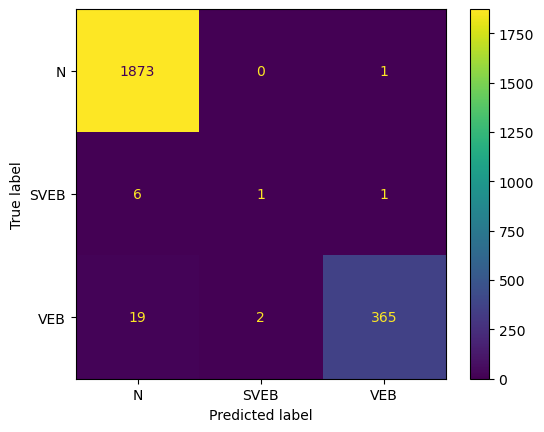

Fold 206:
  Test:  patient=205
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1888
         1.0       0.00      0.00      0.00        32
         2.0       0.60      0.90      0.72        70

    accuracy                           0.97      1990
   macro avg       0.53      0.63      0.57      1990
weighted avg       0.97      0.97      0.97      1990

                   0.0   1.0    2.0  accuracy    macro avg  weighted avg
precision     0.995747   0.0   0.60  0.972864     0.531916      0.965814
recall        0.992055   0.0   0.90  0.972864     0.630685      0.972864
f1-score      0.993898   0.0   0.72  0.972864     0.571299      0.968281
support    1888.000000  32.0  70.00  0.972864  1990.000000   1990.000000


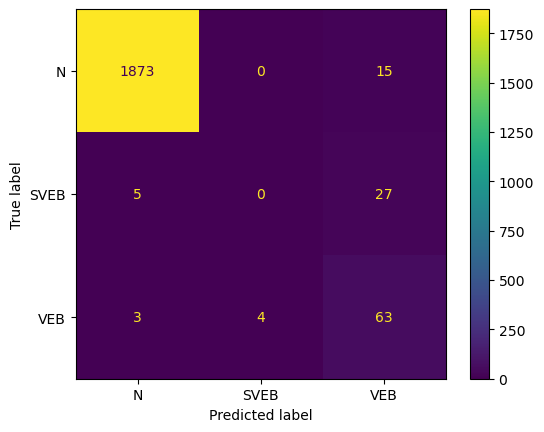

Fold 207:
  Test:  patient=206
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2081
         2.0       1.00      0.72      0.84       274

    accuracy                           0.97      2355
   macro avg       0.98      0.86      0.91      2355
weighted avg       0.97      0.97      0.97      2355

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.964766    1.000000  0.967728     0.982383      0.968865
recall        1.000000    0.722628  0.967728     0.861314      0.967728
f1-score      0.982067    0.838983  0.967728     0.910525      0.965419
support    2081.000000  274.000000  0.967728  2355.000000   2355.000000


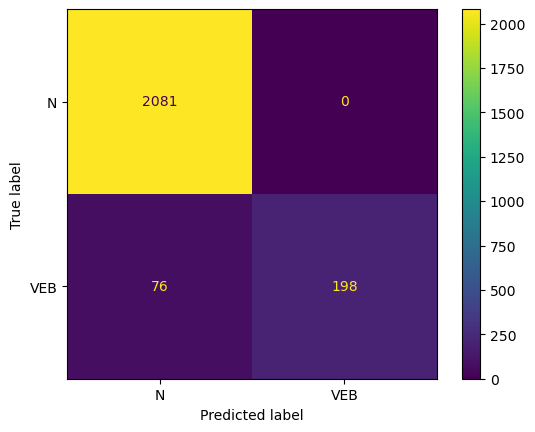

Fold 208:
  Test:  patient=207
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96      1482
         2.0       1.00      0.77      0.87       612

    accuracy                           0.93      2094
   macro avg       0.96      0.89      0.91      2094
weighted avg       0.94      0.93      0.93      2094

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.914250    1.000000   0.93362     0.957125      0.939312
recall        1.000000    0.772876   0.93362     0.886438      0.933620
f1-score      0.955205    0.871889   0.93362     0.913547      0.930855
support    1482.000000  612.000000   0.93362  2094.000000   2094.000000


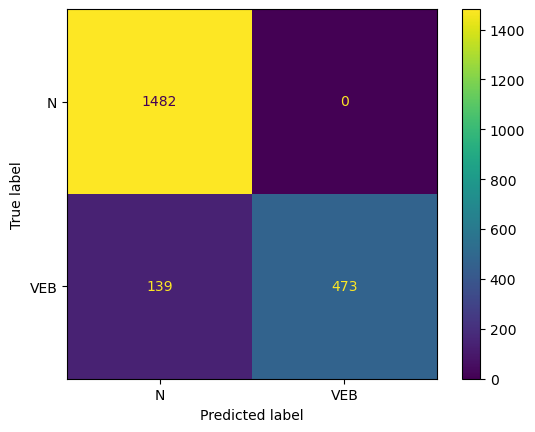

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_normal, acc_normal,confusion_matrix_final,list_fscore = cross_valid(pipe_normal, skf, X, y,groups)
end_time=time.time()

In [8]:
df_normal

0.0         1.0         2.0    macro avg  weighted avg
f1-score      0.966243    0.331620    0.639934     0.623943      0.936519
precision     0.957794    0.448082    0.627298     0.678283      0.956315
recall        0.983758    0.256576    0.709469     0.653228      0.940087
support    3099.572115  108.829412  241.060000  3420.307692   3420.307692